
##### 2024.05.05 :  Bobbie Razo

# Capstone Project Sprint 3: Student Retention Model
## Identifying Students At-Risk of Dropping Out

## Table of Contents

- [1. Introduction](#1.-Introduction) <br>
- [2. Data Dictionary](#2.-Data-dictionary) <br>
- [3. Load Data File & EDA](#3.-Load-Data-File-&-EDA) <br>
    - [4. Distribution Plot](#4.-Distribution-Plot)  <br>
    - [5. Target Variable](#5.-Target-Variable) <br>
    - [6. Target Variable Count Plot Accross Features](#6.-Target-Variable-Count-Plot-Across-Features) <br>
    - [7. Target Variable Imbalance](#7.-Target-Variable-Imbalance) <br>
    - [8. Binning Categorical Variables](#8.-Binning-Categorical-Variables) <br>
        - [9. Qualification Variables](#9.-Qualification-Variables) <br>
        - [10. Marital Status Variable](#10.-Marital-Status-Variable) <br>
        - [11. Nationality Variable](#11.-Nationality-Variable) <br>
        - [12. Occupation Variables](#12.-Occupation-Variables) <br>
        - [13. Application Mode Variable](#13.-Application-Mode-Variable) <br>
        - [14. Course Variable](#14.-Course-Variable) <br>    
    - [15. One-Hot Encoding](#15.-One-Hot-Encoding)<br>
- [Modeling](#Modeling) <br>
    - [16. Logistic Regression](#16.-Logistic-Regression) <br>
    - [17. PCA Dimension Reduction](#17.-PCA-Dimension-Reduction) <br>
    - [18. K-Nearest Neighbors](#18.-K-Nearest-Neighbors) <br>
    - [19. Random Forest](#19.-Random-Forest) <br>
    - [20. Decision Tree](#20.-Decision-Tree) <br>
    - [21. Gradient Boosting Classifier](#21.-Gradient-Boosting-Classifier) <br>
- [22. Summary](#22.-Summary) <br>


[back to Table of Contents](#Table-of-Contents)


## 1. Introduction
#### Predicting students if they are at-risk of dropping out of college

What if we can recognize clues and patterns that precede college student dropouts using data science and machine learning? Given the right set of data of a student population consisting of both college drop outs and graduates, can we leverage predictive analytics to forecast student withdrawal actions? When we study historical data of both kinds of student populations: - those that have discontinued their post-secondary education; - and also, those that have graduated and completed a degree; we hope to identify related factors and challenges for at-risk students.

Addressing proactively the challenges faced by these students is the key! Having early identification allows for a timely intervention and implement support strategies so students can overcome academic challenges and succeed in their education journey.

We will use student data and apply it to different modelling techniques to classify a binary target (Withdrawn or Not Withdrawn) as accurately as possible. 

Since this is a binary classification analysis we will employ the following machine learning algorithms: Logistic Regression, K-Nearest Neighbors, Random Forest, Decision Tree and Gradient Boosting Classifier.   The results of each of these predictive models will hopefully provide actionable insights for stakeholders such as university institutions.


<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 1. Introduction](#1.-Introduction)

[proceed to next section: 3. Load Data File & EDA](#3.-Load-Data-File-&-EDA)

## 2. Data Dictionary

There's been a few versions of this data.  The initial dataset didn't work out but I was lucky to find this new [data](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) to sub in for this project. It's not a big size, about 4k rows.  But with approval from our instructors this is deemed usable due to the nature of the subject which are students. If it were transactions that we are interested in then 4k would be too small.


For a helpful reference, below is the link to the Data Dictionary.  

[Data Dictionary Excel file in GitHub](https://github.com/bobbie318808/Student-Retention-Model/blob/main/data/Data_Dictionary.xlsx) <br>
Or
[Data Dictionary Excel file in Google Drive](https://docs.google.com/spreadsheets/d/12N3mFehIgxFXG2OdbBCk0-DDIAIbsl5N/edit?usp=sharing&ouid=109872083054797591312&rtpof=true&sd=true) <br>

The links above give more detail on each of the values of the categorical columns. But below is a list of the columns in summary.

| Variable Name                                  | Type          | Description                                                             |
|------------------------------------------------|---------------|------------------------------------------------------------------------|
| Admission grade                                | Continuous    | Admission grade (between 0 and 200)                                    |
| Age at enrollment                              | Integer       | Age of student at enrollment                                           |
| Application mode                               | Integer       | Nominal Category Range: 1 - 1st phase - general contingent to 57 - Change of institution/course (International) |
| Application order                              | Integer       | Application order (between 0 - first choice; and 9 last choice)        |
| Course                                         | Integer       | Nominal Category Range: 33 - Biofuel Production Technologies to 9991 - Management (evening attendance) |
| Curricular units 1st sem (approved)            | Integer       | Number of curricular units approved in the 1st semester                |
| Curricular units 1st sem (credited)            | Integer       | Number of curricular units credited in the 1st semester                |
| Curricular units 1st sem (enrolled)            | Integer       | Number of curricular units enrolled in the 1st semester                |
| Curricular units 1st sem (evaluations)         | Integer       | Number of evaluations to curricular units in the 1st semester          |
| Curricular units 1st sem (grade)               | Integer       | Grade average in the 1st semester (between 0 and 20)                   |
| Curricular units 1st sem (without evaluations) | Integer       | Number of curricular units without evaluations in the 1st semester     |
| Curricular units 2nd sem (approved)            | Integer       | Number of curricular units approved in the 2nd semester                |
| Curricular units 2nd sem (credited)            | Integer       | Number of curricular units credited in the 2nd semester                |
| Curricular units 2nd sem (enrolled)            | Integer       | Number of curricular units enrolled in the 2nd semester                |
| Curricular units 2nd sem (evaluations)         | Integer       | Number of evaluations to curricular units in the 2nd semester          |
| Curricular units 2nd sem (grade)               | Integer       | Grade average in the 2nd semester (between 0 and 20)                   |
| Curricular units 2nd sem (without evaluations) | Integer       | Number of curricular units without evaluations in the 2nd semester     |
| Daytime/evening attendance                     | Integer       | 1 – daytime; 0 - evening                                               |
| Debtor                                         | Integer       | 1 – yes; 0 – no                                                         |
| Displaced                                      | Integer       | 1 – yes; 0 – no                                                         |
| Educational special needs                      | Integer       | 1 – yes; 0 – no                                                         |
| Father's occupation                            | Integer       | Occupation.  Nominal Category Range: 0 - Student to 195 - Street vendors (except food) and street service providers |
| Father's qualification                         | Integer       | Education Level.  Nominal Category Range: 1 - Secondary Education - 12th Year of Schooling or Equivalent to 44 - Higher Education - Doctorate (3rd cycle) |
| GDP                                            | Continuous    | GDP                                                                    |
| Gender                                         | Integer       | 1 – male; 0 – female                                                    |
| Inflation rate                                 | Continuous    | Inflation rate (%)                                                     |
| International                                  | Integer       | 1 – yes; 0 – no                                                         |
| Marital Status                                 | Integer       | Marital Status. Nominal Category Range: 1- single to 6 - legally separated |
| Mother's occupation                            | Integer       | Occupation.  Nominal Category Range: 0 - Student to 195 - Street vendors (except food) and street service providers |
| Mother's qualification                         | Integer       | Education Level.  Nominal Category Range: 1 - Secondary Education - 12th Year of Schooling or Equivalent to 44 - Higher Education - Doctorate (3rd cycle) |
| Nationality                                    | Integer       | Nationality. Nominal Category Range: 1 - Portuguese to 109 - Colombian |
| Previous qualification                         | Integer       | Education Level.  Nominal Category Range: 1 - Secondary Education - 12th Year of Schooling or Equivalent to 44 - Higher Education - Doctorate (3rd cycle) |
| Previous qualification (grade)                 | Continuous    | Grade of previous qualification (between 0 and 200)                     |
| Scholarship holder                             | Integer       | 1 – yes; 0 – no                                                         |
| Target                                         | Categorical   | Target: formulated as a three category classification task (dropout, enrolled|
| Tuition fees up to date|	Integer|	1 – yes 0 – no	|
|Unemployment rate|	Continuous|	Unemployment rate (%)|



<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 2. Data Dictionary](#2.-Data-Dictionary)

[proceed to next section: 4. Distribution Plot](#4.-Distribution-Plot)

## 3. Load Data File & EDA
Below we'll expand the border width of the code and markdown cell view and hide warning messages to minimize the noise


In [1]:
# Brainstation: Capstone Sprint 3          Bobbie Razo 2024.05.05

# expand border width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# hide warning messages
import warnings
warnings.filterwarnings('ignore')

Import all the needed libraries for data manipulation and data visualization.  Also adjust pandas options on how it displaysin output.

In [2]:
# Needed libraries
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# Set the style to ggplot
plt.style.use("seaborn-darkgrid")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 150)  # Adjust the width as needed

Set location of the data file and read it into a dataframe

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# dataFileNamePath = '/content/drive/MyDrive/Colab Notebooks/data.csv' 

# if using a localized IDE
dataFileNamePath = 'Data/data.csv'

# Import the data into a master variable to hold the raw data in case it's needed again later with having to load from the file
masterRawData = pd.read_csv(dataFileNamePath)

Confirm datafile is read into a dataframe using .head()

In [4]:
#confirm data file is loaded: use shape/head
print("The dataframe shape is: ", masterRawData.shape, ": ", masterRawData.shape[0], "- Rows, ", masterRawData.shape[1], "- Columns\n")
masterRawData.head()   

The dataframe shape is:  (4424, 37) :  4424 - Rows,  37 - Columns



,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


There are 37 features and 4424 instances.

Create a master copy of dataframe in case it's needed to reset data.

In [5]:
data = masterRawData.copy()

Adjust the width of output display and set to show all columns

In [6]:
print("Head\n", data.head())  # prefer to use print here with display width adjusted to force wrapping text to view all columns at once and avoid having to scroll left to right
print("\nTail\n", data.tail())

Head
    Marital status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  Previous qualification (grade)  \
0               1                17                  5     171                           1                       1                           122.0   
1               1                15                  1    9254                           1                       1                           160.0   
2               1                 1                  5    9070                           1                       1                           122.0   
3               1                17                  2    9773                           1                       1                           122.0   
4               2                39                  1    8014                           0                       1                           100.0   

   Nacionality  Mother's qualification  Father's qualification  Mother's occupation  Father's

- All of the columns seem to be numerical except for the Target column which is a 3 class categorical text column that we will label encoded later.

- There are a number of label encoded columns that need to be one-hot encoded, such as Marital Status, Application mode, Course, *qualification, Mother/Father occupation, Nacionality (which we'll translate to Nationality). 

- There are columns that have the apostrophe punctuation mark.  These might caused issues when referencing them in code so this will need to be removed.

Let's start by renaming Nacionality to Nationality

In [7]:
# rename Nacionality column name to Nationality
data.rename(columns={'Nacionality': 'Nationality'}, inplace=True)
print("Sample\n", data['Nationality'].sample()) # check and view if new column name exists

Sample
 1413    1
Name: Nationality, dtype: int64


Look at the data types of columns and see if there are any nulls

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

The only text column is just the Target variable according to .info

All the columns have 4424 non-nulls which match the row count from .shape earlier.  

Run the .isna also to make sure.        

In [9]:
print("Total Null Values: ", data.isna().sum().sum())

Total Null Values:  0


No nulls, looks good.

Check for duplicates.

In [10]:
print(f"Duplicated rows: {data.duplicated().sum()}")

Duplicated rows: 0


No dups, great.

Now remove the apostrophes from the column names that have them.  Ex. Mother's, Father's, etc.  This might have issues when referencing the column in code.

In [11]:
for column_name in data.columns:
    # Check if the column name contains an apostrophe
    if "'" in column_name:
        # Remove the apostrophe and update the column name
        new_column_name = column_name.replace("'", "")
        data.rename(columns={column_name: new_column_name}, inplace=True)

Check one row of data to confirm the removal of the apostrophe.

In [12]:
# check if the apostrophes were removed
print(data.sample())

     Marital status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  \
513               1                39                  1    9991                           0                       1   

     Previous qualification (grade)  Nationality  Mothers qualification  Fathers qualification  Mothers occupation  Fathers occupation  \
513                           100.0            1                     37                     19                   9                   2   

     Admission grade  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
513            121.9          0                          0       0                        0       0                   0                 40   

     International  Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  \
513              0                                    0      

Take a look at the number of unique values of each feature and sort in ascending order.

In [13]:
# Number of unique values per column in ascending order
data.nunique().sort_values()

Scholarship holder                                  2
International                                       2
Gender                                              2
Tuition fees up to date                             2
Daytime/evening attendance                          2
Debtor                                              2
Educational special needs                           2
Displaced                                           2
Target                                              3
Marital status                                      6
Application order                                   8
Inflation rate                                      9
Unemployment rate                                  10
Curricular units 2nd sem (without evaluations)     10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Previous qualification                             17
Course                                             17
Application mode            

Look at some of the data from the Curricular* columns to see if they are purely numeric or label encoded.

In [14]:
data.filter(like='Curricular').sample(10)

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
3461,1,8,12,5,13.126000,1,1,8,12,5,13.126000,1
548,0,8,11,6,13.496667,1,0,8,11,6,13.496667,1
3983,0,6,7,6,12.833333,0,0,6,6,6,13.166667,0
2553,0,5,8,2,10.500000,0,0,5,5,0,0.000000,0
1320,0,6,6,6,12.166667,0,0,6,6,6,12.333333,0
1426,2,6,9,6,13.333333,0,1,6,9,4,11.500000,0
427,0,5,8,3,11.333333,0,0,5,12,2,10.666667,0
415,0,5,5,5,14.000000,0,0,5,6,5,15.400000,0
1505,0,6,12,3,11.000000,0,0,6,12,3,12.000000,0
198,0,7,9,7,12.571429,0,0,7,8,7,14.428571,0


These Curricular* columns don't appear to be categorical or label encoded.

Look at some of the stats using the .describe function.

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


From the .describe function there might be outliers with the following columns accorrding to how much jump the max values are compared to the 75 percentile: 

 - Marital status - this is a nominal categorical variable so the percentile is not an outlier.
 - Application order - this is an ordinal categorical variable which has meaning in the percentile outlier
 - Age at enrollment - this makes sense since mostly the younger age group are the majority of students with only a small number in the higher age group
 - Curricular units 1st sem (credited)
 - Curricular units 1st sem (approved)
 - Curricular units 1st sem (without evaluations)
 - Curricular units 2nd sem (credited)
 - Curricular units 2nd sem (without evaluations)


<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 3. Load Data File & EDA](#3.-Load-Data-File-&-EDA)

[proceed to next section: 5. Target Variable](#5.-Target-Variable)

## 4. Distribution Plot
Let's plot the numeric features onto histograms to further understand the distributions.

Grab the numeric columns to plot and display the shape to see the count. 

In [16]:
# Plot out the numeric columns to view the distribution
numericColumns = data.loc[:, data.select_dtypes(include=['number']).columns]         # get the numeric columns
numericColumns.shape

(4424, 36)

There are 36 numercial columns to plot.  Let's size the grid accordingly (12 x 3) and plot each column showing the mean and median line.




<small>[jump to the end of this Distribution Plot](#End-Of-Distribution-Plot)</small>

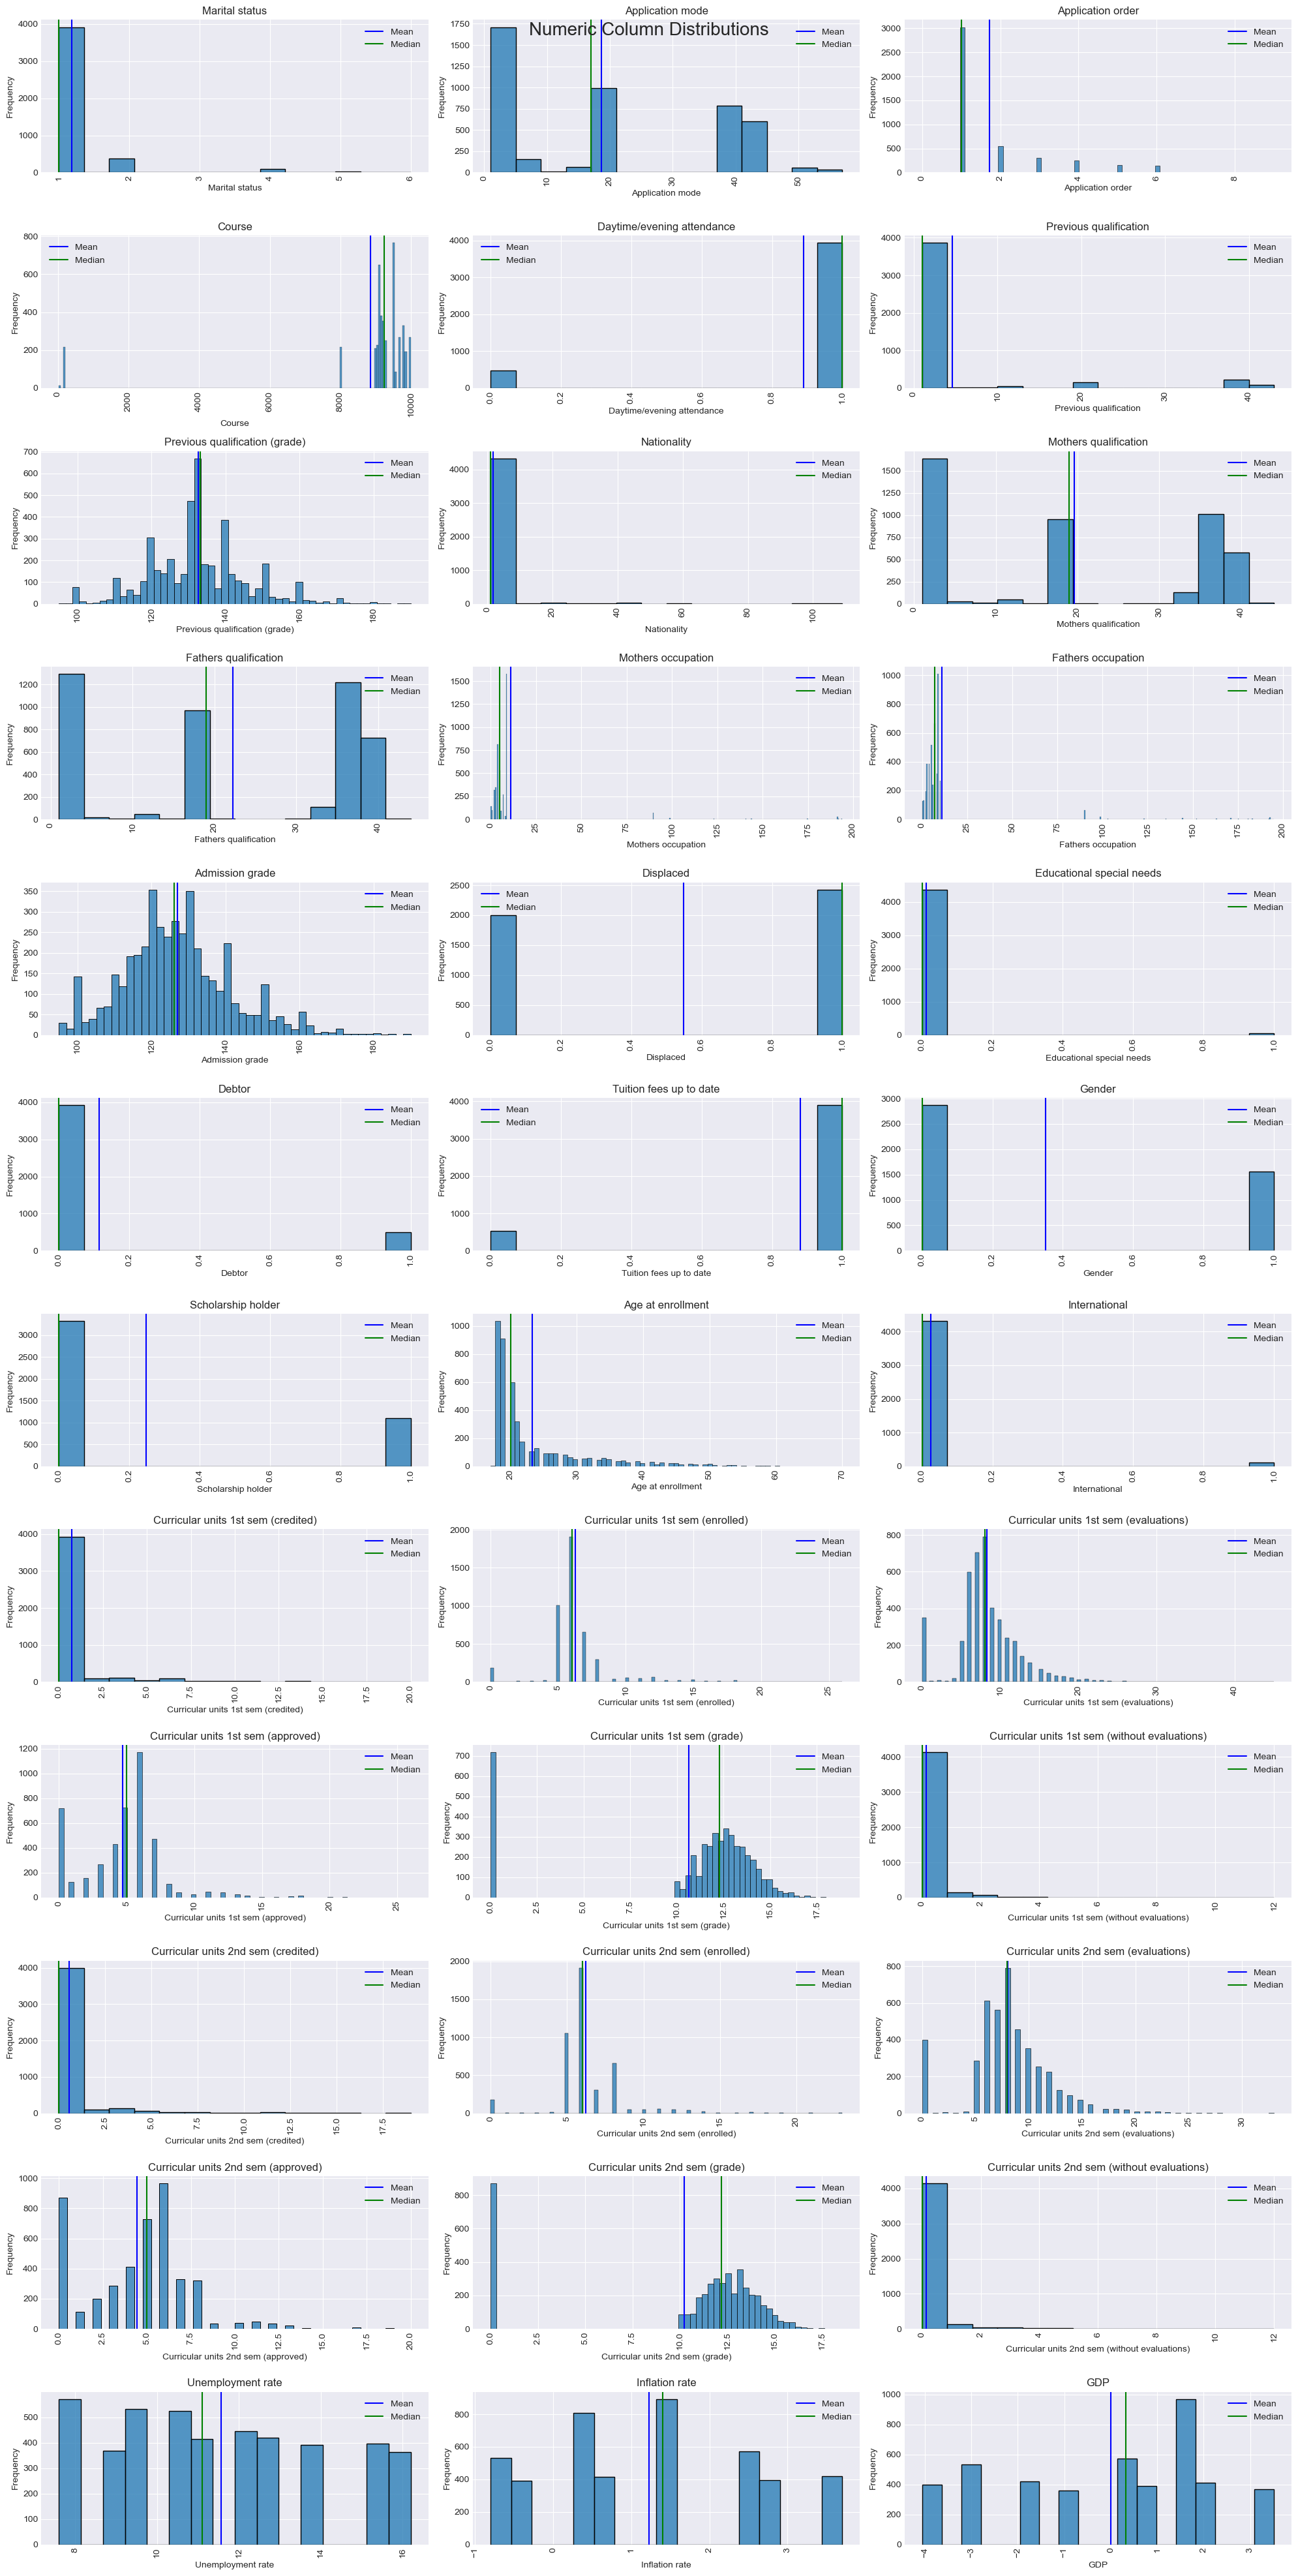

In [17]:
# Plot layout of numeric columns
plt.subplots(12, 3, figsize=(20, 40))  # using a 4 x 7 grid of graphs since we are working with 28 columns; each graph will be 20x20 in size
plt.suptitle('Numeric Column Distributions', size=20)

for i, column in enumerate(numericColumns.columns, 1):
    plt.subplot(12, 3, i)
    sns.histplot(numericColumns[column])
    #sns.countplot(data[column])
    
    plt.xticks(rotation=90) 
    
    # Include titles and labels
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Include median and mean lines
    plt.axvline(data[column].mean(), c='blue', label='Mean')
    plt.axvline(data[column].median(), c='green', label='Median')
    plt.legend()
    
plt.tight_layout()
plt.show()

###### End Of Distribution Plot
<small>[back up to the start of this Distribution Plot](#4.-Distribution-Plot)</small>

This helps in giving a picture of the distribution of all the numeric columns: 
- Marital Status is skewed towards Single.
- Nationality is skewed towards Portuguese. 

Somewhat normally distributed features are:
- Previous qualification (grade)
- Admission grade
- Circular units 1st & 2nd sem (grade) (but with predominance on zero's)

Binary features: 
- Daytime/evening attendance (majority in Daytime)
- Displaced  (close to balanced but Displaced is dominant)
- Educational special needs (mostly no)
- Debtor (mostly no)
- Tuition fees up to date (majority are)
- Gender (female are close to twice as much as male)
- Scholarship holder (majority no)
- International (very small fraction are)

Unemployment rate, Inflation rate, GDP are probably specific to the student's country. According to the .nunique results earlier there seems to be 10 different countries

Age of enrollment seems to have a natural progression where the majority age of students are 18-20 and it tapers down as the age increases.

There are a few numerical variables that are categorical and have high cardinality which needs to be addressed to minimize the features. 

- Application mode
- Application order
- Course
- Fathers occupation
- Mothers occupation
- Nationality
- Marital status
- Previous qualification
- Fathers qualification
- Mothers qualification

I will attempt to use binning or some other encoding where possible on these later.


Going back to see if *Unemployment rate*, *Infation rate*, and *GDP* are all specific to the country of where the student resides, let's look at the combination of each.


In [18]:
unique_Country_Combinations = data[['Unemployment rate', 'Inflation rate', 'GDP']].drop_duplicates().sort_index()
print('Total Unique Rows:', unique_Country_Combinations.shape[0])
print(unique_Country_Combinations)

Total Unique Rows: 10
    Unemployment rate  Inflation rate   GDP
0                10.8             1.4  1.74
1                13.9            -0.3  0.79
3                 9.4            -0.8 -3.12
5                16.2             0.3 -0.92
6                15.5             2.8 -4.06
9                 8.9             1.4  3.51
11               12.7             3.7 -1.70
20               11.1             0.6  2.02
25                7.6             2.6  0.32
33               12.4             0.5  1.79


So the 3 columns *Unemployment rate*, *Infation rate*, and *GDP* are all related to the same country.  With a total of 10 of them.

<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 4. Distribution Plot](#4.-Distribution-Plot)

[proceed to next section: 6. Target Variable Count Plot Accross Features](#6.-Target-Variable-Count-Plot-Across-Features)

## 5. Target Variable

What's the distribution of our target variable like. Since the target variable is the only string (or object type), we'll use .describe and only include object type.

In [19]:
data.describe(include='object')

,Target
count,4424
unique,3
top,Graduate
freq,2209


Our target has no nulls and has 3 unique values.  The most frequent is *Graduate* and that has 2209 instances in the data.  Now let's plot the distribution of the 3 values.

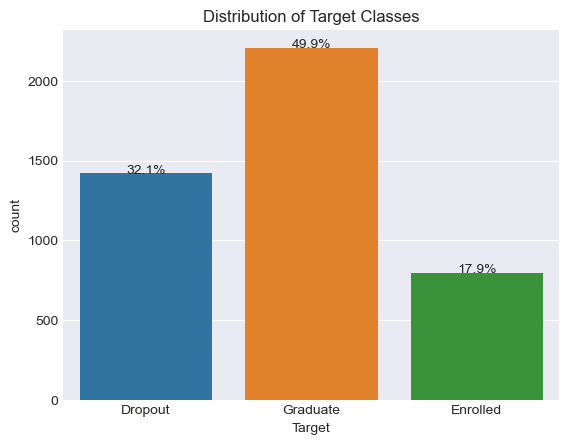

In [20]:
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Classes')

# show percentage of each Target value on plot
total = len(data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 0.1,
             '{:.1f}%'.format((height / total) * 100),
             ha="center")

plt.show()

As described on the [website](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) source of this data, there are 3 classes on the categorical Target variable.  The Graduate value is the most at close to 50% of the data.  Dropout at 32% is 2nd and then Enrolled is place with 17%.

Essentially for modelling this needs to be a numerical column, label encoded. Let's do that now and use the ID maps below:

- Dropout - 1 - 32.1%
- Graduate - 2 - 49.9%
- Enrolled - 3 - 17.9%

We'll update Dropout to 1, Graduate to 2 and Enrolled to 3.

In [21]:
from sklearn.preprocessing import LabelEncoder

class_mapping = {'Graduate': 2, 'Enrolled': 3, 'Dropout': 1}
data['TargetEncoded'] = data['Target'].map(class_mapping)

print('Sample rows of Target variable:', data['TargetEncoded'].sample(10))

Sample rows of Target variable: 2086    1
803     2
3163    2
2585    2
3439    1
4123    2
1962    2
1087    2
3751    2
2367    2
Name: TargetEncoded, dtype: int64


The sample of the Target variable above confirms that it has been remapped to numeric values. 

Plot the new target column just to check.

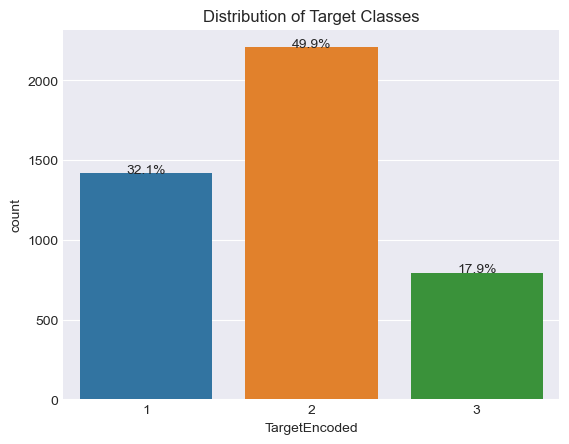

In [22]:
sns.countplot(x='TargetEncoded', data=data)
plt.title('Distribution of Target Classes')

# show percentage of each Target value on plot
total = len(data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 0.1,
             '{:.1f}%'.format((height / total) * 100),
             ha="center")

plt.show()

Looks good and identical to the original Target columns.  So we will now drop the original column.

In [23]:
data.drop(columns=['Target'], inplace=True)

Confirm the removal of the Target column and that TargetEncoded is there.

In [24]:
# Check that the original Target columns is removed
print(data.sample())

      Marital status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  \
3217               1                 1                  5    9119                           1                       1   

      Previous qualification (grade)  Nationality  Mothers qualification  Fathers qualification  Mothers occupation  Fathers occupation  \
3217                           135.0            1                     37                     37                  90                  90   

      Admission grade  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
3217            122.1          1                          0       0                        1       1                   0                 20   

      International  Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  \
3217              0                                   

I will also take the next step and convert this 3 class Target variable into binary since Graduate and Enrolled can be seen as the same in terms of a student dropping out or not.  Both are considered *Not Dropped*.   So we will combine Graduate (2) and Enrolled (3) into one bucket.  To make it simple I will update both Graduate (2) and Enrolled (3) to 0.  This will convert the TargetEncoded variable to binary where having the 0 value represents *Not Dropped* while 1 means *Dropped*.

In [25]:
# Update values 2, 3 to 0
data.loc[data['TargetEncoded'].isin([2, 3]), 'TargetEncoded'] = 0
# check and print count of all unique values
print('\nCount Breakdown of Target:\n', data['TargetEncoded'].value_counts())
print('\nPercentage Breakdown of Target:\n', data['TargetEncoded'].value_counts(normalize=True) * 100)
data.head(10)


Count Breakdown of Target:
 TargetEncoded
0    3003
1    1421
Name: count, dtype: int64

Percentage Breakdown of Target:
 TargetEncoded
0    67.879747
1    32.120253
Name: proportion, dtype: float64


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,1
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,0
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,1


The above data now shows 2 values (0 and 1) for the Target variable making this a binary classification.

Let's plot a graph for better visualtization.

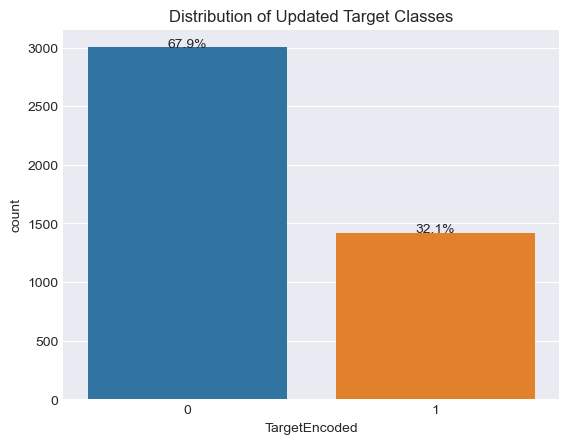

In [26]:
from matplotlib.lines import Line2D

sns.countplot(x='TargetEncoded', data=data)
plt.title('Distribution of Updated Target Classes')

# show percentage of each Target value on plot
total = len(data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 0.1,
             '{:.1f}%'.format((height / total) * 100),
             ha="center")
    # Add custom legend labels

plt.show()

The target variable has been binarized.

Target variable Count and Percentage breakdown: 
| TargetEncoded | Count | Percentage |
|---------------|-------|------------|
|       0 - Not Dropped     |  3003 |   67.88%   |
|       1 - Dropped      |  1421 |   32.12%   |

The ratio between Not Dropped and Dropped is about 70 : 30 indicating an imbalance.  Imbalanced datasets can pose challenges for machine learning modeling, since some algorithms assume balanced class distribution or have difficulty learning from minority class samples. This can be remedied by certain techniques such as resampling.


<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 5. Target Variable](#5.-Target-Variable)

[proceed to next section: 7. Target Variable Imbalance](#7.-Target-Variable-Imbalance)

## 6. Target-Variable-Count-Plot-Across-Features
Now let's look at the Count plot of the TargetEncoded variable across all the other features. The graph on the right are the drop out targets.  It will not be sharing the y axis values to better see how the variable differs with each target value whether it's the dropped out population or not.  Granted some of the variables will not make sense with this plot such as those showing grades or credits.

<small>[jump to the end of this plot](#End-of-Target-Plot-Against-Each-Feature)</small>

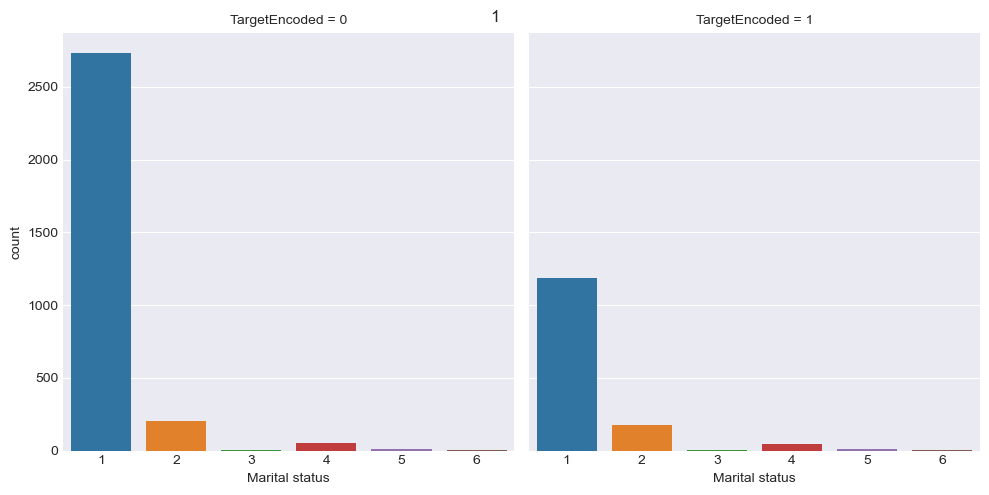

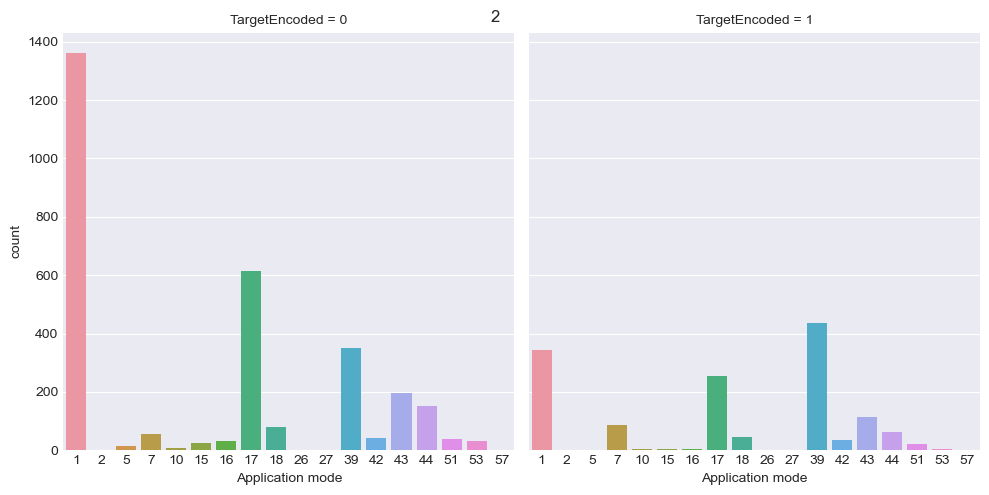

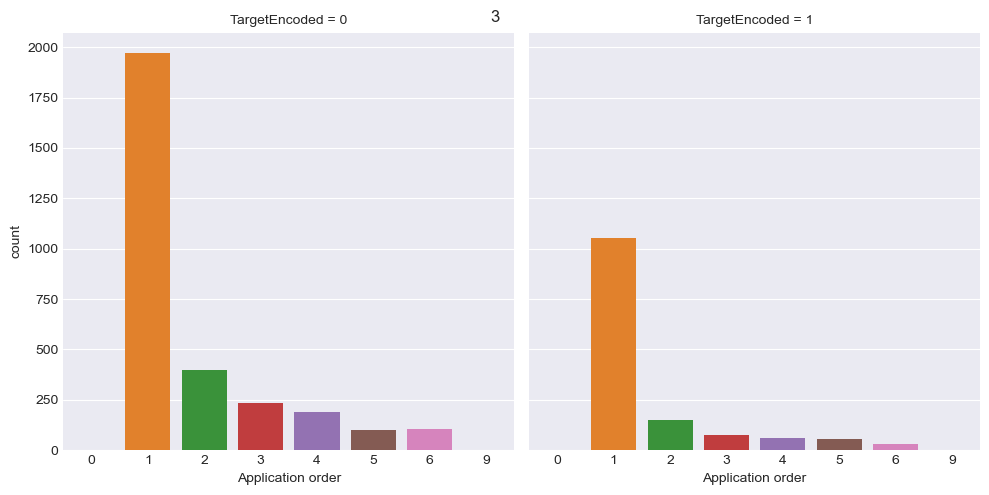

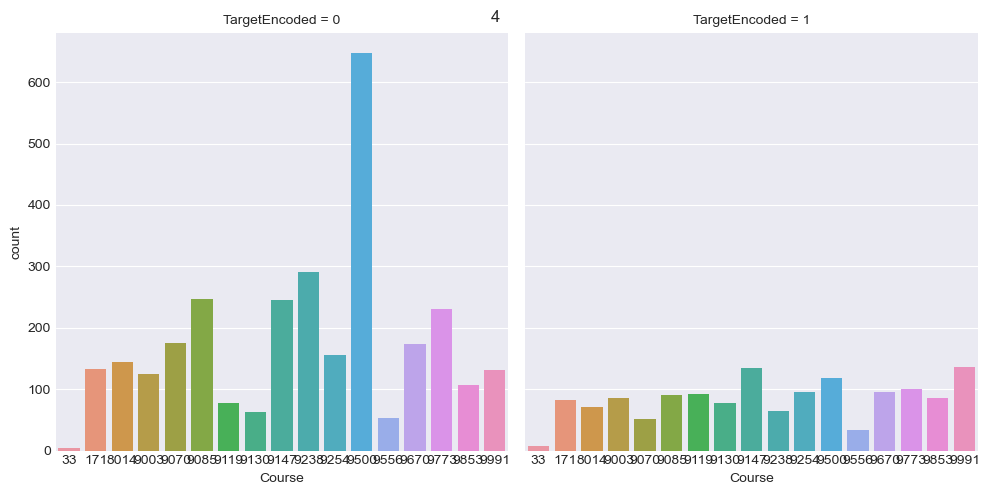

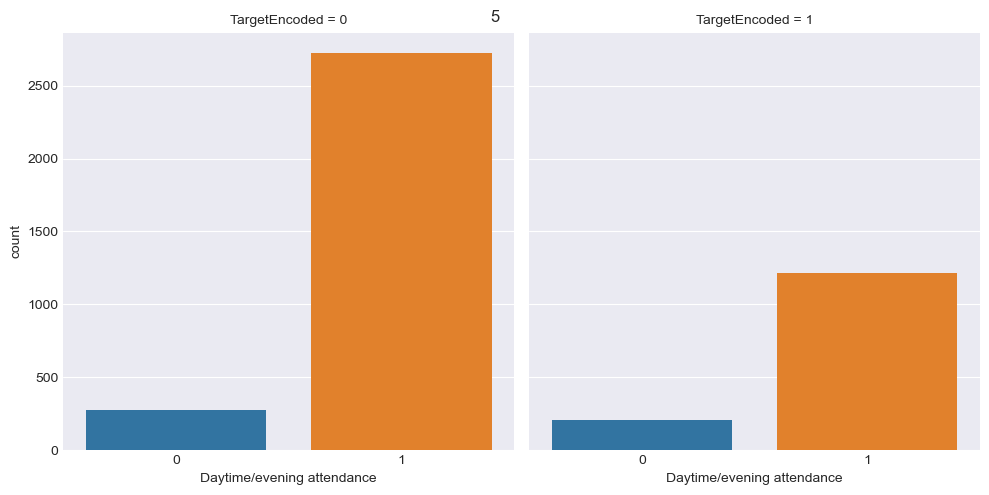

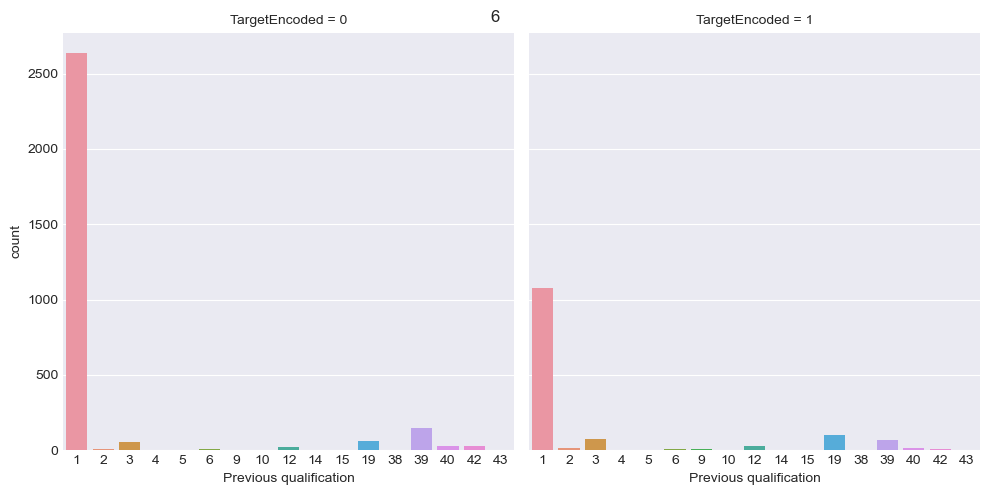

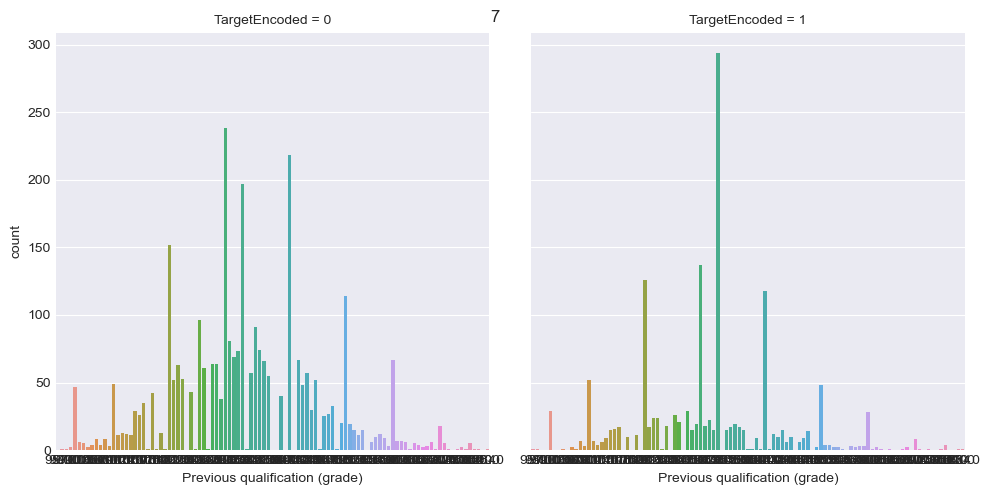

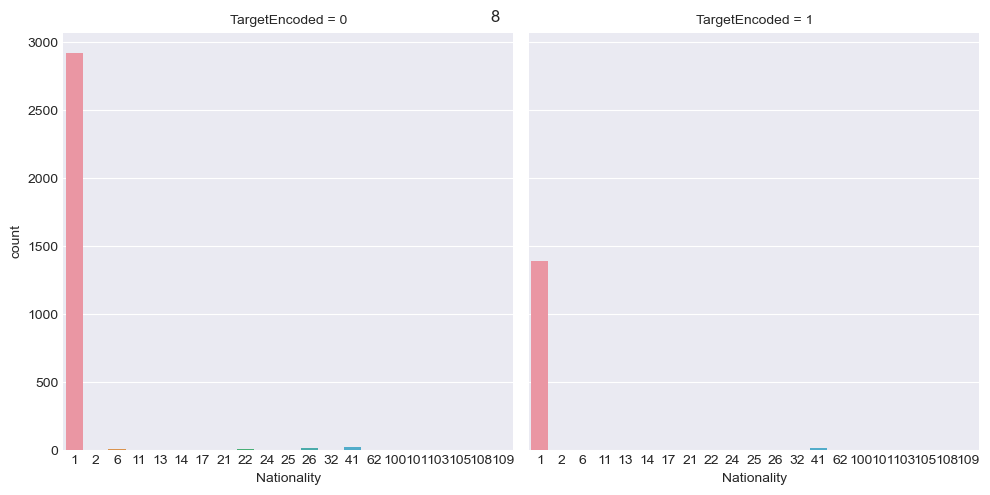

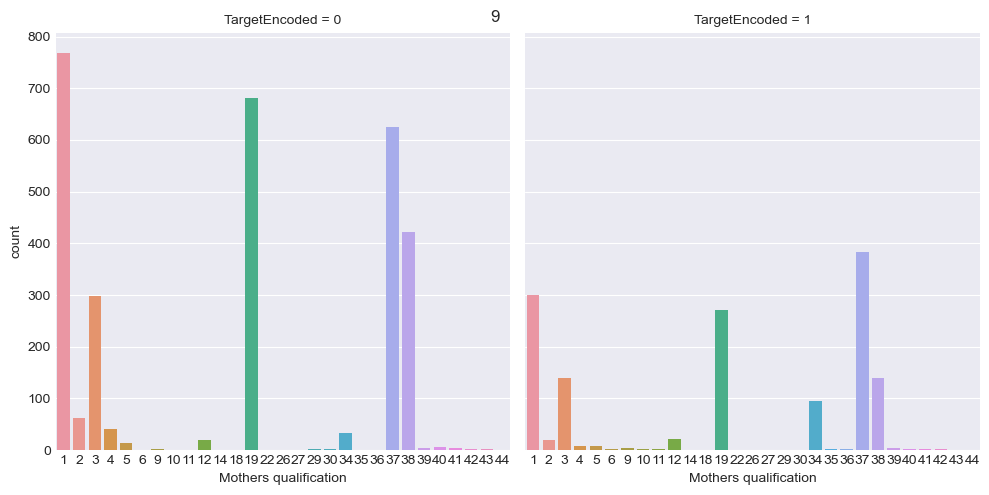

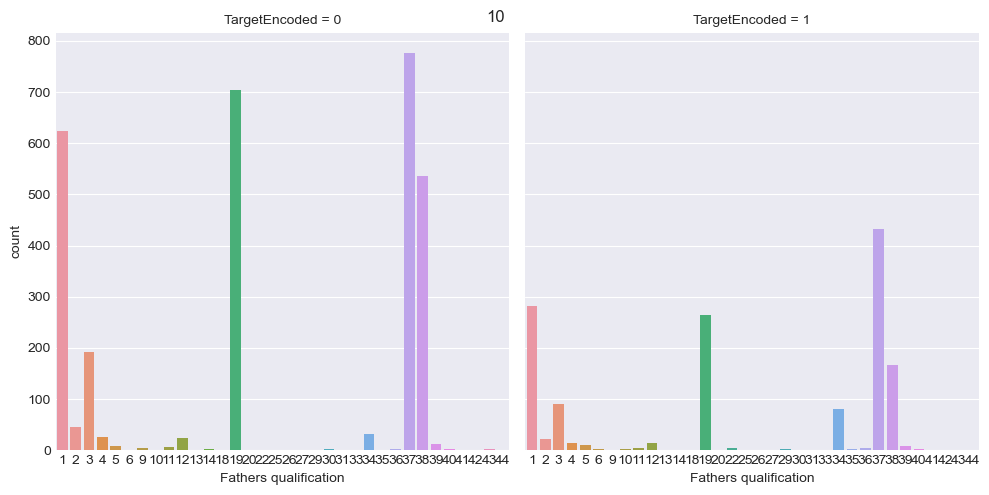

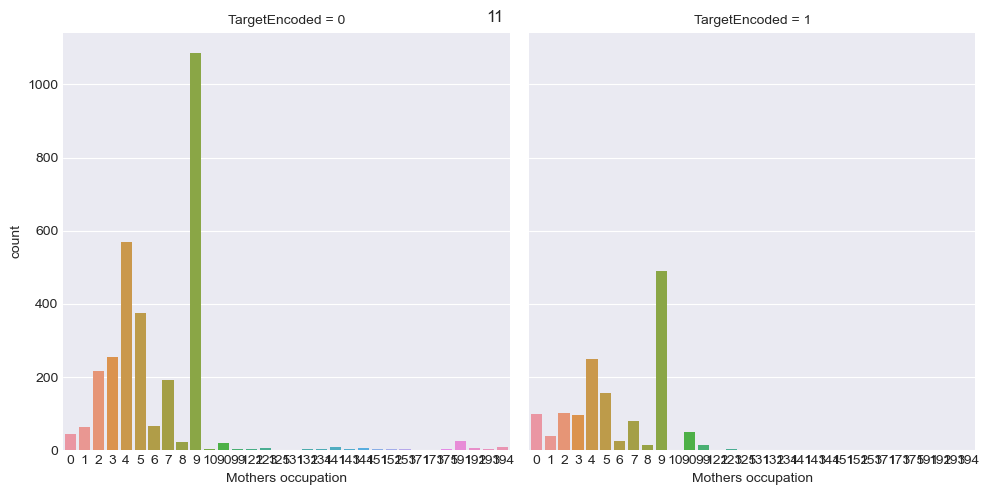

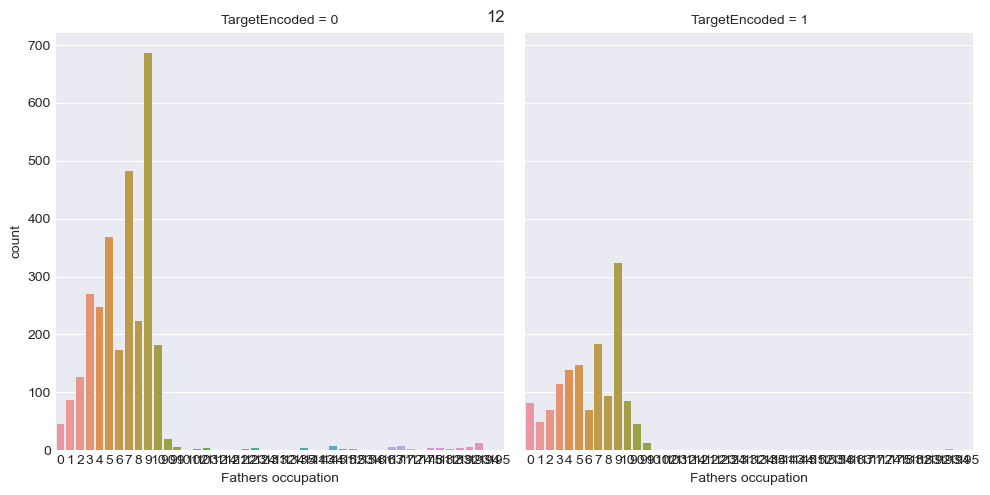

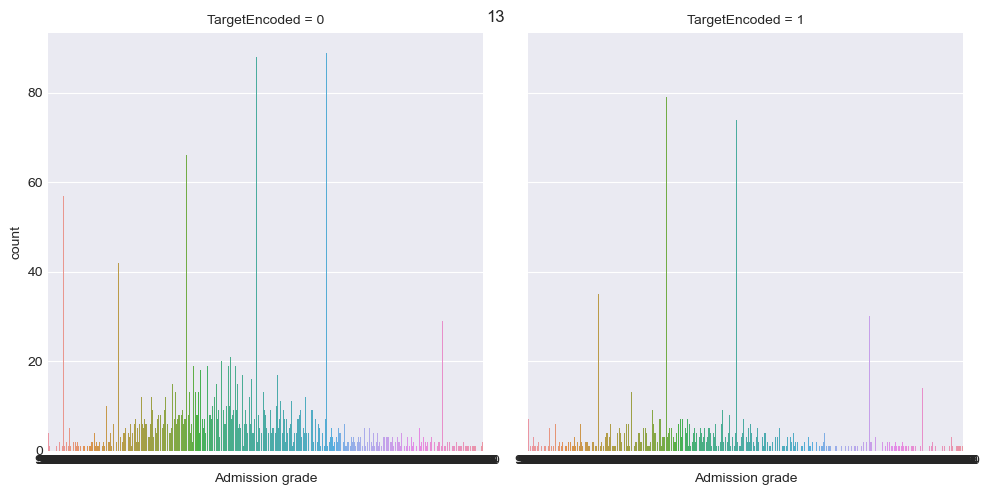

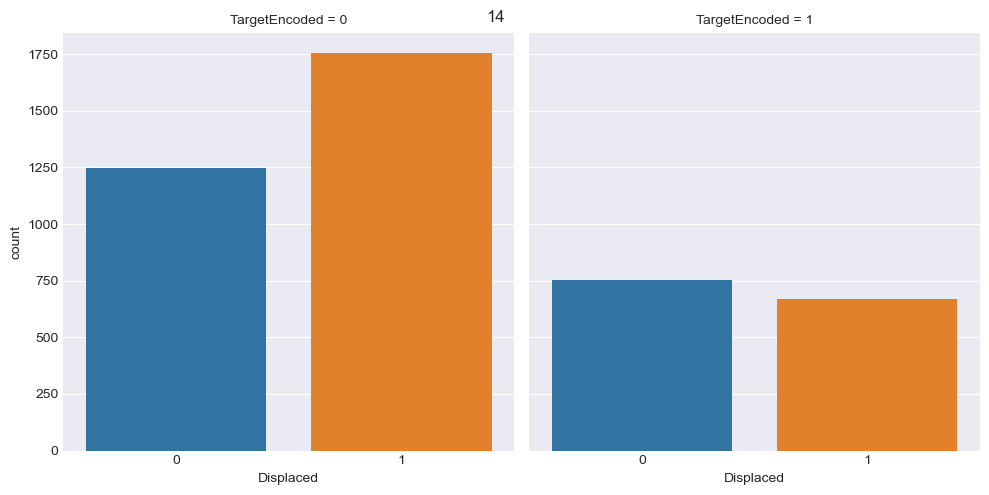

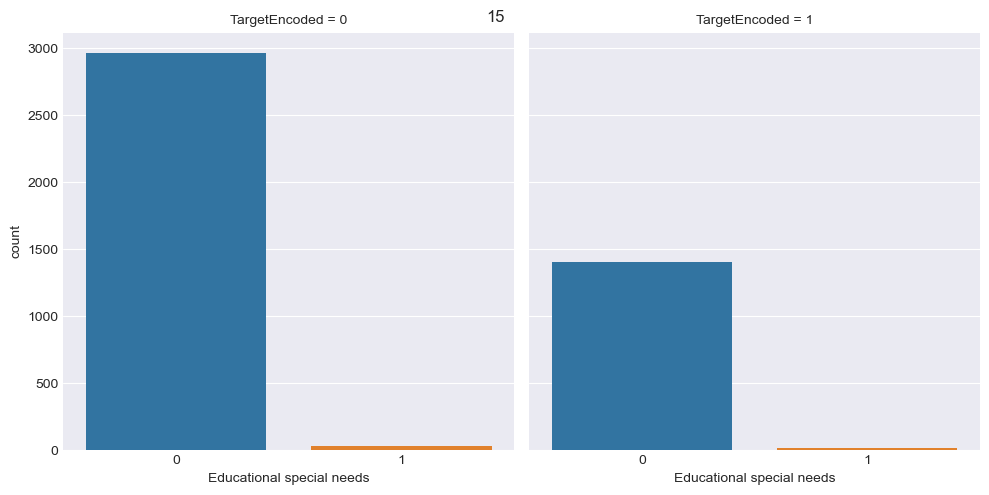

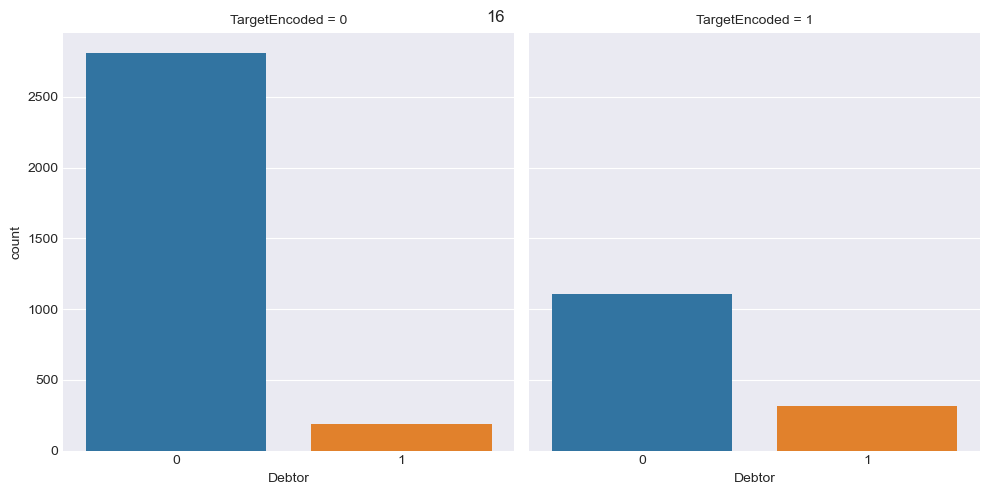

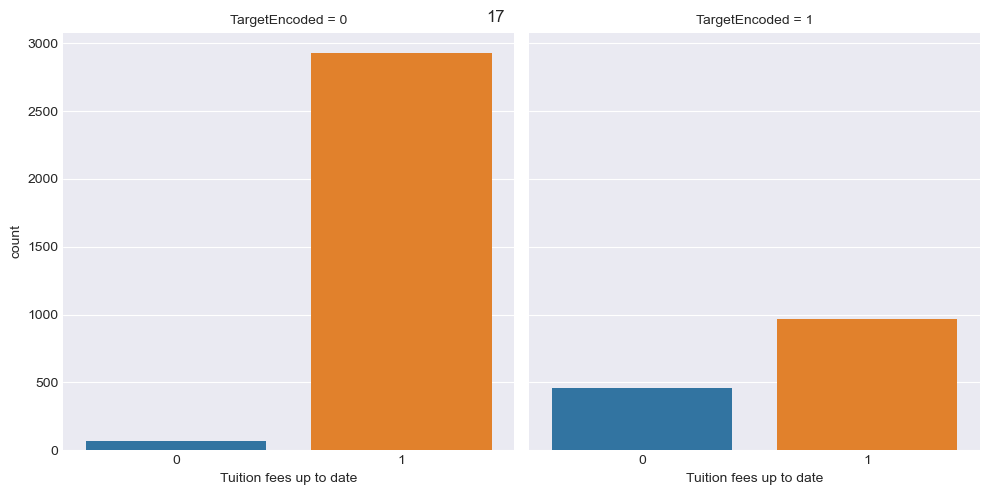

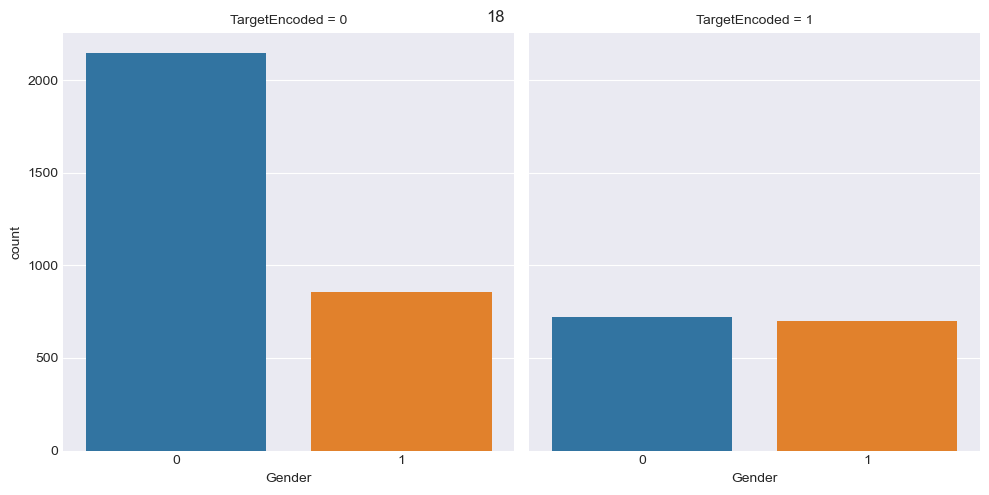

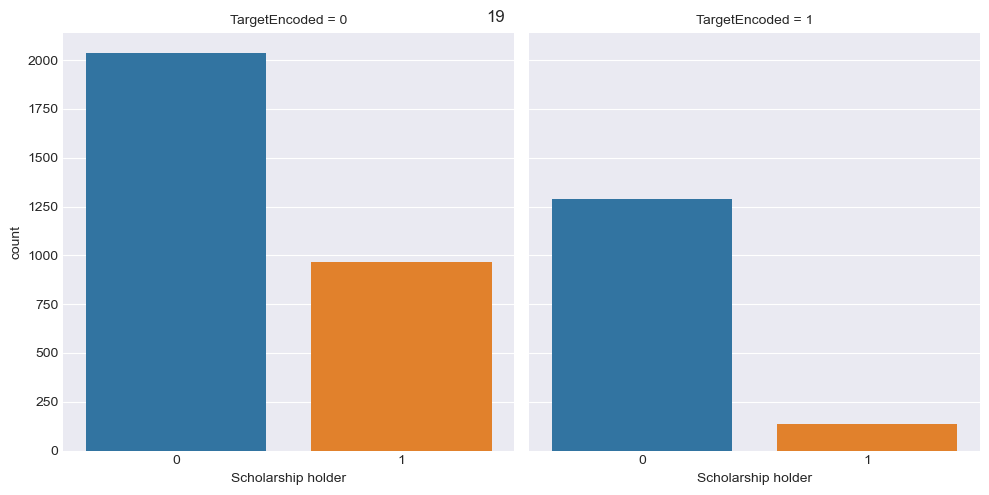

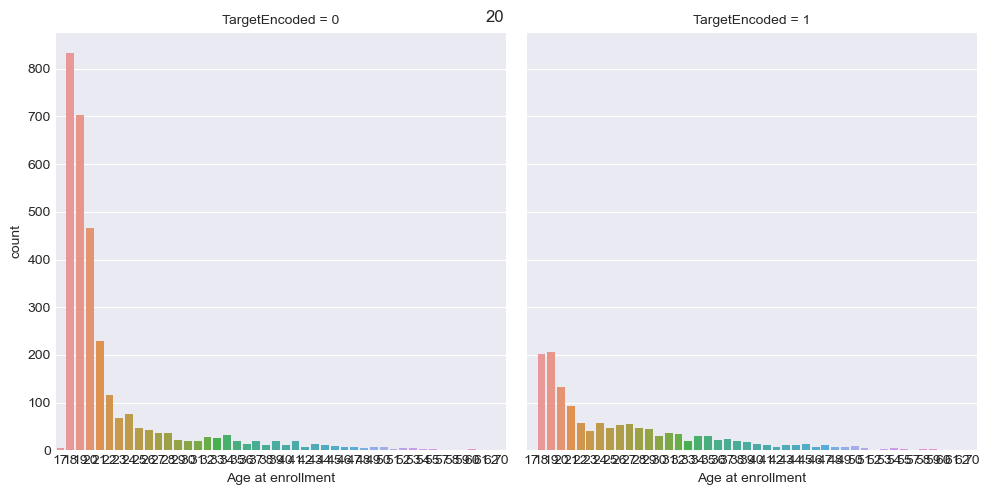

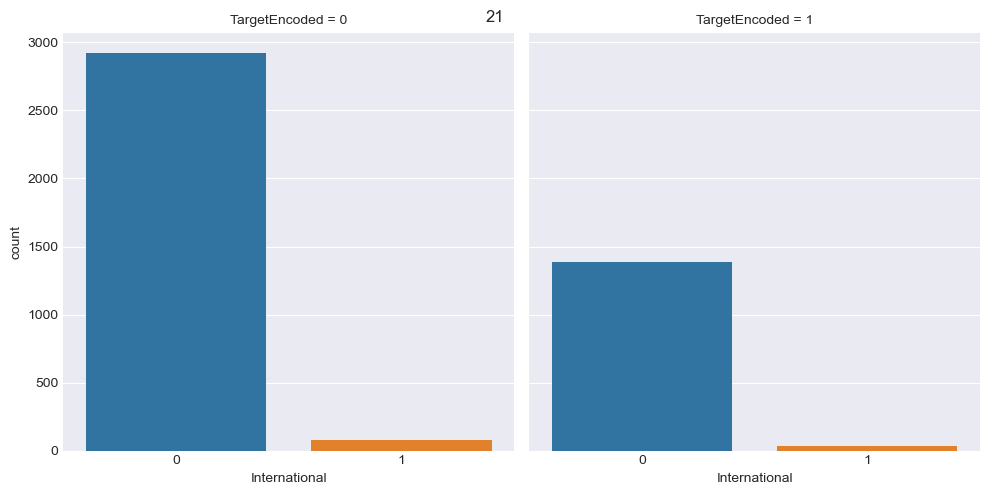

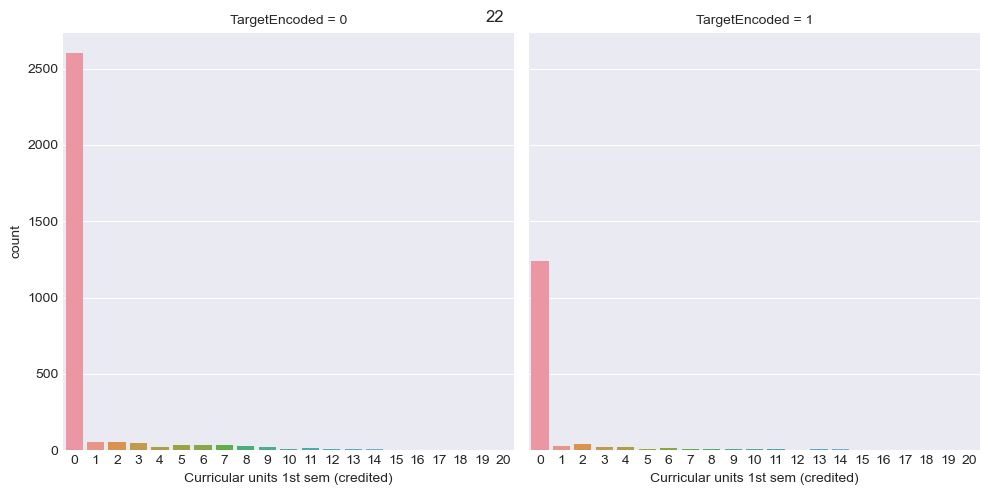

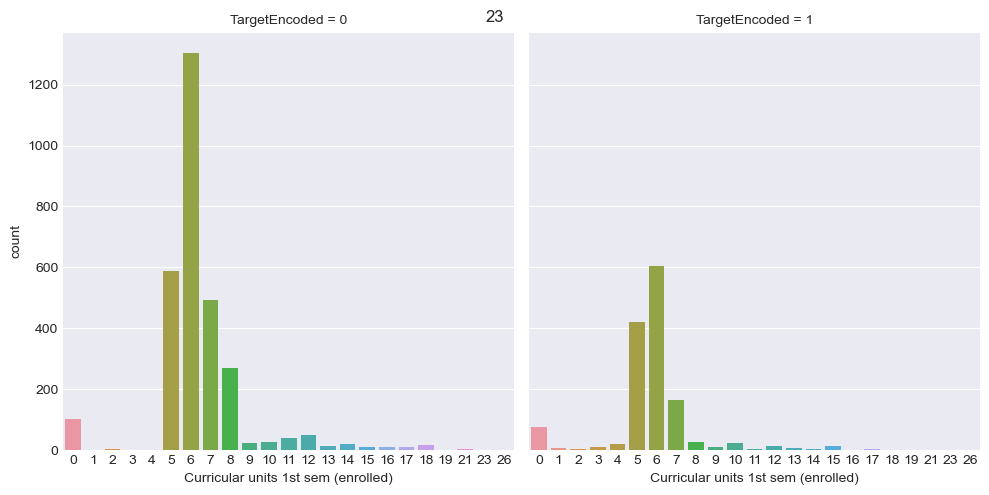

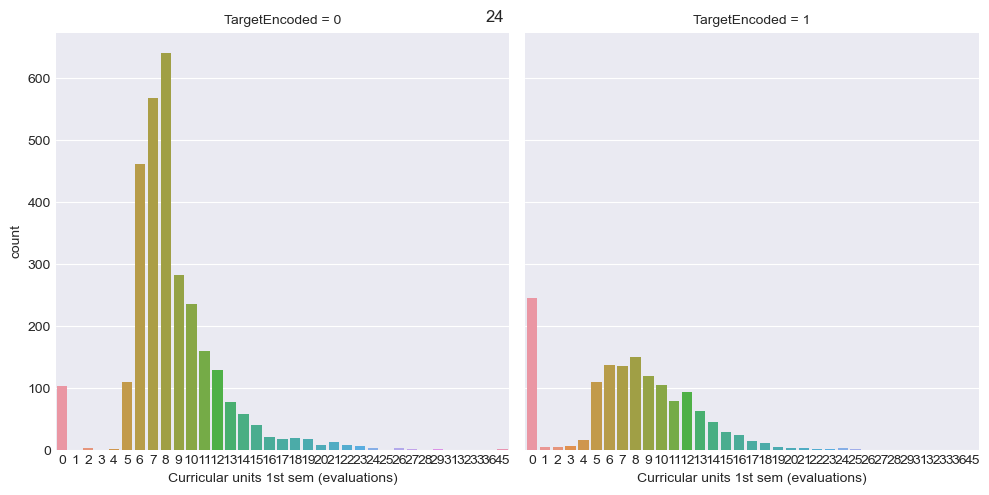

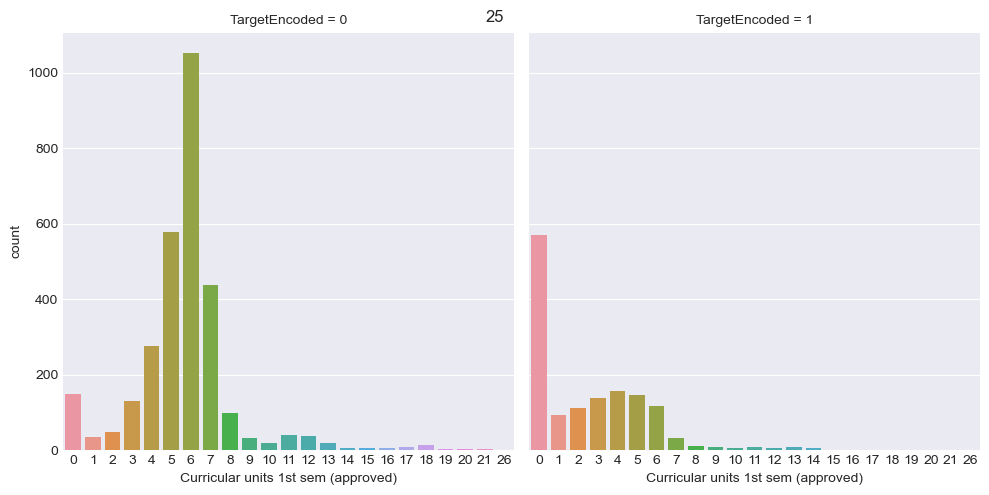

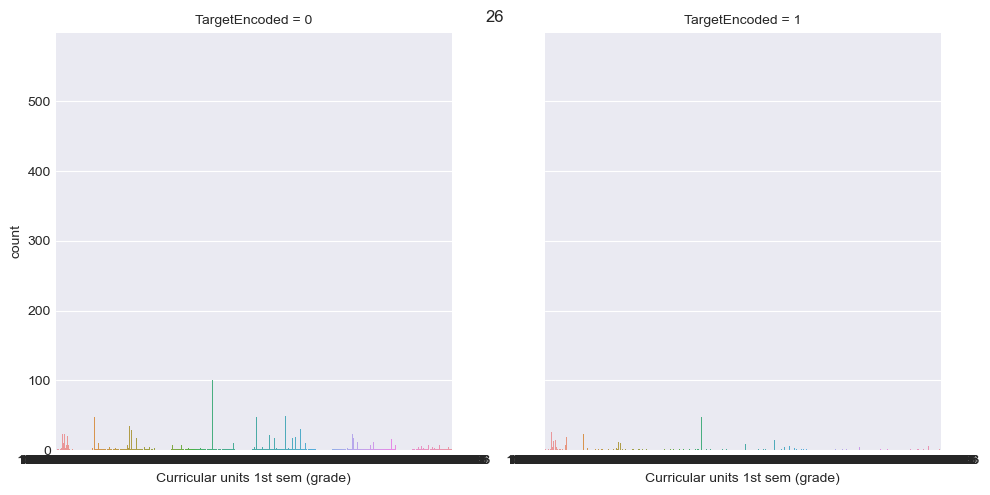

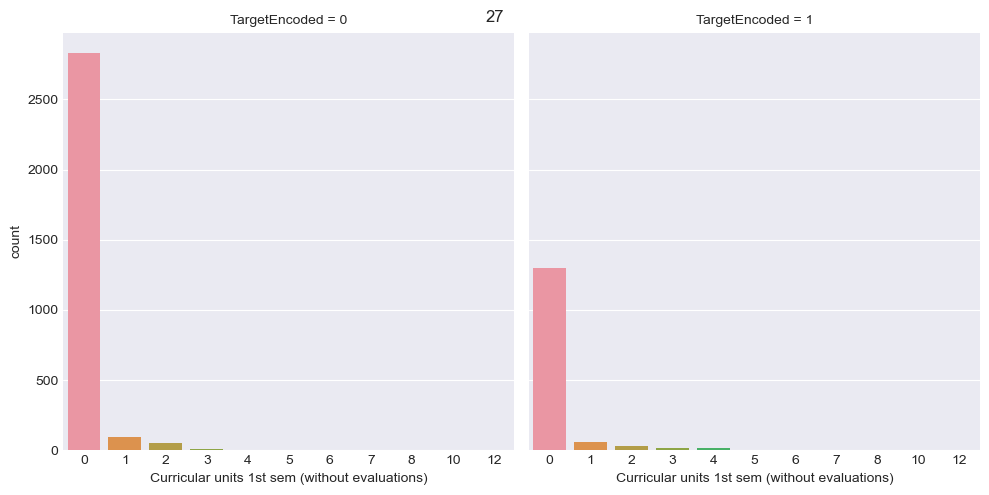

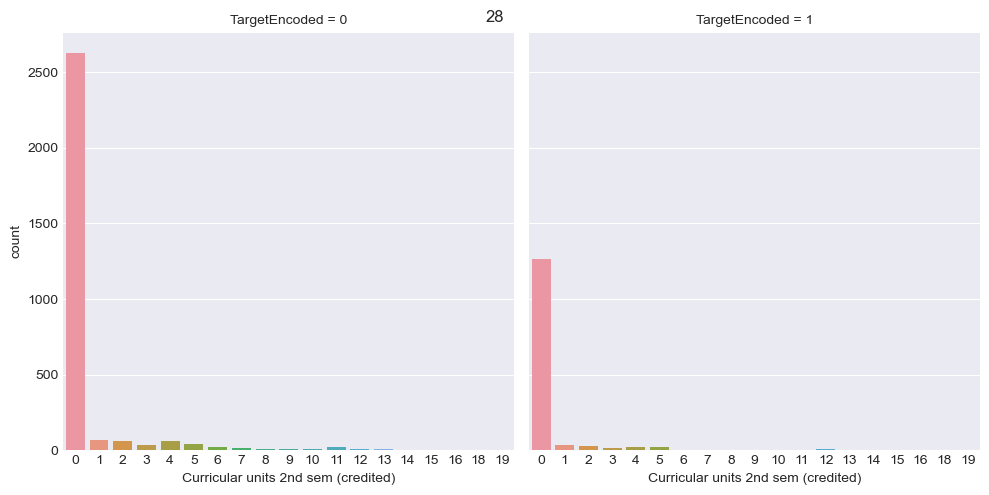

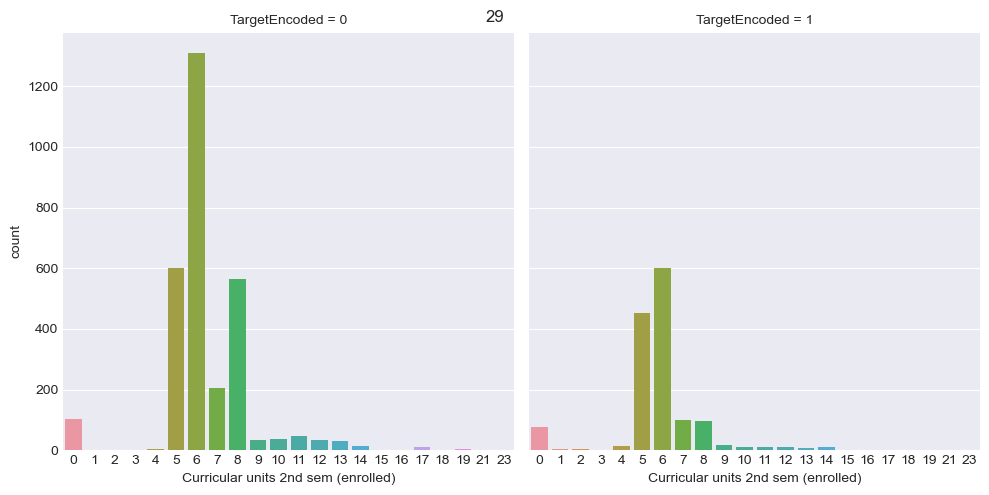

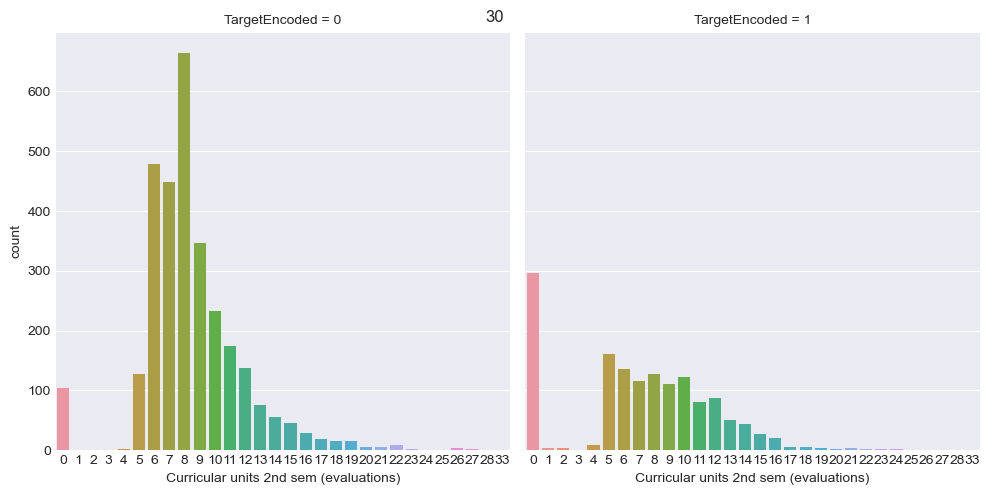

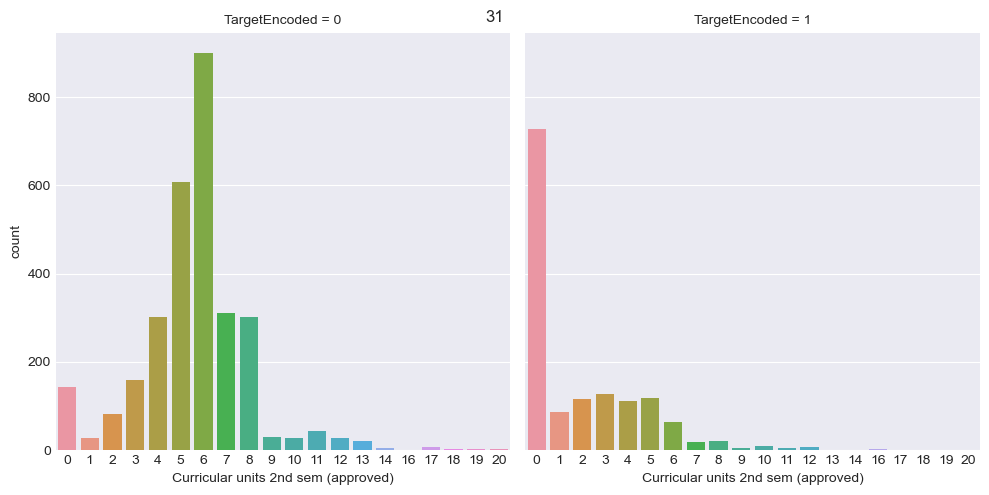

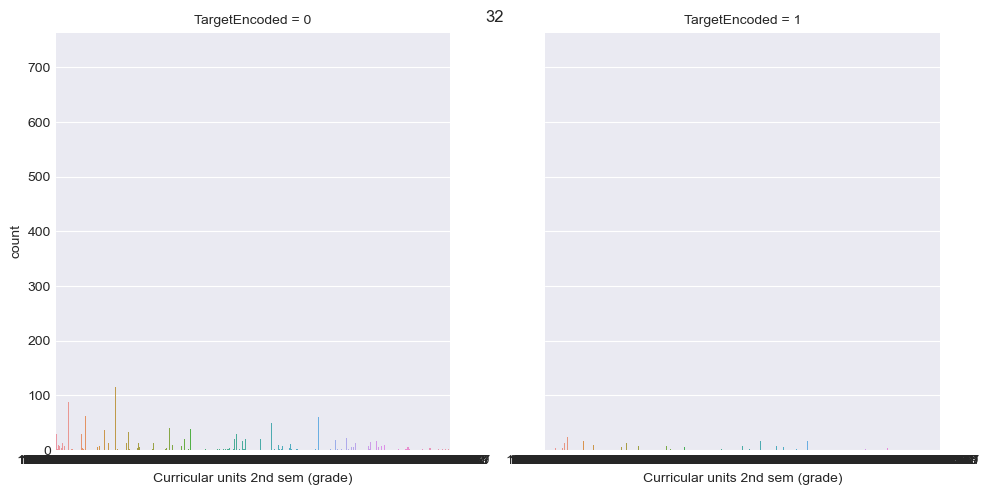

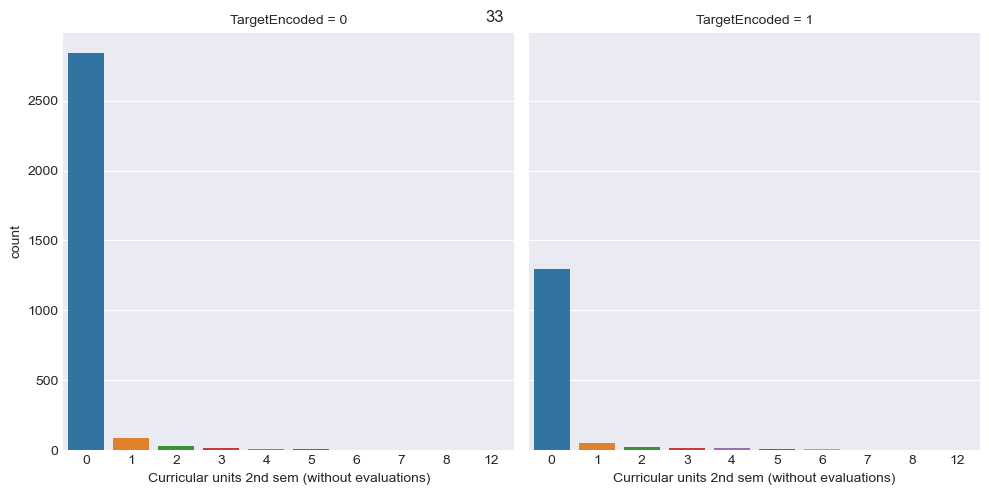

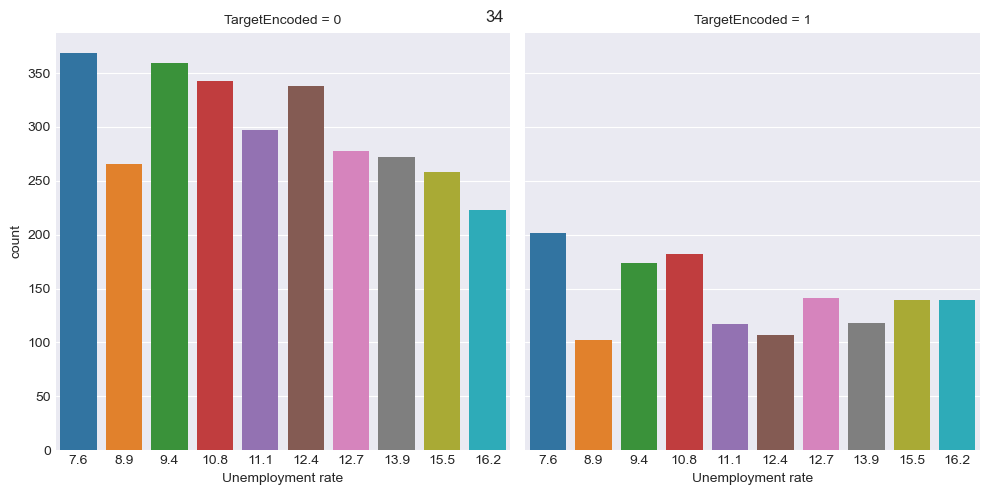

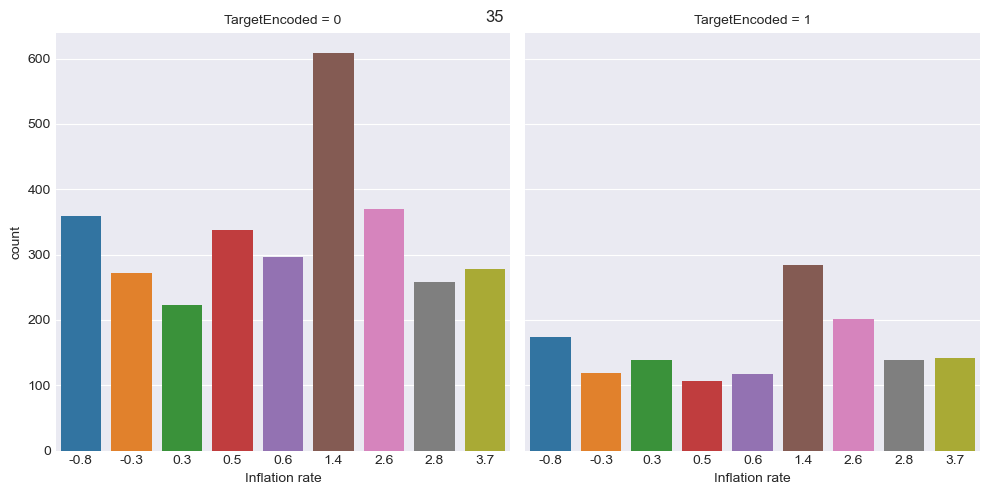

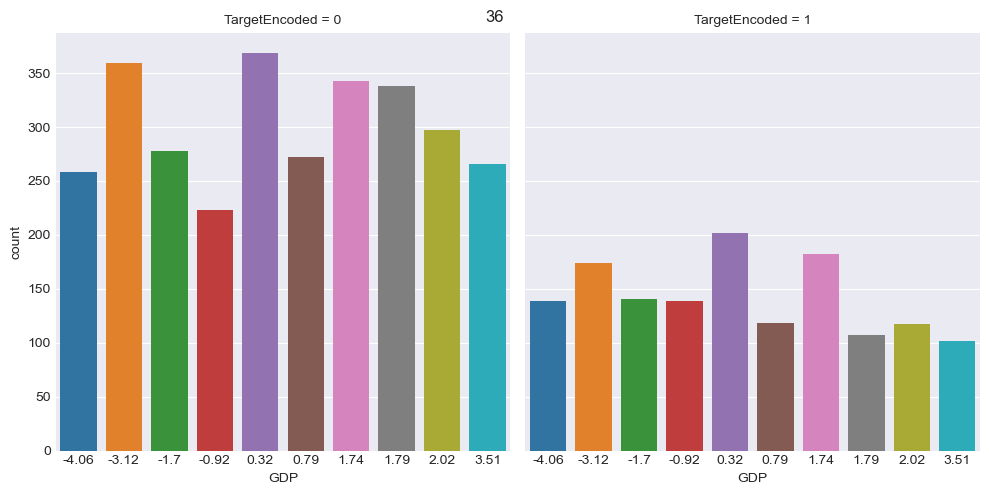

In [27]:
i = 1
for col in data.drop(columns=['TargetEncoded']):
        g = sns.catplot(x = col, kind='count', col = 'TargetEncoded', data=data, sharey=True)
        g.figure.suptitle(i)
        g.set_xticklabels()
        i += 1
        

###### End of Target Plot Against Each Feature
<small>[back up to the start of this plot](#6.-Target-Variable-Count-Plot-Across-Features)</small>


From plotting the Target against each feature we can observe the following:

- In Application mode there's a stark rise under the Dropped population for value: 39 - Over 23 years old.  

- It's hard to see the exact value due to the high unique values but for Course, the far right bar plot in pink (9991 - Management evening attendance) shows a much higher count for Dropped.

- The Displaced comparison with the Target seems surprising. There's a lot more Displaced that have not dropped out than dropped. 

- Debtor shows a higher count for those that are dropped.

- Same for those with Tuition fees that are NOT up to date.  It's higher for the dropped.

- For Gender,  the amount of dropped between male and female pretty balanced.  There are much more female enrolled though compared to males, more than twice the amount.




#### High Percentage of Dropped across Variable Values

Another look to possibly see some patterns with the Dropped Target is to calculate what percentage of a category value are Dropped vs Not Dropped.  Plot only the ones that have a higher percentage when Dropped.  Let's give a threshold of when Dropped percentage is above 65.  Let's loop through the columns and only show the values of the features that have a high Dropped percentage compared to Not Dropped.

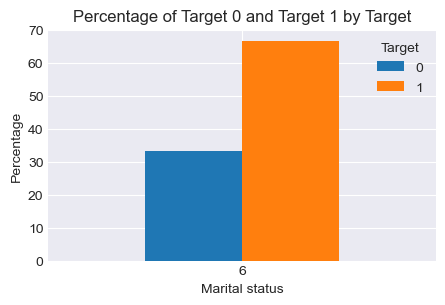

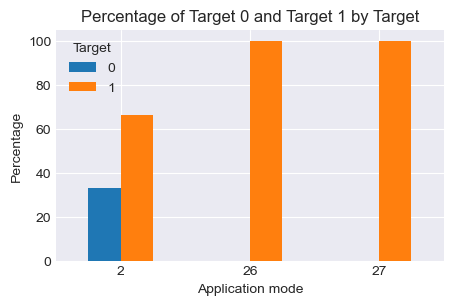

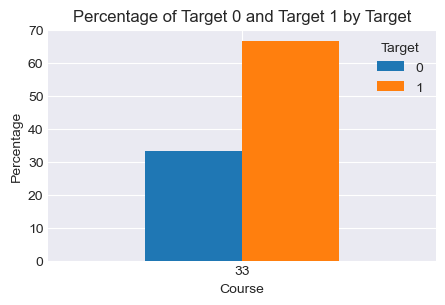

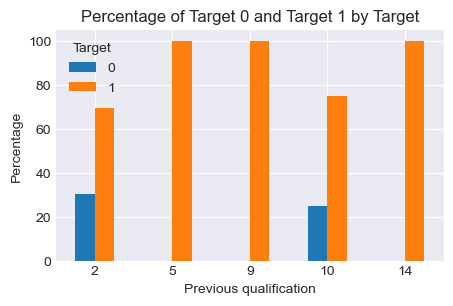

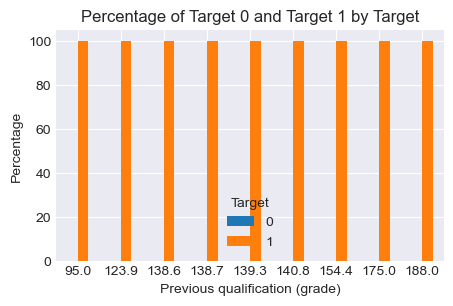

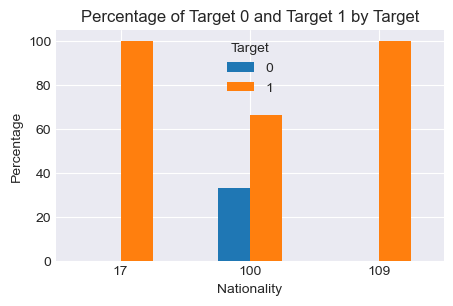

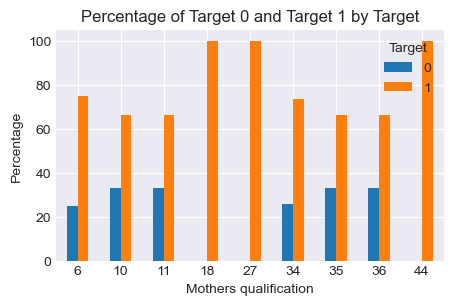

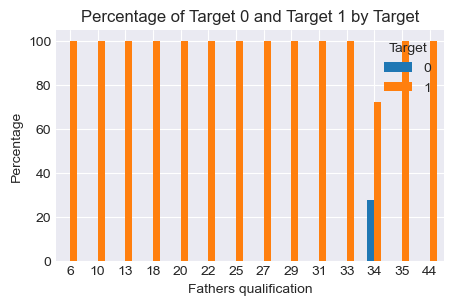

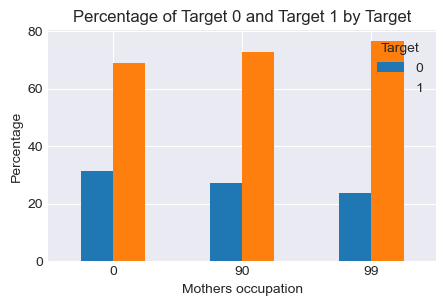

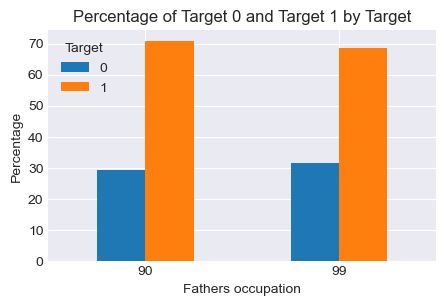

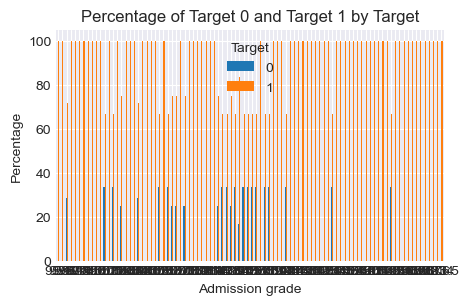

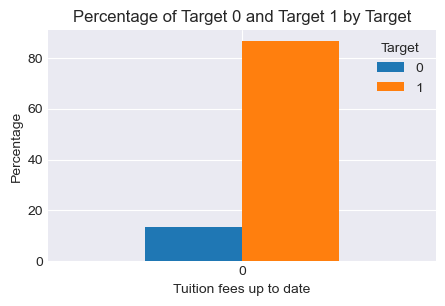

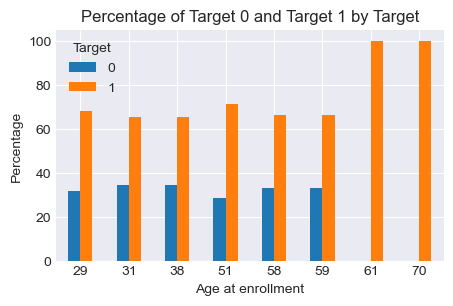

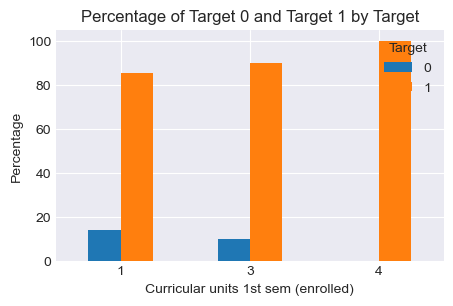

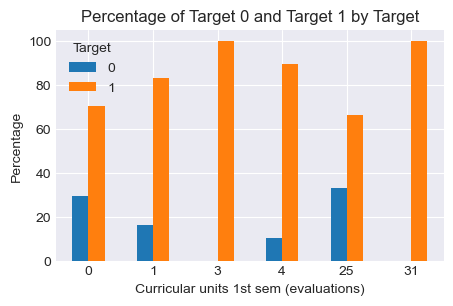

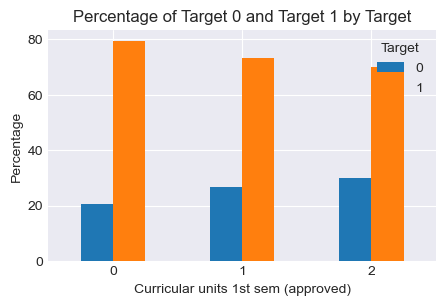

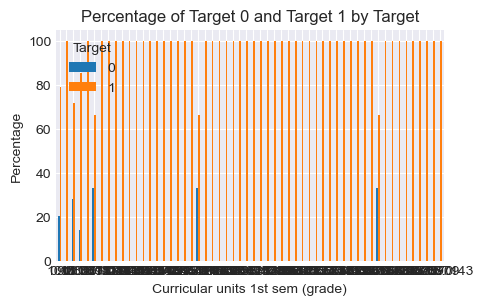

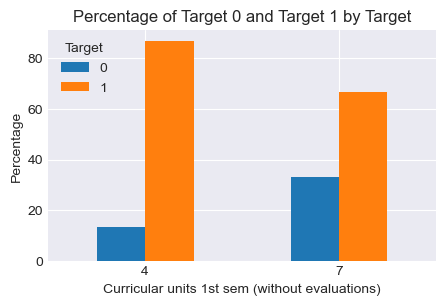

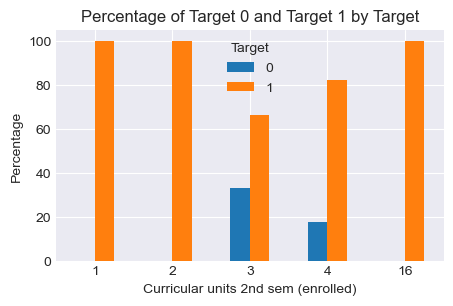

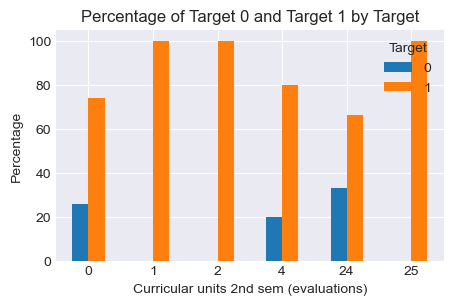

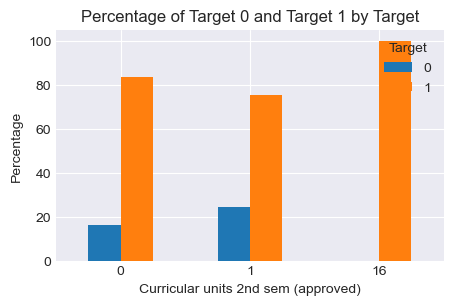

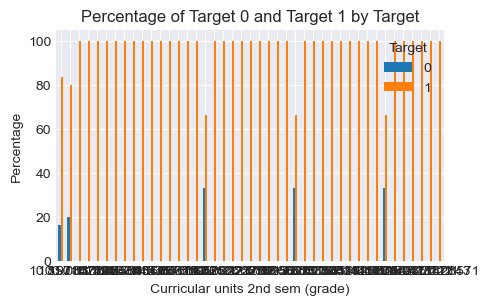

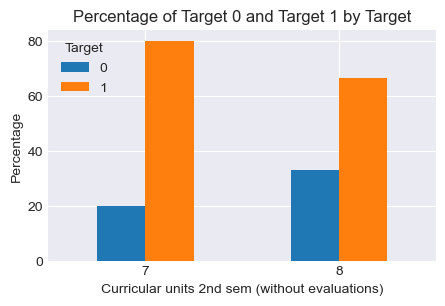

In [28]:
i = 1

for col in data.drop(columns=['TargetEncoded']):
        
        # Calculating the percentage of dropouts by col
        result = data.groupby(col)['TargetEncoded'].value_counts(normalize=True).mul(100).unstack()
        result = result.fillna(0)
        plotit = result[result[1] > 65]
        # print(plotit.sort_values(by=1, ascending=False))

        if plotit.empty == False:
                # Plotting
                plotit.plot(kind='bar', figsize=(5, 3))
                plt.title('Percentage of Target 0 and Target 1 by ' + column_name)
                plt.xlabel(col)
                plt.ylabel('Percentage')
                plt.xticks(rotation=0)
                plt.grid(True)
                plt.legend(title='Target')

                # Show the plot
                plt.show()


Not all columns plotted are applicable such as Curricular units or any other continuous numeric values. 

But some things to note from the above plots: 

- for Marital status: 6 - legally separated has a high percentage of dropped compared to not dropped.

- in Application mode below have high percentages for Dropped also
        - 2 - Ordinance No. 612/93, 
        - 26 - Ordinance No. 533-A/99, item b2 (Different Plan)
        - 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 

- for Course: those taking 33 - Biofuel Production Technologies have a higher likelihood of dropping out.
- Age of Enrollment: ages 29, 31, 38, 51, 58, 59, 61, 70 mostly the higher the age the chance of dropping out increases
- For both parents' occupation:  90 - Other Situation, 99 - (blank) are high risk.

Some of these might be anomalies but it's worth pointing out.


<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 6. Target Variable Count Plot Accross Features](#6.-Target-Variable-Count-Plot-Across-Features)

[proceed to next section: 8. Binning Categorical Variables](#8.-Binning-Categorical-Variables)

## 7. Target Variable Imbalance

Let's address the imbalance of the target variable that we pointed out earlier.  Since the target of Not Dropped Out (0) vs Dropped (1) has a ratio of 70% to 30%, we will use upsampling of the minority class.

In [29]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['TargetEncoded'] == 0]
minority_class = data[data['TargetEncoded'] == 1]

In [30]:
display(majority_class.head())
print('Shape of Majority Class:', majority_class.shape)
print('Shape of Minority Class:', minority_class.shape)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0


Shape of Majority Class: (3003, 37)
Shape of Minority Class: (1421, 37)


Separate the *Dropped* (1) vs *Not Dropped* (0) its own dataframe.  Then apply the resample function to create an upsampled minority.  Then add the upsample minority with the majority class.

In [31]:
# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match number of majority class
                              random_state=42)  # Reproducible results
display(minority_upsampled.head())
print('Minority Upsampled:', minority_upsampled.shape)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded
3564,1,44,1,9119,1,39,130.0,1,19,3,3,4,130.0,0,0,1,0,1,0,23,0,0,5,5,0,0.000000,0,0,5,5,0,0.00000,0,15.5,2.8,-4.06,1
2760,1,39,1,9500,1,4,150.0,1,3,38,3,7,127.0,1,0,0,1,1,0,26,0,2,7,8,6,13.046667,0,2,8,10,7,13.30625,0,11.1,0.6,2.02,1
4015,4,39,1,9991,0,1,133.1,1,37,37,5,5,138.7,0,0,0,1,0,0,31,0,0,5,7,3,10.333333,0,0,5,6,3,12.00000,0,10.8,1.4,1.74,1
3577,1,42,1,9500,1,1,100.0,1,19,19,9,9,100.0,0,0,1,1,1,0,24,0,0,8,16,2,10.250000,1,0,8,16,2,10.25000,1,12.7,3.7,-1.70,1
3501,1,39,1,9070,1,1,140.0,1,37,37,9,10,118.0,0,0,1,1,1,1,45,0,0,6,6,6,13.500000,0,0,6,6,0,0.00000,0,16.2,0.3,-0.92,1


Minority Upsampled: (3003, 37)


First confirm the TargetEncoded distribution count.

In [32]:
data['TargetEncoded'].value_counts()

TargetEncoded
0    3003
1    1421
Name: count, dtype: int64

Now combine the upsampled minority with the majority population.  This will be the new dataset we will work on.

In [33]:
# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority_class, minority_upsampled])

# Now 'balanced_data' contains an upsampled distribution of the minority class

Compare the TargetEncoded value counts with the new unbalanced_data.

In [34]:
display(balanced_data.head())
print('Shape of unbalanced_data:', balanced_data.shape)
print('Distribution of unbalanced_data:', balanced_data['TargetEncoded'].value_counts())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0


Shape of unbalanced_data: (6006, 37)
Distribution of unbalanced_data: TargetEncoded
0    3003
1    3003
Name: count, dtype: int64


So the new variable with the upsampled data confirms that the distribution of each TargetEncoded value are equal.

Let's plot to confirm visually.

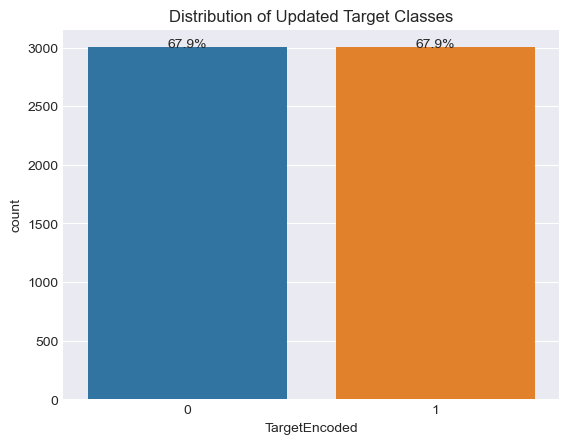

In [35]:
sns.countplot(x='TargetEncoded', data=balanced_data)
plt.title('Distribution of Updated Target Classes')

# show percentage of each Target value on plot
total = len(data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 0.1,
             '{:.1f}%'.format((height / total) * 100),
             ha="center")
    # Add custom legend labels

plt.show()

Looks good.  Now I'd like to keep name of the main dataframe that we'll be working on to be called *data* too so I'll set the *unbalanced_data* to be the new *data* variable.

In [36]:
data = balanced_data

Confirm by plotting the same TargetEncoded distribution but using *data* variable.

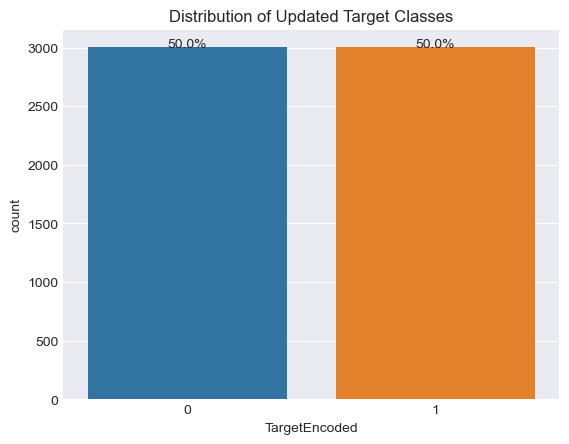

In [37]:
sns.countplot(x='TargetEncoded', data=data)
plt.title('Distribution of Updated Target Classes')

# show percentage of each Target value on plot
total = len(data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 0.1,
             '{:.1f}%'.format((height / total) * 100),
             ha="center")
    # Add custom legend labels

plt.show()

Great now let's continue with binning the categorical variables.

<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 7. Target Variable Imbalance](#7.-Target-Variable-Imbalance)

[proceed to next section: 9. Qualification Variables](#9.-Qualification-Variables)

## 8. Binning Categorical Variables

Now we will do binning on some of the Categorical columns.  For some we will be using some Domain Knowledge and create the most approriate buckets for the categories to group them in.  On others we will use frequency and bucket the smallest frequency to *Other*.

Using the list of these categorical columns we identified above earlier, we'll go through each one and address appropriately.

- Application mode
- Application order
- Course
- Fathers occupation
- Mothers occupation
- Nationality
- Marital status
- Previous qualification
- Fathers qualification
- Mothers qualification

Let's start with the Qualification columns.

<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 8. Binning Categorical Variables](#8.-Binning-Categorical-Variables)

[proceed to next section: 10. Marital Status Variable](#10.-Marital-Status-Variable)

### 9. Qualification Variables

For example, in the Qualification columns used by *Previous qualification*, *Mothers qualification* and *Fathers qualification*, there are 34 different possible values that can be grouped to similar qualifications.  Perhaps group them into 9 levels starting from primary education level all the way up to higher education.  From research and to the best of my knowledge, I bunched each of the the 34 values to the most comparable ones.

There would need to be buckets for Vocational and the incomplete ones, Unknown and Nonliterate.

The mapping chart below is the result of the grouping.  Using this as a guideline, we'll use the functions .map to accomplish this.

| Original Qualification: 34 Distinct Values                           | New Bin Value       | New (Binned) Qualification Values: 9 Distinct Values and its ID Value |
|----------------------------------------------------------------------|----------------------|------------------------------------|
| 1 - Secondary Education - 12th Year of Schooling or Equivalent      | Secondary - 7            | Unknown - 1                            |
| 2 - Higher Education - Bachelor's Degree                            | Higher - 9               | Nonliterate - 2                        |
| 3 - Higher Education - Degree                                       | Higher - 9               | Elementary - 3                         |
| 4 - Higher Education - Master's                                     | Higher - 9               | Middle School Incomplete - 4           |
| 5 - Higher Education - Doctorate                                    | Higher - 9               | Middle School - 5                      |
| 6 - Frequency of Higher Education                                   | Higher - 9               | Secondary Incomplete - 6               |
| 9 - 12th Year of Schooling - Not Completed                          | Secondary Incomplete - 6| Secondary - 7                          |
| 10 - 11th Year of Schooling - Not Completed                        | Secondary Incomplete - 6| Vocational - 8                             |
| 11 - 7th Year (Old)                                                 | Middle School - 5        | Higher - 9                         |
| 12 - Other - 11th Year of Schooling                                 | Secondary - 7            |                                    |
| 13 - 2nd year complementary high school course                      | Secondary - 7            |                                    |
| 14 - 10th Year of Schooling                                         | Secondary - 7            |                                    |
| 15 - 10th year of schooling - not completed | Secondary Incomplete - 6 ||
| 18 - General commerce course                                        | Higher - 9               |                                    |
| 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent  | Secondary Incomplete - 6|                                |
| 20 - Complementary High School Course                               | Secondary - 7            |                                    |
| 22 - Technical-professional course                                  | Vocational - 8           |                                    |
| 25 - Complementary High School Course - not concluded               | Secondary Incomplete - 6|                                    |
| 26 - 7th year of schooling                                          | Middle School - 5        |                                    |
| 27 - 2nd cycle of the general high school course                    | Secondary Incomplete - 6|                                    |
| 29 - 9th Year of Schooling - Not Completed                         | Secondary Incomplete - 6|                                    |
| 30 - 8th year of schooling                                          | Middle School Incomplete - 4 |                                |
| 31 - General Course of Administration and Commerce                  | Higher - 9               |                                    |
| 33 - Supplementary Accounting and Administration                   | Vocational - 8           |                                    |
| 34 - Unknown                                                         | Unknown - 1             |                                    |
| 35 - Can't read or write                                            | Nonliterate - 2          |                                    |
| 36 - Can read without having a 4th year of schooling                | Nonliterate - 2          |                                    |
| 37 - Basic education 1st cycle (4th/5th year) or equivalent         | Elementary - 3           |                                    |
| 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent     | Middle School - 5        |                                    |
| 39 - Technological specialization course                            | Vocational - 8           |                                    |
| 40 - Higher education - degree (1st cycle)                          | Secondary - 7            |                                    |
| 41 - Specialized higher studies course                              | Higher - 9               |                                    |
| 42 - Professional higher technical course                           | Higher - 9               |                                    |
| 43 - Higher Education - Master (2nd cycle)                          | Higher - 9               |                                    |
| 44 - Higher Education - Doctorate (3rd cycle)                       | Higher - 9               |                                    |


I'll store this maping chart above into a variable called *qualification_bin_mapping*.

In [38]:
qualification_bin_mapping = {
            1:7,
            2:9,
            3:9,
            4:9,
            5:9,
            6:9,
            9:6,
            10:6,
            11:5,
            12:7,
            13:7,
            14:7,
            15:6,
            18:9,
            19:6,
            20:7,
            22:8,
            25:6,
            26:5,
            27:6,
            29:6,
            30:4,
            31:9,
            33:8,
            34:1,
            35:2,
            36:2,
            37:3,
            38:5,
            39:8,
            40:7,
            41:9,
            42:9,
            43:9,
            44:9
}

display(qualification_bin_mapping)

{1: 7,
 2: 9,
 3: 9,
 4: 9,
 5: 9,
 6: 9,
 9: 6,
 10: 6,
 11: 5,
 12: 7,
 13: 7,
 14: 7,
 15: 6,
 18: 9,
 19: 6,
 20: 7,
 22: 8,
 25: 6,
 26: 5,
 27: 6,
 29: 6,
 30: 4,
 31: 9,
 33: 8,
 34: 1,
 35: 2,
 36: 2,
 37: 3,
 38: 5,
 39: 8,
 40: 7,
 41: 9,
 42: 9,
 43: 9,
 44: 9}

From the above output, we're assured the chart is implemented and can go ahead and map the 3 columns: *Previous qualification*, *Mothers qualification* and *Fathers qualification*. 
Apply the mapping to these columns in the DataFrame. 

In [39]:
# Apply the mapping to the appropriate columns in the DataFrame
data['Previous qualification Bin'] = data['Previous qualification'].map(qualification_bin_mapping)
data['Mothers qualification Bin'] = data['Mothers qualification'].map(qualification_bin_mapping)
data['Fathers qualification Bin'] = data['Fathers qualification'].map(qualification_bin_mapping)

Confirm below to see the change in the dataframe using .info

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 1 to 2393
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  6006 non-null   int64  
 1   Application mode                                6006 non-null   int64  
 2   Application order                               6006 non-null   int64  
 3   Course                                          6006 non-null   int64  
 4   Daytime/evening attendance                      6006 non-null   int64  
 5   Previous qualification                          6006 non-null   int64  
 6   Previous qualification (grade)                  6006 non-null   float64
 7   Nationality                                     6006 non-null   int64  
 8   Mothers qualification                           6006 non-null   int64  
 9   Fathers qualification                         

Now remove the 3 original *qualtification* columns: *Previous qualification*, *Mothers qualification* and *Fathers qualification*.


In [41]:
data.drop('Previous qualification', axis=1, inplace=True)
data.drop('Mothers qualification', axis=1, inplace=True)
data.drop('Fathers qualification', axis=1, inplace=True)

Checking to that the 3 columns are removed by looking at some data.

In [42]:
data.head(15)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Nationality,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin
1,1,15,1,9254,1,160.0,1,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0,7,7,9
3,1,17,2,9773,1,122.0,1,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,7,5,3
4,2,39,1,8014,0,100.0,1,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0,7,3,5
5,2,39,1,9991,0,133.1,1,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0,6,3,3
6,1,1,1,9500,1,142.0,1,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0,7,6,5
8,1,1,3,9238,1,137.0,62,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,0,7,7,7
10,1,1,1,9670,1,139.0,1,5,7,130.6,1,0,0,1,0,0,18,0,0,6,6,6,12.333333,0,0,6,7,5,14.200000,0,13.9,-0.3,0.79,0,7,5,6
11,1,1,1,9500,1,136.0,1,9,9,119.3,1,0,0,1,0,1,18,0,0,8,8,7,13.214286,0,0,8,8,7,13.214286,0,12.7,3.7,-1.70,0,7,6,5
13,1,53,1,9254,1,110.0,1,4,7,111.8,1,0,0,1,0,1,21,0,0,6,7,6,10.571429,0,0,6,8,5,11.000000,0,8.9,1.4,3.51,0,9,7,7
14,1,1,1,9085,1,149.0,1,5,5,137.1,1,0,0,1,0,1,18,0,0,5,7,4,13.250000,0,0,5,5,5,12.000000,0,10.8,1.4,1.74,0,7,5,3


##### End of Binning Qualification columns

<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 9. Qualification Variables](#9.-Qualification-Variables)

[proceed to next section: 11. Nationality Variable](#11.-Nationality-Variable)

### 10. Marital Status Variable

#### Binning of Marital Status Variable
Let's look at how the values are distributed in Marital Status. 

In [43]:
data['Marital status'].value_counts(normalize=True, ascending=False).mul(100).round(2)

Marital status
1    87.16
2     9.49
4     2.35
5     0.72
6     0.22
3     0.07
Name: proportion, dtype: float64

THe most frequent at 87.16% is *1 - Single*, then down to 9.49% for *2 - Married*, then 2.35% for *4 - Divorced*, and then less than 1% for *5 - Facto Union*, *6 - Legally Separated*, and *3 - Widower*.

Let's bin them to have Single, Married and Divorced on its own bin and the last 3 (Facto Union, Legally Separated, Widower) are bundled together into Other.   

Since the current values for Marital Status is from 1-6, I will use 7 to be the Other.  I will update the values 5, 6, and 3 to be 7.  Refer to the chart below.

| Marital Status          | Percentage Frequency | New Bin Value | End Result  |
|-------------------------|----------------------|---------------|-------|
| 1 - single              | 87.16|1             | Single  |
| 2 - married             | 9.49|2             | Married  |
| 4 - divorced            |2.35| 4             | Divorced  |
| 5 - facto union         |0.72| 7             | Other |
| 6 - legally separated   |0.22| 7             | Other |
| 3 - widower             | 0.07|7             | Other |


We'll create a mapping variable below to imitate the mapping chart above.


In [44]:
marital_bin_mapping = {
    1:1,
    2:2,
    3:7,
    4:4,
    5:7,
    6:7
}

display(marital_bin_mapping)

{1: 1, 2: 2, 3: 7, 4: 4, 5: 7, 6: 7}

Using the variable above we can go ahead and map the *Marital status* and create a new one called *Marital Status Bin*. 

In [45]:
# Apply the mapping to the appropriate column
data['Marital Status Bin'] = data['Marital status'].map(marital_bin_mapping)

Confirm the changes.  Check the new columns values and distribution.

In [46]:
print(data['Marital Status Bin'].value_counts(normalize=True, ascending=False).mul(100).round(2))
display(data.head())

Marital Status Bin
1    87.16
2     9.49
4     2.35
7     1.00
Name: proportion, dtype: float64


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Nationality,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin
1,1,15,1,9254,1,160.0,1,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0,7,7,9,1
3,1,17,2,9773,1,122.0,1,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,7,5,3,1
4,2,39,1,8014,0,100.0,1,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0,7,3,5,2
5,2,39,1,9991,0,133.1,1,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0,6,3,3,2
6,1,1,1,9500,1,142.0,1,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0,7,6,5,1


We see that the values for Facto Union, Legally Separated, Widower are now all under 7 in the new *Marital Status Bin* column.  Let's go ahead and delete the original *Marital status* column and view the dataframe to confirm.


In [47]:
data.drop('Marital status', axis=1, inplace=True)

Have a look at the data to check once again. 

In [48]:
display(data.head(15))

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Nationality,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin
1,15,1,9254,1,160.0,1,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0,7,7,9,1
3,17,2,9773,1,122.0,1,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,7,5,3,1
4,39,1,8014,0,100.0,1,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0,7,3,5,2
5,39,1,9991,0,133.1,1,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0,6,3,3,2
6,1,1,9500,1,142.0,1,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0,7,6,5,1
8,1,3,9238,1,137.0,62,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,0,7,7,7,1
10,1,1,9670,1,139.0,1,5,7,130.6,1,0,0,1,0,0,18,0,0,6,6,6,12.333333,0,0,6,7,5,14.200000,0,13.9,-0.3,0.79,0,7,5,6,1
11,1,1,9500,1,136.0,1,9,9,119.3,1,0,0,1,0,1,18,0,0,8,8,7,13.214286,0,0,8,8,7,13.214286,0,12.7,3.7,-1.70,0,7,6,5,1
13,53,1,9254,1,110.0,1,4,7,111.8,1,0,0,1,0,1,21,0,0,6,7,6,10.571429,0,0,6,8,5,11.000000,0,8.9,1.4,3.51,0,9,7,7,1
14,1,1,9085,1,149.0,1,5,5,137.1,1,0,0,1,0,1,18,0,0,5,7,4,13.250000,0,0,5,5,5,12.000000,0,10.8,1.4,1.74,0,7,5,3,1


Great. No more *Marital status* column. It has been replaced with *Marital Status Bin* that has only 4 category values.

Let's look at what else is left.  Below is the same list I created earlier above after looking through the data and seeing the high cardinality categorical columns that need decreasing. 

- Application mode
- Application order
- Course
- Fathers occupation
- Mothers occupation
- Nationality
- ~~Marital status~~
- ~~Previous qualification~~
- ~~Fathers qualification~~
- ~~Mothers qualification~~


Onto the *Nationality* column now. 


<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 10. Marital Variable](#10.-Marital-Variable)

[proceed to next section: 12. Occupation Variables](#12.-Occupation-Variables)

## 11. Nationality Variable

#### Binning Nationality Variable

Look again at the distribution of the *Nationality* column using .value_counts descending from most to least frequency.


In [49]:
nationality_breakdown = data['Nationality'].value_counts(normalize=True, ascending=False).mul(100).round(2)
print(nationality_breakdown)
print('Total rows:', nationality_breakdown.shape)

Nationality
1      97.60
41      0.88
22      0.35
6       0.28
26      0.25
21      0.10
103     0.08
24      0.07
101     0.05
11      0.05
17      0.05
62      0.03
25      0.03
2       0.03
109     0.03
32      0.02
13      0.02
100     0.02
108     0.02
105     0.02
14      0.02
Name: proportion, dtype: float64
Total rows: (21,)


So 97.5% of the data is *1 - Portuguese* while the rest of the other 20 items tally up to only 2.5%.   I think it safe to bin the 20 items to *Other*. Let's work on that.

We will map the following:
| Nationality               | Percentage Frequency | New Bin Value | End Result |
|--------------------------------|----------------------|-----------|------------|
| 1 - Portuguese                 | 97.60                | 1         | Portuguese |
| 41 - Brazilian                 | 0.88                 | 0         | Other      |
| 22 - Cape Verdean              | 0.35                 | 0         | Other      |
| 6 - Spanish                    | 0.38                 | 0         | Other      |
| 26 - Santomean                 | 0.25                 | 0         | Other      |
| 21 - Angolan                   | 0.10                 | 0         | Other      |
| 103 - Ukrainian                | 0.08                 | 0         | Other      |
| 24 - Guinean                   | 0.07                 | 0         | Other      |
| 101 - Mexican                  | 0.05                 | 0         | Other      |
| 11 - Italian                   | 0.05                 | 0         | Other      |
| 17 - Lithuanian                | 0.05                 | 0         | Other      |
| 62 - Romanian                  | 0.03                 | 0         | Other      |
| 25 - Mozambican                | 0.03                 | 0         | Other      |
| 2 - German                     | 0.03                 | 0         | Other      |
| 109 - Colombian                | 0.03                 | 0         | Other      |
| 32 - Turkish                   | 0.02                 | 0         | Other      |
| 13 - Dutch                     | 0.02                 | 0         | Other      |
| 100 - Moldova (Republic of)    | 0.02                 | 0         | Other      |
| 108 - Cuban                    | 0.02                 | 0         | Other      |
| 105 - Russian                  | 0.02                 | 0         | Other      |
| 14 - English                   | 0.02                 | 0         | Other      |


This is simple enough so we will not need to use .map.  We'll just create a new column based on the condition, if *Nationality* is 1 set new *Nationality Bin* column to 1 and all other values in *Nationality* set *Nationality Bin* to 0.

In [50]:
data['Nationality Bin'] = np.where(data['Nationality'] == 1, 1, 0)

Confirm the new column with sample. 
Then look at the new column next to the original to compare

In [51]:
display(data.sample(5))
display(data[['Nationality', 'Nationality Bin']].sample(10))

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Nationality,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin,Nationality Bin
1544,39,1,8014,0,133.1,1,0,0,100.0,1,0,0,1,0,0,27,0,0,6,11,4,12.250000,0,0,6,16,3,12.000000,0,7.6,2.6,0.32,1,7,1,1,1,1
671,42,1,8014,0,120.0,1,90,7,120.0,1,0,0,1,0,0,30,0,9,11,19,9,13.444444,1,5,7,7,7,14.714286,0,7.6,2.6,0.32,1,7,3,5,1,1
762,43,3,8014,0,100.0,1,9,9,120.0,1,0,0,1,1,0,41,0,5,9,11,9,12.000000,0,3,7,8,6,12.000000,0,9.4,-0.8,-3.12,0,6,3,3,2,1
4099,18,1,9238,1,147.0,1,4,0,130.2,0,0,0,1,0,0,18,0,0,1,1,0,0.000000,1,0,6,0,0,0.000000,0,10.8,1.4,1.74,1,7,5,1,1,1
4346,17,2,9254,1,107.0,1,5,5,102.8,1,0,0,1,0,0,20,0,0,6,16,1,10.000000,0,0,6,12,0,0.000000,0,10.8,1.4,1.74,1,7,7,6,1,1


,Nationality,Nationality Bin
3135,1,1
1371,1,1
3431,1,1
1698,1,1
2933,1,1
1921,1,1
3477,1,1
2348,1,1
1376,1,1
3164,1,1


Grab the value count on the new Nationality Bin column.

In [52]:
print(data['Nationality Bin'].value_counts(normalize=True, ascending=False).mul(100).round(2))

Nationality Bin
1    97.6
0     2.4
Name: proportion, dtype: float64


Looks good.  97.6% are 1 which is Portugese and the rest of the 2.4% are Others.  Now let's remove the original column.

In [53]:
data.drop('Nationality', axis=1, inplace=True)

Check the data again to confirm.

In [54]:
display(data.head(10))


,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin,Nationality Bin
1,15,1,9254,1,160.0,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0,7,7,9,1,1
3,17,2,9773,1,122.0,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,7,5,3,1,1
4,39,1,8014,0,100.0,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0,7,3,5,2,1
5,39,1,9991,0,133.1,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0,6,3,3,2,1
6,1,1,9500,1,142.0,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0,7,6,5,1,1
8,1,3,9238,1,137.0,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,0,7,7,7,1,0
10,1,1,9670,1,139.0,5,7,130.6,1,0,0,1,0,0,18,0,0,6,6,6,12.333333,0,0,6,7,5,14.200000,0,13.9,-0.3,0.79,0,7,5,6,1,1
11,1,1,9500,1,136.0,9,9,119.3,1,0,0,1,0,1,18,0,0,8,8,7,13.214286,0,0,8,8,7,13.214286,0,12.7,3.7,-1.70,0,7,6,5,1,1
13,53,1,9254,1,110.0,4,7,111.8,1,0,0,1,0,1,21,0,0,6,7,6,10.571429,0,0,6,8,5,11.000000,0,8.9,1.4,3.51,0,9,7,7,1,1
14,1,1,9085,1,149.0,5,5,137.1,1,0,0,1,0,1,18,0,0,5,7,4,13.250000,0,0,5,5,5,12.000000,0,10.8,1.4,1.74,0,7,5,3,1,1


Let's cross off Nationality and move onto the next.

- Application mode
- Application order
- Course
- Fathers occupation
- Mothers occupation
- ~~Nationality~~
- ~~Marital status~~
- ~~Previous qualification~~
- ~~Fathers qualification~~
- ~~Mothers qualification~~





Onto the *Occupation* columns now. 


<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 11. Target Variable](#5.-Target-Variable)

[proceed to next section: 13. Application Mode Variable](#13.-Application-Mode-Variable)

## 12. Occupation Variables
#### Binning Occupation Variables

##### Father's Occupation


Look again at the distribution of the *Fathers occupation* column using .value_counts descending from most to least frequency and the count of the distinct values.


In [55]:
father_occupation_frequency_percentages = data['Fathers occupation'].value_counts(normalize=True, ascending=False).mul(100).round(2)
print('Total values:', father_occupation_frequency_percentages.shape)
print(father_occupation_frequency_percentages)

Total values: (46,)
Fathers occupation
9      22.64
7      15.13
5      11.24
3       8.79
4       8.39
8       6.96
10      5.79
6       5.53
2       4.81
0       3.68
1       2.96
90      1.70
99      0.62
193     0.30
144     0.13
171     0.13
152     0.12
192     0.10
163     0.08
103     0.08
175     0.07
112     0.07
194     0.07
135     0.05
123     0.05
183     0.05
181     0.05
182     0.03
151     0.03
172     0.03
122     0.03
102     0.03
101     0.02
153     0.02
114     0.02
174     0.02
141     0.02
132     0.02
134     0.02
143     0.02
131     0.02
161     0.02
195     0.02
121     0.02
124     0.02
154     0.02
Name: proportion, dtype: float64


46 categories for *Fathers occupation* and it looks like the majority of them are less than 1% in frequency.  How many are more than 1%? Filter to show only those values with more than 1% frequency

In [56]:
print(father_occupation_frequency_percentages[father_occupation_frequency_percentages > 1])
print('Total categories over 1 percent frequeancy:', father_occupation_frequency_percentages[father_occupation_frequency_percentages > 1].shape)

Fathers occupation
9     22.64
7     15.13
5     11.24
3      8.79
4      8.39
8      6.96
10     5.79
6      5.53
2      4.81
0      3.68
1      2.96
90     1.70
Name: proportion, dtype: float64
Total categories over 1 percent frequeancy: (12,)


Out of the 46 categories, 12 of them are over 1% frequency.  We can bin down to 13 categories, keeping the 12 that are over 1% and the rest will be bundled into *Other*, just like the pervious categorical variables have been binned. 

| Fathers Occupation                                                                                                        | Percentage Frequency | New Bin Value | Description                                                                                       |
|---------------------------------------------------------------------------------------------------------------------------|----------------------|---------------|---------------------------------------------------------------------------------------------------|
| 9 - Unskilled Workers                                                                                                     | 22.64%               | 9             | Unskilled Workers                                                                                 |
| 7 - Skilled Workers in Industry, Construction and Craftsmen                                                               | 15.13%               | 7             | Skilled Workers in Industry, Construction and Craftsmen                                           |
| 5 - Personal Services, Security and Safety Workers and Sellers                                                            | 11.24%               | 5             | Personal Services, Security and Safety Workers and Sellers                                        |
| 3 - Intermediate Level Technicians and Professions                                                                        | 8.79%                | 3             | Intermediate Level Technicians and Professions                                                    |
| 4 - Administrative staff                                                                                                  | 8.39%                | 4             | Administrative staff                                                                              |
| 8 - Installation and Machine Operators and Assembly Workers                                                               | 6.96%                | 8             | Installation and Machine Operators and Assembly Workers                                           |
| 10 - Armed Forces Professions                                                                                             | 5.79%                | 10            | Armed Forces Professions                                                                          |
| 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                                                    | 5.53%                | 6             | Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                                |
| 2 - Specialists in Intellectual and Scientific Activities                                                                 | 4.81%                | 2             | Specialists in Intellectual and Scientific Activities                                             |
| 0 - Student                                                                                                               | 3.68%                | 0             | Student                                                                                           |
| 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers            | 2.96%                | 1             | Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers |
| 90 - Other Situation                                                                                                      | 1.7%                | 90            | Other Situation                                                                                   |
 All other values not in the list above                                                                                     |                | 200            | Other (New Bundle)|




All the other categories not on this list will be set to a new value called *Other* which will be different from the value *90 - Other Situation*.  We'll use an integer higher than the maximum value of this variable.  Let's find that max value.



In [57]:
data['Fathers occupation'].max()

195

The max value for Father's occupation is 195.  Since we have to do the same for Mother's occupation let use the same one, making sure that it's also pass the maximum value of the Mother's occupation column too. 

In [58]:
data['Mothers occupation'].max()

194

Father's occupation is 195 while Mother's occupation is 194.  Let's use 200 as the new value for the bundled *Other*.   We'll map the values above 1% frequency according to the chart above and the rest will be set to 200. Let's create the mapping variable.  Find the occupation ID values that are over 1% frequency in the data.

In [59]:
print(father_occupation_frequency_percentages[father_occupation_frequency_percentages > 1].index.tolist())

[9, 7, 5, 3, 4, 8, 10, 6, 2, 0, 1, 90]


Grab the rows in the dataframe that have these occupation value IDs that are over 1% frequency and store it in a variable called father_occupation_condition.

In [60]:
father_occupation_condition = data['Fathers occupation'].isin([9, 7, 5, 3, 4, 8, 10, 6, 2, 0, 1, 90])

In [61]:
father_occupation_condition.sample(10)

1524    True
132     True
210     True
2653    True
2130    True
798     True
2322    True
2307    True
3528    True
3406    True
Name: Fathers occupation, dtype: bool

Looks like the .isin gives a true value if the row has these set of values.  How many are there?

In [62]:
print(father_occupation_condition.value_counts())

Fathers occupation
True     5864
False     142
Name: count, dtype: int64


There are 5864 records out of the 6006 entire data.  Create a new column calle Fathers occupation Bin and keep the original occupation value IDs of the ones that are over 1% frequency and set the others (142 of them) to 200 which we defined to indicate as other *Other*.

In [63]:
data['Fathers occupation Bin'] = np.where(father_occupation_condition, data['Fathers occupation'], 200)  # Setting other values to 200

Have a look to confirm.

In [64]:
data.sample(5)

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin,Nationality Bin,Fathers occupation Bin
344,42,1,9147,1,130.0,9,1,130.0,1,0,0,1,0,0,26,0,3,5,5,4,13.00000,0,1,5,7,2,12.000000,0,9.4,-0.8,-3.12,0,7,3,5,1,1,1
3553,44,1,9119,1,150.0,9,9,150.0,1,0,1,1,1,0,20,0,0,5,6,5,16.50000,0,0,5,7,5,17.714286,0,12.4,0.5,1.79,1,8,6,3,1,1,9
488,17,3,9500,1,132.0,9,7,128.3,1,0,0,1,0,1,19,0,0,7,8,7,14.70625,0,0,8,8,8,14.477500,0,15.5,2.8,-4.06,0,7,3,3,1,1,7
1755,1,1,9119,1,150.0,3,3,143.4,0,0,0,0,1,1,18,0,0,5,5,5,14.20000,0,0,5,5,5,14.200000,0,8.9,1.4,3.51,0,7,7,7,1,1,3
1210,43,1,9556,1,140.0,9,9,128.0,1,0,0,0,0,0,32,0,0,7,7,0,0.00000,7,0,8,8,0,0.000000,7,10.8,1.4,1.74,1,7,3,3,1,1,9


Look at the value count distribution again to confirm the new 200 value.

In [65]:
data['Fathers occupation Bin'].value_counts(normalize=True, ascending=False).mul(100).round(2)

Fathers occupation Bin
9      22.64
7      15.13
5      11.24
3       8.79
4       8.39
8       6.96
10      5.79
6       5.53
2       4.81
0       3.68
1       2.96
200     2.36
90      1.70
Name: proportion, dtype: float64

Now remove the original Father occupation column.

In [66]:
data.drop('Fathers occupation', axis=1, inplace=True)

Confirm the removal of the old column.

In [67]:
data.sample(5)

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Mothers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin,Nationality Bin,Fathers occupation Bin
3929,39,1,9003,1,140.0,9,135.4,1,0,0,1,0,0,24,0,0,6,10,5,11.80,0,0,6,13,4,11.250000,0,12.4,0.5,1.79,0,7,6,6,1,1,6
533,44,1,9070,1,120.0,4,120.0,0,0,1,0,1,0,20,0,0,6,11,0,0.00,6,0,6,12,0,0.000000,12,16.2,0.3,-0.92,1,8,7,6,1,1,7
177,1,2,9500,1,123.0,90,113.3,1,0,0,1,0,0,20,0,0,7,8,4,11.95,0,0,7,8,4,11.950000,0,7.6,2.6,0.32,1,7,1,1,1,1,90
721,1,1,9254,1,115.0,3,113.6,0,0,0,1,1,0,23,0,0,6,10,6,13.00,0,0,6,9,6,12.000000,0,11.1,0.6,2.02,0,7,6,7,1,1,7
2468,43,1,9070,1,125.0,8,131.7,1,0,0,1,1,0,20,0,3,6,6,4,12.75,0,3,9,12,3,12.666667,0,12.4,0.5,1.79,1,7,5,3,1,1,7


Looks good. Now onto Mother's occupation column.



##### Mother's Occupation

Using the same process, let's look again at the distribution of the *Mothers occupation* column using .value_counts descending from most to least frequency and the count of the distinct values.

In [68]:
mother_occupation_frequency_percentages = data['Mothers occupation'].value_counts(normalize=True, ascending=False).mul(100).round(2)
print('Total values:', mother_occupation_frequency_percentages.shape)
print(mother_occupation_frequency_percentages)

Total values: (32,)
Mothers occupation
9      35.28
4      17.78
5      12.05
3       7.74
2       7.08
7       6.13
0       4.20
1       2.41
90      2.00
6       1.86
8       0.92
99      0.65
191     0.43
123     0.20
194     0.20
141     0.13
175     0.12
10      0.12
193     0.10
144     0.10
134     0.10
192     0.08
143     0.05
151     0.05
132     0.05
152     0.03
122     0.03
153     0.03
173     0.02
125     0.02
131     0.02
171     0.02
Name: proportion, dtype: float64


32 categories for *Mothers occupation* and similar to the *Fathers occupation* the majority of them are also less than 1% in frequency.  How many are more than 1%?  Filter to show only those values with more than 1% frequency.

In [69]:
print(mother_occupation_frequency_percentages[mother_occupation_frequency_percentages > 1])
print('Total categories over 1 percent frequeancy:', mother_occupation_frequency_percentages[mother_occupation_frequency_percentages > 1].shape)

Mothers occupation
9     35.28
4     17.78
5     12.05
3      7.74
2      7.08
7      6.13
0      4.20
1      2.41
90     2.00
6      1.86
Name: proportion, dtype: float64
Total categories over 1 percent frequeancy: (10,)


Out of the 32 categories, 10 of them are over 1% frequency.  We can bin down to 11 categories, keeping the 10 that are over 1% and the rest will be bundled into *Other*, just like all the pervious categorical variables have been binned.

| Mothers Occupation                                                                                                        | Percentage Frequency | New Bin Value | Description                                                                                      |
|---------------------------------------------------------------------------------------------------------------------------|----------------------|---------------|--------------------------------------------------------------------------------------------------|
| 9 - Unskilled Workers                                                                                                     | 35.28%               | 9             | Unskilled Workers                                                                                |
| 4 - Administrative staff                                                                                                  | 17.78%               | 4             | Administrative staff                                                                             |
| 5 - Personal Services, Security and Safety Workers and Sellers                                                            | 12.05%               | 5             | Personal Services, Security and Safety Workers and Sellers                                       |
| 3 - Intermediate Level Technicians and Professions                                                                        | 7.74%                | 3             | Intermediate Level Technicians and Professions                                                   |
| 2 - Specialists in Intellectual and Scientific Activities                                                                 | 7.08%                | 2             | Specialists in Intellectual and Scientific Activities                                            |
| 7 - Skilled Workers in Industry, Construction and Craftsmen                                                               | 6.13%                | 7             | Skilled Workers in Industry, Construction and Craftsmen                                          |
| 0 - Student                                                                                                               | 4.20%                | 0             | Student                                                                                          |
| 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers            | 2.41%                | 1             | Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers |
| 90 - Other Situation                                                                                                      | 2.00%                | 90            | Other Situation                                                                                  |
| 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                                                    | 1.86%                | 6             | Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                               |
| All other values not in the list above                                                                                    |                | 200            | Other (New Bundle)                                                                                   |



All the other categories not on this list will be set to a new value called *Other* which will be different from the value *90 - Other Situation*.  We'll use an integer higher than the maximum value of this variable which we alread determined when binning the *Fathers occupation* column. We'll be using the value 200 for *Other*.  

Identify those over 1% and store in a variable called mother_occupation_condition.


In [70]:
print(mother_occupation_frequency_percentages[mother_occupation_frequency_percentages > 1].index.tolist())

[9, 4, 5, 3, 2, 7, 0, 1, 90, 6]


In [71]:
mother_occupation_condition = data['Mothers occupation'].isin([9, 4, 5, 3, 2, 7, 0, 1, 6, 90])
print(mother_occupation_condition.value_counts())

Mothers occupation
True     5798
False     208
Name: count, dtype: int64


Update the data to set to *200* for *Other* on those not in the mother_occupation_condition list.

In [72]:
data['Mothers occupation Bin'] = np.where(mother_occupation_condition, data['Mothers occupation'], 200)  # Setting other values to 200

Confirm.

In [73]:
data.sample(5)

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Mothers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin,Nationality Bin,Fathers occupation Bin,Mothers occupation Bin
771,17,6,9773,1,126.0,5,119.0,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,12.4,0.5,1.79,1,7,7,6,1,1,5,5
4346,17,2,9254,1,107.0,5,102.8,1,0,0,1,0,0,20,0,0,6,16,1,10.000000,0,0,6,12,0,0.000000,0,10.8,1.4,1.74,1,7,7,6,1,1,5,5
2650,1,1,9500,1,127.0,2,121.4,0,0,0,1,1,0,20,0,0,7,10,5,13.976667,0,0,8,9,8,13.222222,0,12.4,0.5,1.79,0,7,9,7,1,1,8,2
1146,1,1,171,1,131.0,4,132.8,1,0,0,1,0,0,18,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,7.6,2.6,0.32,0,7,6,5,1,1,5,4
2856,1,1,9773,1,133.0,3,135.8,1,0,0,1,0,0,19,0,0,6,6,6,15.000000,0,0,6,6,6,13.333333,0,11.1,0.6,2.02,0,7,7,9,1,1,3,3


Check the value count again and look for the new *200* value.

In [74]:
data['Mothers occupation Bin'].value_counts(normalize=True, ascending=False).mul(100).round(2)

Mothers occupation Bin
9      35.28
4      17.78
5      12.05
3       7.74
2       7.08
7       6.13
0       4.20
200     3.46
1       2.41
90      2.00
6       1.86
Name: proportion, dtype: float64

Remove the original column and check. 

In [75]:
data.drop('Mothers occupation', axis=1, inplace=True)
data.sample(5)

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin,Nationality Bin,Fathers occupation Bin,Mothers occupation Bin
3237,1,1,9670,1,113.0,110.2,1,0,0,1,0,0,22,0,0,5,7,3,12.666667,0,0,5,6,4,12.0000,0,7.6,2.6,0.32,0,7,3,6,1,1,9,9
1935,17,6,9500,1,143.0,133.2,1,0,0,1,0,0,18,0,0,7,7,7,13.918571,0,0,8,9,8,13.8875,0,11.1,0.6,2.02,0,7,7,5,1,1,3,3
2672,1,2,9254,1,120.0,117.2,0,0,0,1,1,0,21,0,0,6,8,3,12.000000,0,0,6,9,1,11.0000,0,15.5,2.8,-4.06,1,7,6,7,1,1,8,9
513,39,1,9991,0,100.0,121.9,0,0,0,0,0,0,40,0,0,4,4,0,0.000000,0,0,5,0,0,0.0000,0,12.7,3.7,-1.70,1,7,3,6,1,1,2,9
1013,1,2,9773,1,125.0,122.2,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.0000,0,11.1,0.6,2.02,1,7,6,7,1,1,5,4


Looks good.  Next categorical variable on the list.

- Application mode
- Application order
- Course
- ~~Fathers occupation~~
- ~~Mothers occupation~~
- ~~Nationality~~
- ~~Marital status~~
- ~~Previous qualification~~
- ~~Fathers qualification~~
- ~~Mothers qualification~~



Onto the *Application mode* column now. 


<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 12. Occupation Variables](#12.-Occupation-Variables)

[proceed to next section: 14. Course Variable](#14.-Course-Variable)

## 13. Application Mode Variable

#### Binning Application Mode Variable

Let's breakdown the different values and get a frequency percentage for each.

In [76]:
application_mode_frequency_percentages = data['Application mode'].value_counts(normalize=True, ascending=False).mul(100).round(2)
print('Total values:', application_mode_frequency_percentages.shape)
print(application_mode_frequency_percentages)

Total values: (17,)
Application mode
1     34.32
39    20.53
17    19.55
43     7.34
44     5.13
7      3.90
18     3.00
42     2.10
51     1.38
16     0.78
15     0.70
53     0.63
5      0.28
10     0.25
27     0.07
2      0.03
57     0.02
Name: proportion, dtype: float64


Which ones are over 1%?

In [77]:
print(application_mode_frequency_percentages[application_mode_frequency_percentages > 1])
print('Total categories over 1 percent frequeancy:', application_mode_frequency_percentages[application_mode_frequency_percentages > 1].shape)

Application mode
1     34.32
39    20.53
17    19.55
43     7.34
44     5.13
7      3.90
18     3.00
42     2.10
51     1.38
Name: proportion, dtype: float64
Total categories over 1 percent frequeancy: (9,)


Looks like about half (9 out of 17) of the categories in the *Application mode* column are below 1% in precentage frequency.  We'll use the same approach here and bundle all values below 1% into *Other* while the rest will stay in their own bin. 

We can bin the 17 categories down to 10 categories, keeping the 10 that are over 1% and the rest will be bundled into *Other*, just like all the pervious categorical variables have been binned.

According to the [Data Dictionary](#Data-dictionary), the maximum value for *Application mode* is *57 - Change of institution/course (International)*.  But I do notice that the *0* is not used so we'll go with the *0* value to use as the place holder for the bundled new *Other* value.


| Application Mode                                               | Percentage Frequency | New Bin Value | Description                                   |
|----------------------------------------------------------------|----------------------|---------------|-----------------------------------------------|
| 1 - 1st phase - general contingent                             | 34.32%               | 1             | 1st phase - general contingent                |
| 39 - Over 23 years old                                         | 20.53%               | 39            | Over 23 years old                             |
| 17 - 2nd phase - general contingent                            | 19.55%               | 17            | 2nd phase - general contingent                |
| 43 - Change of course                                          | 7.34%                | 43            | Change of course                              |
| 44 - Technological specialization diploma holders              | 5.13%                | 44            | Technological specialization diploma holders  |
| 7 - Holders of other higher courses                            | 3.90%                | 7             | Holders of other higher courses               |
| 18 - 3rd phase - general contingent                            | 3.00%                | 18            | 3rd phase - general contingent                |
| 42 - Transfer                                                  | 2.10%                | 42            | Transfer                                      |
| 51 - Change of institution/course                              | 1.38%                | 51            | Change of institution/course                  |
| All other values not in the list above                         |                 | 0            | Other (New Bundle)                 |



All the other categories not on this list will be set to a new value *0* called *Other*.

List the values of the ones over 1%.

In [78]:
print(application_mode_frequency_percentages[application_mode_frequency_percentages > 1].index.tolist())


[1, 39, 17, 43, 44, 7, 18, 42, 51]


Store these values in a variable called application_mode_condition.
Print the distribution of those in the list from the data.

In [79]:
application_mode_condition = data['Application mode'].isin([1, 17, 39, 43, 44, 7, 18, 42, 51])
print(application_mode_condition.value_counts())

Application mode
True     5840
False     166
Name: count, dtype: int64


Update the data to include a new column and set the values to be the same as those in the above list of over 1% values and the rest of the rows set it to 0.

In [80]:
data['Application mode Bin'] = np.where(application_mode_condition, data['Application mode'], 0)  # Setting other values to 0

Look at the data to confirm.

In [81]:
data.sample(5)

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin,Nationality Bin,Fathers occupation Bin,Mothers occupation Bin,Application mode Bin
3018,16,2,9085,1,136.0,123.4,1,0,0,1,0,1,19,0,0,5,8,5,13.166667,2,0,5,5,5,12.800000,0,9.4,-0.8,-3.12,0,7,3,3,1,1,9,9,0
2808,1,1,9773,1,123.0,116.7,0,0,0,1,0,1,18,0,0,6,6,6,12.166667,0,0,6,8,6,12.666667,0,12.4,0.5,1.79,0,7,7,5,1,1,9,9,1
2253,39,1,9119,1,133.1,95.1,0,0,0,0,1,0,49,0,0,5,5,0,0.000000,0,0,5,6,0,0.000000,0,10.8,1.4,1.74,1,7,1,1,1,1,0,0,39
3860,39,1,9003,1,133.1,134.3,0,0,0,1,1,0,25,0,0,6,15,1,11.000000,0,0,6,13,4,11.750000,0,12.4,0.5,1.79,1,6,3,6,1,1,7,9,39
809,1,5,9070,1,123.0,121.3,1,0,0,1,0,0,20,0,0,6,6,6,11.166667,0,0,6,9,6,11.500000,0,12.4,0.5,1.79,0,7,9,7,1,1,3,9,1


Look at the value count again to confirm the new value of *0*.

In [82]:
data['Application mode Bin'].value_counts(normalize=True, ascending=False).mul(100).round(2)

Application mode Bin
1     34.32
39    20.53
17    19.55
43     7.34
44     5.13
7      3.90
18     3.00
0      2.76
42     2.10
51     1.38
Name: proportion, dtype: float64

Drop the original column and check.

In [83]:
data.drop('Application mode', axis=1, inplace=True)
data.sample(5)

,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin,Nationality Bin,Fathers occupation Bin,Mothers occupation Bin,Application mode Bin
3315,1,9991,0,120.0,135.0,1,0,0,1,1,0,32,0,0,5,5,5,14.800000,0,0,5,5,5,14.200000,0,7.6,2.6,0.32,0,7,3,6,2,1,9,9,1
2000,1,9254,1,133.1,105.0,1,0,1,0,0,0,24,0,0,6,14,6,11.285714,0,0,6,16,3,10.333333,0,8.9,1.4,3.51,1,7,7,7,1,1,6,9,39
3276,1,33,1,130.0,117.7,0,0,0,1,0,0,34,0,10,12,12,10,12.000000,0,5,10,11,5,11.000000,0,11.1,0.6,2.02,1,7,6,6,1,1,9,9,51
195,1,9991,0,130.0,152.0,1,0,0,1,0,0,27,0,0,5,0,0,0.000000,0,0,5,0,0,0.000000,0,8.9,1.4,3.51,1,7,6,7,1,1,4,3,39
4001,1,9119,1,140.0,133.6,1,0,0,1,1,0,22,0,0,5,0,0,0.000000,0,0,5,0,0,0.000000,0,10.8,1.4,1.74,1,7,9,9,1,1,2,3,42


*Application mode* has been binned.  Next is *Course*. 

- ~~Application mode~~
- Application order
- Course
- ~~Fathers occupation~~
- ~~Mothers occupation~~
- ~~Nationality~~
- ~~Marital status~~
- ~~Previous qualification~~
- ~~Fathers qualification~~
- ~~Mothers qualification~~

<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 13. Application Mode Variable](#13.-Application-Mode-Variable)

[proceed to next section: 15. One-Hot Encoding](#15.-One-Hot-Encoding)

## 14. Course Variable

#### Binning Course Variable

Let's look at the distribution of the value counts here.

In [84]:
course_frequency_percentages = data['Course'].value_counts(normalize=True, ascending=False).mul(100).round(2)
print('Total values:', course_frequency_percentages.shape)
print(course_frequency_percentages)

Total values: (17,)
Course
9500    15.03
9147     8.39
9085     7.44
9773     7.19
9238     6.88
9991     6.66
9670     6.36
9254     6.16
9070     5.24
9003     5.14
171      5.00
9853     4.88
8014     4.85
9119     4.70
9130     3.93
9556     1.86
33       0.28
Name: proportion, dtype: float64


Let's plot it out visually and print a sample.

**** Note: the lowest frequency above is Course 33 which also was pointed out earlier when I plotted the percenage of Target values within certain feature category values that appear to have a high rate of drop out.   This proves that the high percentage was occuring from a very low population.  

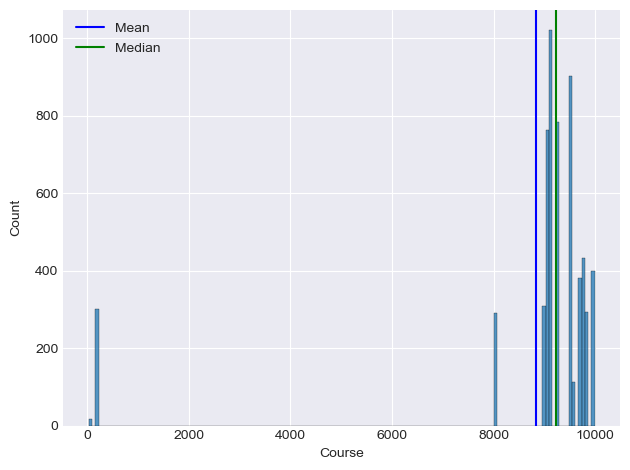

,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Previous qualification Bin,Mothers qualification Bin,Fathers qualification Bin,Marital Status Bin,Nationality Bin,Fathers occupation Bin,Mothers occupation Bin,Application mode Bin
1735,1,9070,1,120.0,120.0,0,0,0,1,1,0,21,0,2,7,10,6,13.428571,0,5,9,9,8,13.125000,0,16.2,0.3,-0.92,0,8,9,6,1,1,8,3,44
1086,1,9670,1,126.0,122.2,0,0,0,1,0,1,19,0,0,6,6,6,13.666667,0,0,6,9,6,13.666667,0,8.9,1.4,3.51,0,7,7,5,1,1,5,9,17
2168,2,9500,1,131.0,121.2,1,0,0,1,0,0,18,0,0,7,8,7,12.400000,0,0,8,9,8,12.800000,0,16.2,0.3,-0.92,0,7,7,9,1,1,2,3,18
3839,2,171,1,129.0,122.0,1,0,0,0,1,0,22,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,7.6,2.6,0.32,1,7,3,3,1,1,9,9,1
1422,3,9238,1,141.0,125.6,1,0,0,1,0,1,19,0,0,6,8,6,11.333333,0,0,6,6,6,11.833333,0,8.9,1.4,3.51,0,7,6,5,1,1,7,9,17
970,1,9670,1,130.0,114.8,0,0,0,1,1,0,25,0,0,5,5,4,13.750000,0,0,5,5,4,14.750000,0,7.6,2.6,0.32,0,7,1,1,1,1,0,0,43
3311,2,9085,1,156.0,150.9,1,0,0,1,0,0,18,0,0,6,8,6,16.000000,0,0,6,10,6,14.625000,0,11.1,0.6,2.02,1,7,7,7,1,1,7,3,1
3053,1,9085,1,137.0,122.3,0,0,0,1,0,1,19,0,0,5,5,5,12.600000,0,0,5,9,3,13.000000,0,7.6,2.6,0.32,1,7,5,6,1,1,90,0,17
946,1,9147,1,156.0,151.1,0,0,1,1,1,0,19,0,0,5,7,5,13.600000,0,0,5,11,5,12.833333,5,16.2,0.3,-0.92,0,7,9,6,1,1,3,3,1
1667,4,9500,1,145.0,130.0,1,0,0,1,0,0,18,0,0,8,8,8,13.761250,0,0,8,8,8,13.761250,0,9.4,-0.8,-3.12,0,7,9,6,1,1,5,1,1


In [85]:
sns.histplot(data['Course'])

# Include median and mean lines
plt.axvline(data['Course'].mean(), c='blue', label='Mean')
plt.axvline(data['Course'].median(), c='green', label='Median')
plt.legend()
    
plt.tight_layout()
plt.show()

data.sample(10)

#### From viewing the distribution of the Course column and seeing how the courses are mostly over 3%, I decided to keep this column as is.  Since we've decreased the cardinality of most of the other high cardinality columns at this point keeping all the distinct values for Course column will not widen the dataset so much when we do the one-hot encoding. 

#### The same goes for the next and last categorical column, Application order.  This one seems like an ordinal categorical numerical value.  Much like Age.  We will also keep this column as is.  

At this point we can move one to One-Hot Encoding.


###### End of Binning


<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 14. Course Variable](#14.-Course-Variable)

[proceed to next section: 16. Logistic Regression](#16.-Logistic-Regression)

## 15. One-Hot Encoding

Since now we have minimized the cardinality of most of the categorical columns we will convert all the categorical features into dummy variables.  

These columns are: 
- Marital Status 
- Application mode 
- Application order 
- Course 
- Previous qualification 
- Nationality
- Mother's qualification
- Father's qualification
- Mother's occupation
- Father's occupation


Because of the high cardinality (large number of unique values in each) of these columns it may not provide much predictive power in machine learning models and can lead to overfitting.   There are a few strategies to overcome this such as binning which we had done except for two columns (*Appilcation order* and *Cousre*).  But for now let's convert them to one-hot encoded features and see how it models. 

I'll do this in a loop.  But since these column names are long I'll create a dictionary containing these columns to convert and the prefix name to use. 


In [86]:
# check the current shape of data
data.shape

(6006, 37)

Create a list for all the columns to be set to dummy variables.   Then loop through the list the to address each column, setting the dummy variables and dropping one of the values.  Afterwards the original column will be dropped.   Display the shape after it all.

In [87]:
# Dictionary mapping column names to prefixes
column_prefixes = {'Marital Status Bin': 'Marital_', 
                   'Application mode Bin': 'AppMode_', 
                   'Application order': 'AppOrder_', 
                   'Course': 'Course_', 
                   'Previous qualification Bin': 'PrevQual_', 
                   'Nationality Bin': 'Nation_', 
                   'Mothers qualification Bin': 'MotherQual_', 
                   'Fathers qualification Bin': 'FatherQual_', 
                   'Mothers occupation Bin': 'MotherOcc_', 
                   'Fathers occupation Bin': 'FatherOcc_'}

# Loop through each column and perform one-hot encoding with the specified prefix
for column, prefix in column_prefixes.items():

     # Perform one-hot encoding
    one_hot_encoded_df = pd.get_dummies(data[column], prefix=prefix)

    # Drop one dummy variable (the one with the least frequency value)
    least_freq_dummy = one_hot_encoded_df.sum().idxmin()
    one_hot_encoded_df.drop(columns=[least_freq_dummy], inplace=True)
    
    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    data = pd.concat([data, one_hot_encoded_df], axis=1)

    # Drop the original categorical column
    data.drop(columns=[column], inplace=True)


    # check the shape of data now
data.shape

(6006, 105)

There are now 105 ~~245~~ features in the dataframe including the Target variable and 6006 instances.  From the prevoius sprint (Sprint 2) we didn't do any feature engineering with the columns and keep them all as is we applied the One-Hot encoding and that yielded 245 columns total on the new dataframe.  105 is not too much considering we kept the *Course* and *Application order* columns as is without binning.   Let's confirm the changes by looking at the data and then we can start modeling.

In [88]:
data.head()

,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Marital__1,Marital__2,Marital__4,AppMode__0,AppMode__1,AppMode__7,AppMode__17,AppMode__18,AppMode__39,AppMode__42,AppMode__43,AppMode__44,AppOrder__1,AppOrder__2,AppOrder__3,AppOrder__4,AppOrder__5,AppOrder__6,AppOrder__9,Course__171,Course__8014,Course__9003,Course__9070,Course__9085,Course__9119,Course__9130,Course__9147,Course__9238,Course__9254,Course__9500,Course__9556,Course__9670,Course__9773,Course__9853,Course__9991,PrevQual__6,PrevQual__7,PrevQual__8,PrevQual__9,Nation__1,MotherQual__1,MotherQual__2,MotherQual__3,MotherQual__5,MotherQual__6,MotherQual__7,MotherQual__8,MotherQual__9,FatherQual__1,FatherQual__2,FatherQual__3,FatherQual__5,FatherQual__6,FatherQual__7,FatherQual__8,FatherQual__9,MotherOcc__0,MotherOcc__1,MotherOcc__2,MotherOcc__3,MotherOcc__4,MotherOcc__5,MotherOcc__7,MotherOcc__9,MotherOcc__90,MotherOcc__200,FatherOcc__0,FatherOcc__1,FatherOcc__2,FatherOcc__3,FatherOcc__4,FatherOcc__5,FatherOcc__6,FatherOcc__7,FatherOcc__8,FatherOcc__9,FatherOcc__10,FatherOcc__200
1,1,160.0,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,1,122.0,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,0,100.0,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
5,0,133.1,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6,1,142.0,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0,True,Fa

<br>


[back to Table of Contents](#Table-of-Contents)

[back to previous section: 15. One-Hot Encoding](#15.-One-Hot-Encoding)

[proceed to next section: 17. PCA Dimension Reduction](#17.-PCA-Dimension-Reduction)

## Modeling
## 16. Logistic Regression

To get a baseline let's fit this into a logistic model. 

#### Target Data Split
Split the data between target and independent variables and then split between training and test data.

In [89]:
# Split the data between independent and dependent variables
X = data.drop('TargetEncoded', axis=1)  
y = data['TargetEncoded']
print('X shape', X.shape)
print('y shape', y.shape)

X shape (6006, 104)
y shape (6006,)


#### Train & Test Data Split
Split the data for training and testing.  Let's keep 25% for testing data size.

In [90]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Split the data into training and testing sets using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (4504, 104)
X_test:  (1502, 104)
y_train:  (4504,)
y_test:  (1502,)


Just a note: I reran this initial baseline logistic regression model here until the prediction and metrics evaluation a few times with just the difference in the test size.  I found that the accuracy score was better slightly at 25% instead of 20%.  I also tried to vary with it the choice of scaler type which I explain later on below.  The variance of the two makes a difference but again just slight.   I'll continue with 25% for most of this notebook but will find that going up to 30% is sometimes better.

In [91]:
print("Total Null Values: ", X_train.isna().sum().sum())

Total Null Values:  0


#### Scale the Data.

With logistic regression, always do a scaler.  We'll use Robust Scaler.

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Initialize the scaler
# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler = RobustScaler()

# Standardize the features (mean=0 and variance=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

I tried processing this basline model in these next set of code cells with different types of Scalers: Standard, MinMax and Robust.  With all the other parameters the same and the only difference being the scaler type, I found the Robust to be the highest scoreer (only slightly though) in accuracy for this model.

Set up the required libraries.

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, roc_auc_score

Create the model, fit it to the training scaled data and predict the target variables.

In [94]:
# Initialize and fit the logistic regression model
logregModel = LogisticRegression(random_state=42)
logregModel.fit(X_train_scaled, y_train)
# Predictions
y_pred = logregModel.predict(X_test_scaled)

Run some evaluation metrics on the prediction and trained model: accuracy score, classification, confusion, ROC and cross validation.

Accuracy: 86.8842
Train Accuracy: 87.611
Test Accuracy: 86.8842

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       771
           1       0.88      0.85      0.86       731

    accuracy                           0.87      1502
   macro avg       0.87      0.87      0.87      1502
weighted avg       0.87      0.87      0.87      1502

Cross-validation scores: [87.9  86.57 85.46 84.24 87.78]
Mean cross-validation score: 86.39
Precision scores: 88.142
Recall scores: 84.376
F1 scores: 86.218


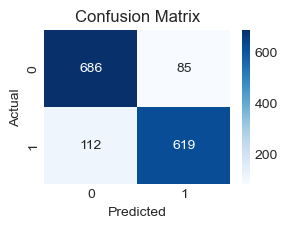

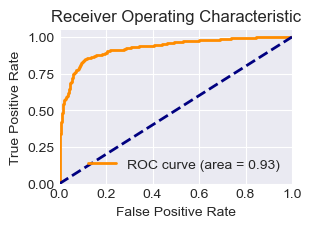

In [95]:
# Evaluate the model
# Print the classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_train = logregModel.score(X_train_scaled, y_train)
acc_test = logregModel.score(X_test_scaled, y_test)

# scores
print('Train Accuracy:', round(acc_train * 100, 4))
print('Test Accuracy:', round(acc_test * 100, 4))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(logregModel, X_train_scaled, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(logregModel, X_train_scaled, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(logregModel, X_train_scaled, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(logregModel, X_train_scaled, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logregModel.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Baseline Logistic Regrssion Model with Robust scaled 25% test data set.

Not bad with an accuracy of 86.88%.  The Recall, F1 and Precision between 0 and 1 are pretty close too so it's predicting both values pretty well.
An ROC curve area of .9293 is considered excellent (above .9) for overall performance of this classification model. The ideal place on this plot curve would be the least value for FPR (False Positive Rate) but highest TPR (True Positive Rate) so it would be right when the uptick of the plot starts to level off around .1.


<br>
<br>

#### Below was from Sprint 2 without binning any of the variables.
It's a slight improvement with binning, upsampling and scaling.

Accuracy: 84.8 <br>
Train Accuracy: 89.3 <br>
Test Accuracy: 85.8 <br>

Classification Report:
|      | precision | recall | f1-score | support |
|------|-----------|--------|----------|---------|
|   0  |    0.87   |  0.92  |   0.90   |   732   |
|   1  |    0.82   |  0.74  |   0.78   |   374   |
|------|-----------|--------|----------|---------|
|macro avg|   0.85  |  0.83  |   0.84   |  1106   |
|weighted avg| 0.86 |  0.86  |   0.86   |  1106   |

#### Model Evaluation Metrics Table
***Model Added: 1. Baseline Logistic Regression with Robust Scaler 30% Test Data***

| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|


<br>
<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 16. Logistic Regression](#16.-Logistic-Regression)

[proceed to next section: 18. K-Nearest Neighbors](#18.-K-Nearest-Neighbors)

## 17. PCA Dimension Reduction

Let's try to use PCA to reduce dimensionality.

We'll start with 98% for the components to retain 98% of the variance of the data.

In [96]:
from sklearn.decomposition import PCA

# Here, we set n_components to 0.95 to retain 95% of the variance in the data
ncomponent = 0.98
pca = PCA(n_components=ncomponent)

# Fit PCA on the scaled training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


Print out the shape of the data to confirm.

In [97]:
# Confirm the X PCA shape has decreased
print('N Component:', ncomponent)
print('X_train_scaled: ', X_train_scaled.shape)
print('X_test_scaled: ', X_test_scaled.shape)
print('X_train_pca: ', X_train_pca.shape)
print('X_test_pca: ', X_test_pca.shape)

N Component: 0.98
X_train_scaled:  (4504, 104)
X_test_scaled:  (1502, 104)
X_train_pca:  (4504, 63)
X_test_pca:  (1502, 63)


With 98% in components the number of features comes down to 63 ~~80~~ from 104.   Something to note, the reduced number of features from PCA varies depending on the type of scaler used.  Robust scaler tends to decrease features a lot more than Standard scaler even though the PCA component was the same. 

Let's run this through the logistic model: fit on training data, predict on test data and print out the evaluation metrics: accuracy score, classification, cross validation, and plot the confusion matrix and ROC graph.

Accuracy: 86.6178
Train Accuracy: 86.5897
Test Accuracy: 86.6178

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       771
           1       0.88      0.84      0.86       731

    accuracy                           0.87      1502
   macro avg       0.87      0.87      0.87      1502
weighted avg       0.87      0.87      0.87      1502

Cross-validation scores: [86.79 86.35 85.35 84.91 87.22]
Mean cross-validation score: 86.124
Precision scores: 88.006
Recall scores: 83.936
F1 scores: 85.916


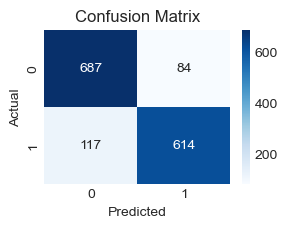

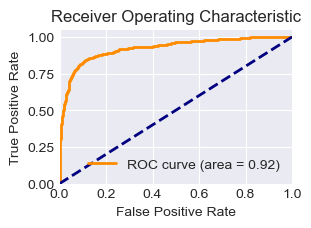

In [98]:
# Now apply the same logistic model to the reduced features
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Predit
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_train_pca = model.score(X_train_pca, y_train)
acc_test_pca = model.score(X_test_pca, y_test)

# scores
print('Train Accuracy:', round(acc_train_pca * 100, 4))
print('Test Accuracy:', round(acc_test_pca * 100, 4))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The accuracy improved slight up to 86.88 from 86.61.



#### Model Evaluation Metrics Table
***Model Added: 2. Baseline with 98% PCA***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|



<br>

Next let's try 95% PCA component.

Let's run this through the logistic model: fit on training data, predict on test data and print out the evaluation metrics: accuracy score, classification, cross validation, and plot the confusion matrix and ROC graph.

N Component: 0.95
X_train_scaled:  (4504, 104)
X_test_scaled:  (1502, 104)
X_train_pca:  (4504, 47)
X_test_pca:  (1502, 47)

Accuracy: 86.285
Train Accuracy: 86.2789
Test Accuracy: 86.285

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       771
           1       0.88      0.83      0.86       731

    accuracy                           0.86      1502
   macro avg       0.86      0.86      0.86      1502
weighted avg       0.86      0.86      0.86      1502

Cross-validation scores: [86.13 86.35 83.68 83.91 86.44]
Mean cross-validation score: 85.302
Precision scores: 87.568
Recall scores: 82.616
F1 scores: 85.014


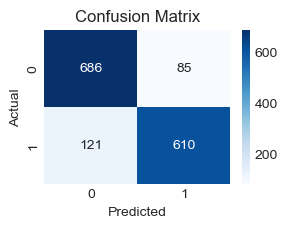

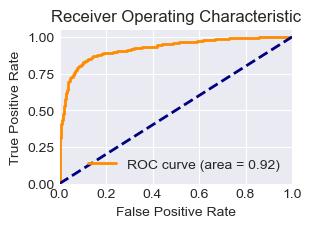

In [99]:

# Try n_components  0.95 to retain 95% of the variance in the data
ncomponent = 0.95
pca = PCA(n_components=ncomponent)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Confirm the X PCA shape has decreased
print('N Component:', ncomponent)
print('X_train_scaled: ', X_train_scaled.shape)
print('X_test_scaled: ', X_test_scaled.shape)
print('X_train_pca: ', X_train_pca.shape)
print('X_test_pca: ', X_test_pca.shape)

# Now apply the same logistic model to the reduced features
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Predit
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(accuracy * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_train_pca = model.score(X_train_pca, y_train)
acc_test_pca = model.score(X_test_pca, y_test)

# scores
print('Train Accuracy:', round(acc_train_pca * 100, 4))
print('Test Accuracy:', round(acc_test_pca * 100, 4))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Going from 98% to 95% PCA component, the accuracy decreased from 86.6178% to 86.0693%.


#### Model Evaluation Metrics Table
***Model Added: 3. Baseline with 95% PCA***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.0693 | 87.8553 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|


<br>

Let's see if going further to 93% will continue to decrease accuracy. If so we'll end it here and settle with 98% as the winner.

Same drill. Run this through the logistic model: fit on training data, predict on test data and print out the evaluation metrics: accuracy score, classification, cross validation, and plot the confusion matrix and ROC graph.

N Component: 0.93
X_train_scaled:  (4504, 104)
X_test_scaled:  (1502, 104)
X_train_pca:  (4504, 39)
X_test_pca:  (1502, 39)

Accuracy: 85.8189
Train Accuracy: 85.857
Test Accuracy: 85.8189

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       771
           1       0.87      0.83      0.85       731

    accuracy                           0.86      1502
   macro avg       0.86      0.86      0.86      1502
weighted avg       0.86      0.86      0.86      1502

Cross-validation scores: [86.35 85.46 83.91 84.24 86.22]
Mean cross-validation score: 85.236
Precision scores: 88.052
Recall scores: 81.868
F1 scores: 84.836


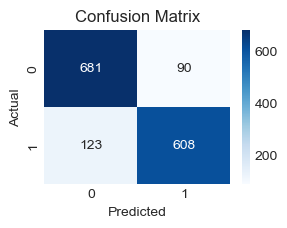

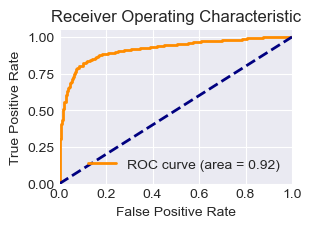

In [100]:

# Try n_components  0.93 to retain 93% of the variance in the data
ncomponent = 0.93
pca = PCA(n_components=ncomponent)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Confirm the X PCA shape has decreased
print('N Component:', ncomponent)
print('X_train_scaled: ', X_train_scaled.shape)
print('X_test_scaled: ', X_test_scaled.shape)
print('X_train_pca: ', X_train_pca.shape)
print('X_test_pca: ', X_test_pca.shape)

# Now apply the same logistic model to the reduced features
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Predit
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(accuracy * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_train_pca = model.score(X_train_pca, y_train)
acc_test_pca = model.score(X_test_pca, y_test)

# scores
print('Train Accuracy:', round(acc_train_pca * 100, 4))
print('Test Accuracy:', round(acc_test_pca * 100, 4))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


|            | Accuracy | Train Score 
|------------|-------------|------------|
| Base Logistic  |    86.8842   |  87.61 |
| PCA 98%   |  86.61 |  86.58   |
| PCA 95%    |   86.06    |   87.85    |
| PCA 93%    |   85.81   |   85.857  |


93% PCA is less than 95% as well.

So far we find that applying PCA wasn't an improvement.  The base initial logistic regression model  using a Robust scaler and splitting test data size at 25% seems to be best scoring. 





#### Model Evaluation Metrics Table
***Model Added: 4. Baseline with 93% PCA***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.0693 | 87.8553 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|
| 4 | Baseline with 93% PCA  | 85.8189 | 85.857 | 85 | 87 | 88 | 83 | 87 | 86 | 85.236 | 88.052 | 81.868 | 84.836 |  0.92 |




#### Plot Learning and Validation Curve for Logistics Regression


<br>

[back to Table of Contents](#Table-of-Contents)

### Learning and Validation Curves


Learning and validation curves help diagnose the behavior of a model during training. These curves help us understanding how well a model generalizes to new data and are essential for tuning model parameters and avoiding problems like overfitting or underfitting.

#### Learning Curve with Logistic Regression
Let's use this on our highest scoring model which is the logistic regression with robust scaler and PCA.  

In [101]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Let's plot a learning curve using the ShuffleSplit as a cross-validation strategy.

In [102]:

# Create cross-validation training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), 
                                                        X_train_pca, 
                                                        y_train,
                                                        cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(.1, 1.0, 5))


Plot the learning curve below.

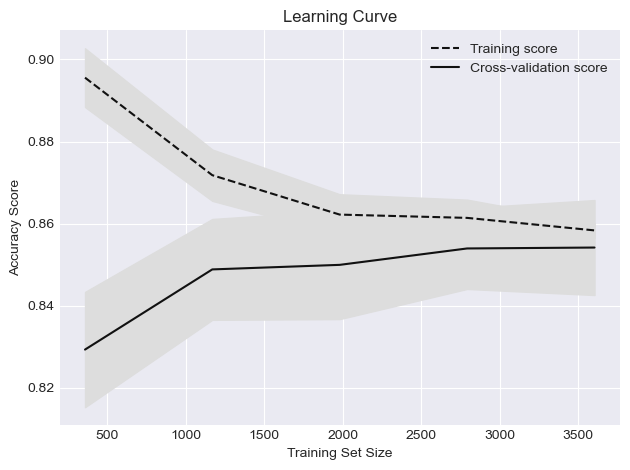

In [103]:

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


This learning curve shows the progression of how well the model is working as the training data size increases.  It shows that the training score started out well on the left side telling us that the model is good at fitting smaller sized data. But the decreasing training score as the data size increases indicates that it has a harder time with growing data probably due to the larger diversity of the data as it increases.

The solid cross-validation shows the opposite effect.  It starts with a low accuracy score with a small data because it has yet to learn on data it has yet to see. But the model is learning and generalizing better with more data.  It tapers off at a certain point suggesting a diminishing return on accuracy from adding more data.   

The convergence of the two lines between the training score and cross-validation score tells us that adding more data is helping the model generalize better, but there may be a limit to the benefits of adding more training data.

The existence of the generalization gap between the two lines on the right side might mean that the model might be overfitting to the training data. But the fact that it's converging is good sign at learning the data.  The overfitting potential could be remedied by adding  regularization or more feature engineering. The gap does seem to be closing in so the overfitting is not an issue.


#### Validation Curve for Logistic Regression

A validation curve is similar to learning curves in that it gives us an idea of how well the model is performing.  But instead of the training data size variation it uses a variation of values for a specific hyperparameter.  For example, C parameter in logistic regression, the n_estimators in a random forest or max_depth in a decision tree.  It's used to find the best value for a parameter.

Let's create a function to plot the validation curve so it may be reused later for the other models. 

In [104]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, title, X, y, param_name, param_range, 
                          cv=None, scoring="accuracy", n_jobs=None):
    """
    Plots a validation curve for a specified parameter of an estimator.

    :param estimator: The model (classifier or regressor).
    :param title: Title for the chart.
    :param X: Input features.
    :param y: Target variable.
    :param param_name: The name of the parameter to vary.
    :param param_range: The range of values for the parameter.
    :param cv: Number of cross-validation folds.
    :param scoring: Scoring method to evaluate the predictions on the test set.
    :param n_jobs: Number of jobs to run in parallel.
    """
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=2)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color="darkorange",
                     alpha=0.2)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=2)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color="navy", alpha=0.2)
    plt.legend(loc="best")
    plt.show()


Now pass in the logistic model to plot the validation curve.

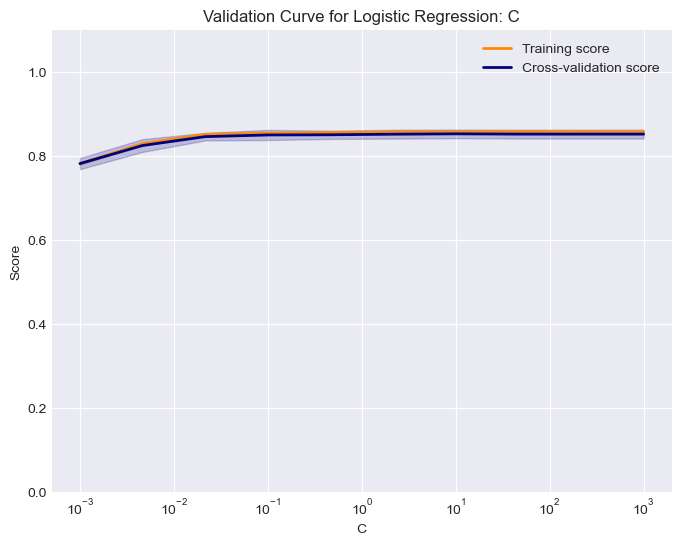

In [105]:
# Logistic Regression model
model = LogisticRegression(solver='liblinear')  # solver specified for small datasets and binary classification

# Parameter range (inverse of regularization strength; smaller values specify stronger regularization)
param_range = np.logspace(-3, 3, 10)

# Plotting the validation curve
plot_validation_curve(model, "Validation Curve for Logistic Regression: C",
                      X_train_pca, y_train, param_name='C', param_range=param_range, cv=5, scoring="accuracy")


Wow the 2 lines are pretty much right on point with each other.  Since the training and cross-validation scores are close across the range of 𝐶 C values, the model generalizes well without significant overfitting or underfitting. This is evidenced by the lack of a large gap between the training and cross-validation lines.


<br>

<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 17. PCA Dimension Reduction](#17.-PCA-Dimension-Reduction)

[proceed to next section: 19. Random Forest](#19.-Random-Forest)

## 18. K-Nearest Neighbors
Using previously scaled (Robust) test data with PCA, let's apply KNN model with 5 neighbors.


In [106]:
from sklearn.neighbors import KNeighborsClassifier

In the block of code below, we will fit and predict a KNN model just like we did previously with Logistic Regression.  Once we get a y data prediction we will evaluate the accuracy using Accuracy Score for both training and testing data, print a classification report, and confusion matrix. 

We used PCA data at 98% in this sample.

KNN on PCA component data:  0.98
Accuracy: 79.9601
Train Accuracy: 87.944
Test Accuracy: 79.9601

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       771
           1       0.78      0.82      0.80       731

    accuracy                           0.80      1502
   macro avg       0.80      0.80      0.80      1502
weighted avg       0.80      0.80      0.80      1502

Cross-validation scores: [80.13 78.47 79.69 80.24 78.33]
Mean cross-validation score: 79.372
Precision scores: 80.856
Recall scores: 77.462
F1 scores: 79.106


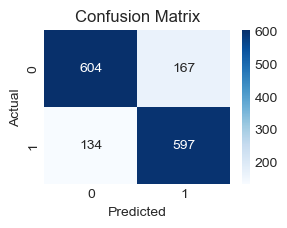

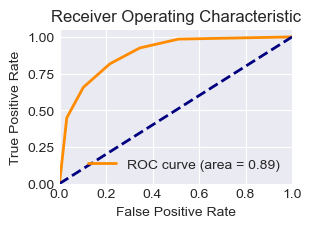

In [107]:
ncomponent = 0.98
pca = PCA(n_components=ncomponent)

# Fit PCA on the scaled training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
#fit the model on training data
knn.fit(X_train_pca, y_train)
# Predict on test data
y_pred = knn.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('KNN on PCA component data: ',ncomponent)
print("Accuracy:", round(accuracy * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_train_knn = knn.score(X_train_pca, y_train)
acc_test_knn = knn.score(X_test_pca, y_test)

# scores
print('Train Accuracy:', round(acc_train_knn * 100, 4))
print('Test Accuracy:', round(acc_test_knn * 100, 4))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test_pca)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

KNN with Robust scaler and PCA 98% gives an accuracy of 79.96.%.





#### Model Evaluation Metrics Table
***Model Added: 5. KNN k=5 with 98% PCA***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.0693 | 87.8553 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|
| 4 | Baseline with 93% PCA  | 85.8189 | 85.857 | 85 | 87 | 88 | 83 | 87 | 86 | 85.236 | 88.052 | 81.868 | 84.836 |  0.92 |
| 5 | KNN k=5 with 98% PCA  | 79.9601 | 87.944 | 82 | 78 | 78 | 82 | 80 | 80 | 79.372 | 80.856 | 77.462 | 79.106 | 0.89



<br>
<br>


Let's try PCA 95% and 93%.   Same process below as previous: fit, predict, evaluate with various metrics for accuracy score on testing and training data and print the classification report and confusion matrix.

KNN on PCA component data:  0.95
Accuracy: 79.9601
Train Accuracy: 88.2327
Test Accuracy: 79.9601

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       771
           1       0.79      0.81      0.80       731

    accuracy                           0.80      1502
   macro avg       0.80      0.80      0.80      1502
weighted avg       0.80      0.80      0.80      1502

Cross-validation scores: [79.69 78.36 79.36 80.13 79.  ]
Mean cross-validation score: 79.308
Precision scores: 80.99
Recall scores: 77.066
F1 scores: 78.974


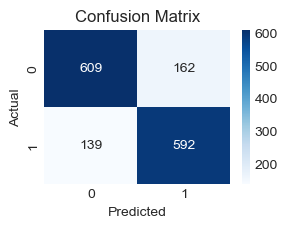

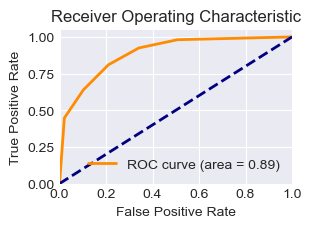

In [108]:
ncomponent = 0.95
pca = PCA(n_components=ncomponent)

# Fit PCA on the scaled training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
#fit the model on training data
knn.fit(X_train_pca, y_train)
# Predict on test data
y_pred = knn.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('KNN on PCA component data: ',ncomponent)
print("Accuracy:", round(accuracy * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_train_knn = knn.score(X_train_pca, y_train)
acc_test_knn = knn.score(X_test_pca, y_test)

# scores
print('Train Accuracy:', round(acc_train_knn * 100, 4))
print('Test Accuracy:', round(acc_test_knn * 100, 4))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test_pca)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Not an improvement from 98% PCA. 




#### Model Evaluation Metrics Table
***Model Added: 6. KNN k=5 with 95% PCA***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.0693 | 87.8553 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|
| 4 | Baseline with 93% PCA  | 85.8189 | 85.857 | 85 | 87 | 88 | 83 | 87 | 86 | 85.236 | 88.052 | 81.868 | 84.836 |  0.92 |
| 5 | KNN k=5 with 98% PCA  | 79.9601 | 87.944 | 82 | 78 | 78 | 82 | 80 | 80 | 79.372 | 80.856 | 77.462 | 79.106 | 0.89|
| 6 | KNN k=5 with 95% PCA  | 79.9601 | 88.2327 | 81 | 79 | 79 | 81 | 80 | 80 | 79.308 | 80.99 | 77.066 | 78.974 | 0.89|





Now try 93%.

Same process below as previous: fit, predict, evaluate with various metrics for accuracy score on testing and training data and print the classification report and confusion matrix.


KNN on PCA component data:  0.93
Accuracy: 79.8269
Train Accuracy: 87.9218
Test Accuracy: 79.8269

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       771
           1       0.78      0.82      0.80       731

    accuracy                           0.80      1502
   macro avg       0.80      0.80      0.80      1502
weighted avg       0.80      0.80      0.80      1502

Cross-validation scores: [81.02 78.25 79.02 79.91 77.89]
Mean cross-validation score: 79.218
Precision scores: 80.88
Recall scores: 77.022
F1 scores: 78.896


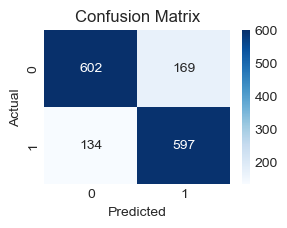

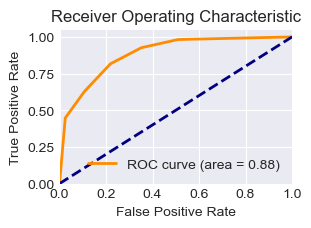

In [109]:
ncomponent = 0.93
pca = PCA(n_components=ncomponent)

# Fit PCA on the scaled training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
#fit the model on training data
knn.fit(X_train_pca, y_train)
# Predict on test data
y_pred = knn.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('KNN on PCA component data: ',ncomponent)
print("Accuracy:", round(accuracy * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_train_knn = knn.score(X_train_pca, y_train)
acc_test_knn = knn.score(X_test_pca, y_test)

# scores
print('Train Accuracy:', round(acc_train_knn * 100, 4))
print('Test Accuracy:', round(acc_test_knn * 100, 4))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test_pca)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Decreasing the PCA component did not show any improvement.  So far the best scoring one is the baseline model Logistic Regression with Robust scaling at 25% test data.

#### Model Evaluation Metrics Table
***Model Added: 7. KNN k=5 with 93% PCA***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.0693 | 87.8553 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|
| 4 | Baseline with 93% PCA  | 85.8189 | 85.857 | 85 | 87 | 88 | 83 | 87 | 86 | 85.236 | 88.052 | 81.868 | 84.836 |  0.92 |
| 5 | KNN k=5 with 98% PCA k=5 | 79.9601 | 87.944 | 82 | 78 | 78 | 82 | 80 | 80 | 79.372 | 80.856 | 77.462 | 79.106 | 0.89|
| 6 | KNN k=5 with 95% PCA k=5 | 79.9601 | 88.2327 | 81 | 79 | 79 | 81 | 80 | 80 | 79.308 | 80.99 | 77.066 | 78.974 | 0.89|
| 7 | KNN k=5 with 93% PCA k=5 | 79.8269 | 87.9218 | 82 | 78 | 78 | 82 | 80 | 80 | 79.218 | 80.88 | 77.022 | 78.896 | 0.88|






Let's try to find the right K neighbors value.  

First we will  reset the training and test data for both the scaled and PCA variables to avoid any changes made. 
Then we'll loop from 1-40 for k neighbors value and find the smallest mean error for the ideal k value.  We'll do it twice to run against PCA data and then just scaled data.

Since from the previous scores for KNN, .98 PCA gave the best score so we'll use .98 below.

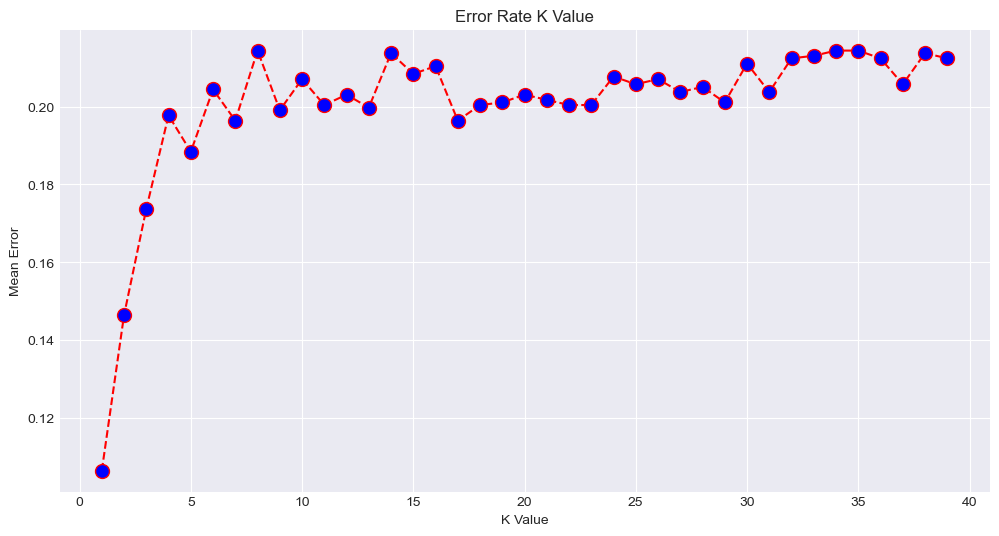

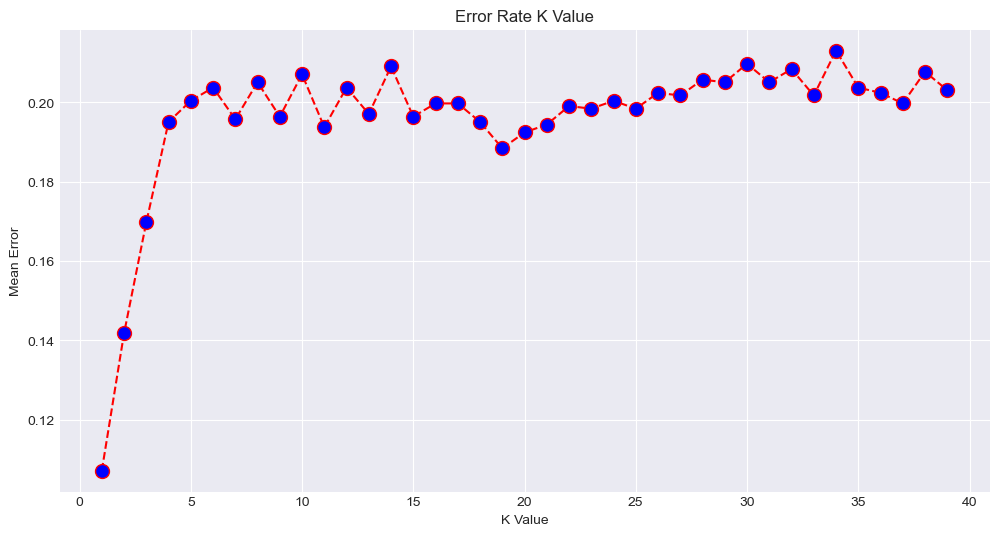

In [110]:
# Split the data into training and testing sets using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = RobustScaler()

# Standardize the features (mean=0 and variance=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ncomponent = 0.98
pca = PCA(n_components=ncomponent)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


errors = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    errors.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), errors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


errors = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca, y_train)
    pred_i = knn.predict(X_test_pca)
    errors.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), errors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


Looks like having the k value of 51 has the lowest error for both training data (Robust scaled and PCA). Let's use a pipeline to accomplish all 3 steps, scaling, applying PCA (98%) and then KNN (k neighbors = 5).  Then evaluate using Accuracy score and classification report. **


I will run the pipeline code below with k=1 and .93 PCA. 

Accuracy:  89.281
Train Accuracy: 100.0
Test Accuracy: 89.281
KNN Classification report:                precision    recall  f1-score   support

           0       0.93      0.85      0.89       771
           1       0.86      0.94      0.89       731

    accuracy                           0.89      1502
   macro avg       0.90      0.89      0.89      1502
weighted avg       0.90      0.89      0.89      1502

Cross-validation scores: [79.58 78.47 75.58 78.47 77.33]
Mean cross-validation score: 77.886
Precision scores: 84.702
Recall scores: 68.616
F1 scores: 75.798


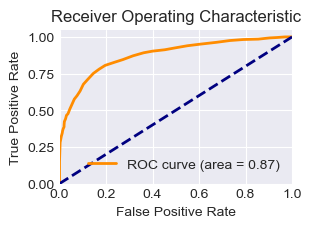

In [111]:

from sklearn.pipeline import Pipeline
# Create a pipeline that does PCA first then applies KNN
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=.98)),
    ('knn', KNeighborsClassifier(n_neighbors=1))
])

pipeline.fit(X_train, y_train)

# Predicting
y_pred = pipeline.predict(X_test)

# score the model accuracy scores and store in variables for display later
knn_pca_pipl_train = pipeline.score(X_train, y_train)
knn_pca_pipl_test = pipeline.score(X_test, y_test)

# Evaluation
print('Accuracy: ', round(accuracy_score(y_test, y_pred) * 100, 4))
# scores
print('Train Accuracy:', round(knn_pca_pipl_train * 100, 4))
print('Test Accuracy:', round(knn_pca_pipl_test * 100, 4))
print('KNN Classification report: ', classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test_pca)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Wow this is a new high scoring record.  Since identifying the best k value being 1 and plotting that out, we are getting a better result with 89.281 accuracy.  Even better than our highest score with the baseline.  The ROC curve area is not excellent (above .9) but good at .87.



#### Model Evaluation Metrics Table
***Model Added: 8. KNN k=1 with 98% PCA***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.0693 | 87.8553 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|
| 4 | Baseline with 93% PCA  | 85.8189 | 85.857 | 85 | 87 | 88 | 83 | 87 | 86 | 85.236 | 88.052 | 81.868 | 84.836 |  0.92 |
| 5 | KNN k=5 with 98% PCA k=5 | 79.9601 | 87.944 | 82 | 78 | 78 | 82 | 80 | 80 | 79.372 | 80.856 | 77.462 | 79.106 | 0.89|
| 6 | KNN k=5 with 95% PCA k=5 | 79.9601 | 88.2327 | 81 | 79 | 79 | 81 | 80 | 80 | 79.308 | 80.99 | 77.066 | 78.974 | 0.89|
| 7 | KNN k=5 with 93% PCA k=5 | 79.8269 | 87.9218 | 82 | 78 | 78 | 82 | 80 | 80 | 79.218 | 80.88 | 77.022 | 78.896 | 0.88|
| 8 | KNN k=1 with 98% PCA k=5 | 89.281 | 100.0 | 93 | 86 | 85 | 94 | 89 | 89 | 77.886 | 84.702 | 68.616 | 75.798 | 0.87 |


<br>
<br>



<br>
<br>

Now let's plot a learning and validation curve for KNN.

#### Learning Curve for KNN

This time we will create a function to plot the learning curve like we did with the previous validation curve plot for Logistic Regression.  We'll be using this again later for the other models as well.  

Define the learning curve plot function below.

In [112]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

One thing to note, Logistic and KNN models should use scalers so this is why I'm passing in the X_train_pca variable instead of the X_train.   X_train_pca has the Robust scaler and PCA applied to it.

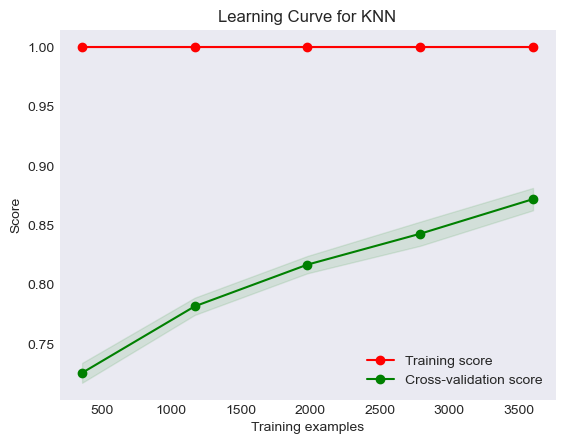

In [113]:
knn = KNeighborsClassifier(n_neighbors=1)
plot_learning_curve(knn, "Learning Curve for KNN", X_train_pca, y_train, cv=5)
plt.show()

This learning curve shows a consistently high training line which indicates that the model fits the training data well. But the noticeable gap between the training and cross-validation scores suggests that the model may be overfitting the training data. The wider shading on the cross validation green line suggestion a high variability on how the model performs on unseen data.  This shows that there can definitely be improvements on the model to get a better plot, perhaps further feature engineering by removing irrelevant features.  We know already that increasing the k neighbors value will not improve due to the higher error rate.


Now plot a validation curve for KNN.

#### Validation Curve for KNN

Using the prevoius Validation Curve plot function above let's pass in KNN information to plot for KNN. Keep in mind that I will use X_train_pca again.

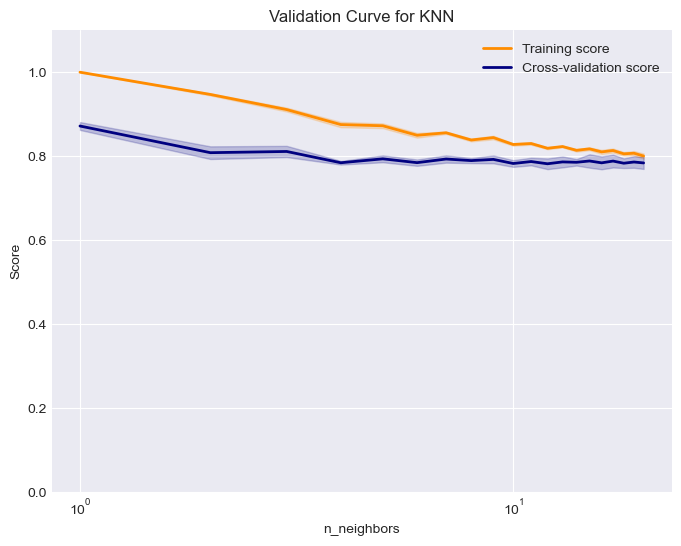

In [114]:
# KNN model
model_knn = KNeighborsClassifier()
param_name_knn = 'n_neighbors'
param_range_knn = np.arange(1, 21)  # Checking values from 1 to 20

# Plotting the validation curve
plot_validation_curve(model_knn, "Validation Curve for KNN", X_train_pca, y_train,
                      param_name=param_name_knn, param_range=param_range_knn, cv=5)


This plot suggest that there might be an underfitting on the model as shown with the convergence at a lower score. As we've seen before when trying different k neighbors value, the training score is high on low k neighbors but the score decreases as the neighbor count increases suggesting the model becomes less flexible and is less able to perfectly fit the training data.  The cross-validation score is also decreasing indicating the lower neighbors value is a better fit.


##### End of KNN Model

Let's try Random Forest.

<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 18. K-Nearest Neighbors](#18.-K-Nearest-Neighbors)

[proceed to next section: 20. Decision Tree](#20.-Decision-Tree)

## 19. Random Forest

With Random forest, scaling is not necessary since it is a tree-based model and does not require feature scaling to perform well since it does not utilize distance measures like KNN or logistic regression. 

In [115]:
from sklearn.ensemble import RandomForestClassifier

Let's resplit the train and testing data using 30% testing data size.

In [116]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Initialize a random forest model and fit it to the training data.

In [117]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Next run a prediction for y values.  Print the accuracy score for test and training data and print the classification report, confusion matrix and ROC/AUC curve.

Accuracy: 93.8402
Train Accuracy: 100.0
Test Accuracy: 93.8402
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       939
           1       0.92      0.95      0.94       863

    accuracy                           0.94      1802
   macro avg       0.94      0.94      0.94      1802
weighted avg       0.94      0.94      0.94      1802

Cross-validation scores: [93.46 93.34 91.32 92.75 93.93]
Mean cross-validation score: 92.96
Precision scores: 92.306
Recall scores: 94.02
F1 scores: 93.15


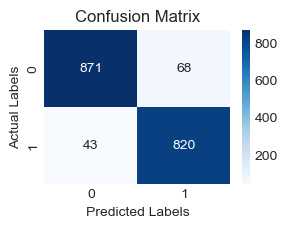

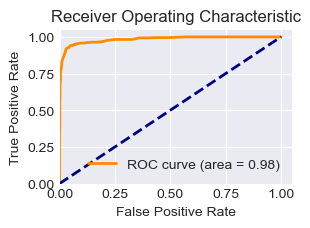

In [118]:
# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

# Print accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_rf_train = rf_classifier.score(X_train, y_train)
acc_rf_test = rf_classifier.score(X_test, y_test)

# scores
print('Train Accuracy:', round(acc_rf_train * 100, 4))
print('Test Accuracy:', round(acc_rf_test * 100, 4))

# Classification report
print(classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Random Forest is a big jump in accuracy than the previous models we've done with our baseline, PCA or KNN.  Although 100% training accuracy is a great score, I wonder if it's overfitting it.  The ROC curve area being above .9 at .98 is excellent too. 


#### Model Evaluation Metrics Table
***Model Added: 9. Random Forest with estimator 100***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.0693 | 87.8553 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|
| 4 | Baseline with 93% PCA  | 85.8189 | 85.857 | 85 | 87 | 88 | 83 | 87 | 86 | 85.236 | 88.052 | 81.868 | 84.836 |  0.92 |
| 5 | KNN k=5 with 98% PCA k=5 | 79.9601 | 87.944 | 82 | 78 | 78 | 82 | 80 | 80 | 79.372 | 80.856 | 77.462 | 79.106 | 0.89|
| 6 | KNN k=5 with 95% PCA k=5 | 79.9601 | 88.2327 | 81 | 79 | 79 | 81 | 80 | 80 | 79.308 | 80.99 | 77.066 | 78.974 | 0.89|
| 7 | KNN k=5 with 93% PCA k=5 | 79.8269 | 87.9218 | 82 | 78 | 78 | 82 | 80 | 80 | 79.218 | 80.88 | 77.022 | 78.896 | 0.88|
| 8 | KNN k=1 with 98% PCA k=5 | 89.281 | 100.0 | 93 | 86 | 85 | 94 | 89 | 89 | 77.886 | 84.702 | 68.616 | 75.798 | 0.87 |
| 9 | Random Forest estimator=100  | 93.8402 | 100.0 | 95 | 92 | 93 | 95 | 94 | 94 | 92.96 | 92.306 | 94.02 | 93.15 | 0.98 |

<br>
<br>

Let's see if we can hyperparameter tune this using GridSearch and tuning n_estimator, max_features, max_depth and criterion.


In [119]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10],
    'criterion' :['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit GridSearch to the training data
grid_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", round(grid_search.best_score_ * 100, 4))


Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
Best score found:  88.654


Using hyperparameter tunning it gae us the best parameters that will give the best score.  And that's using 300 for n_estimators, sqrt max features, 10 for max depth and gini criterion.  But even with this the best score it gives is 88.65% accuracy which still doesn't top our the initial fitting of random forest with n_estimator = 100 giving a score of 93.84. 

Let's plot learning and validation curves for Random Forest.

#### Learning Curve for Random Forest

Let's reuse that learning curve plot.

Here we will just use the training data X_train and y_train instead of the scaled or pca training data.  Random Forest does not need scaling of data.

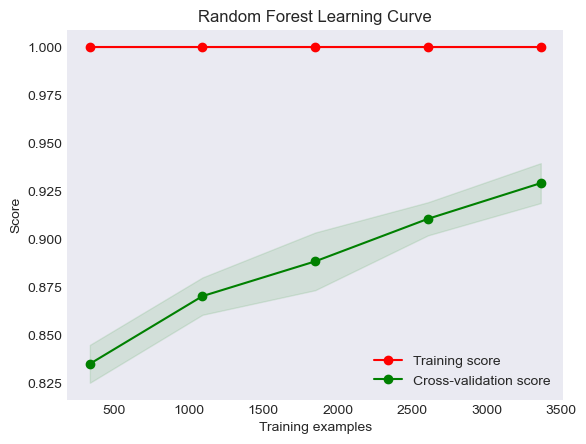

In [120]:
model = RandomForestClassifier(n_estimators=100)
plot_learning_curve(model, "Random Forest Learning Curve", X_train, y_train, cv=5)
plt.show()

This Random Forest model is able to almost perfectly fit the training data, capturing the underlying patterns effectively with the training score consistently high (at 100%) regardless of training size. The cross validation score behaves as expected, increasing with more training data. The wide gap beween the two suggest an overfitting issue but it shows how it's sharply converging towards a higher score.  A remedy might be to expose the model to a more varied data and reduce irrelevant features.  


Now let's look at the validation curve. 

#### Validation Curve for Random Forest

Using again the validation curve plotting function from earlier and passing in training data without scaling or pca.

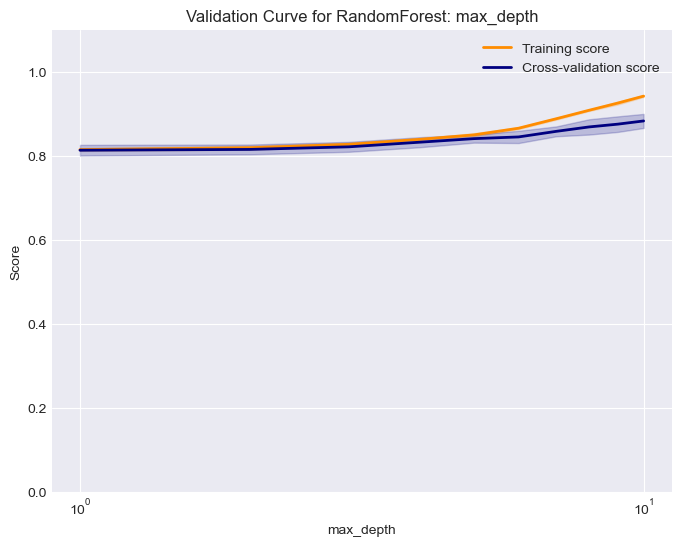

In [121]:
# Example data setup
X, y = np.random.rand(100, 10), np.random.randint(0, 2, 100)

# Example model setup
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the parameter range
param_range = np.arange(1, 11)  # Max depths from 1 to 10

# Plot the validation curve
plot_validation_curve(model, "Validation Curve for RandomForest: max_depth",
                      X_train, y_train, param_name="max_depth", param_range=param_range, cv=5)


The divergence towards the end of the plot as the max_depth increases suggests an overfitting at high depths.  The ideal max_depth seems to be slightly beyond the 75th percent area of the range perhaps around max_depth of 6-8.

#### End of Random Forest

Let's move on and try Decision Tree model.

<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 19. Random Forest](#19.-Random-Forest)

[proceed to next section: 21. Gradient Boosting Classifier](#21.-Gradient-Boosting-Classifier)

## 20. Decision Tree

No scaling is necessary for Decision Tree models because Decision Trees do not rely on distance calculations between features. They work by making splits based on feature values, and scaling does not influence the ability of the tree to partition data.

PCA is not necessary also since it would obscure the tracing ability of the features becasue the new features from PCA are linear combinations of the original features. 

Resplit the data for trainin keeping it at 30% testing size.


Reset the X, y, train and test data variables.

In [122]:
X = data.drop('TargetEncoded', axis=1)  
y = data['TargetEncoded']
print('X shape', X.shape)
print('y shape', y.shape)
# Split the data into training and testing sets using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X shape (6006, 104)
y shape (6006,)


Fit the model on the training data.

In [123]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Predict the target values and display the evaluation metrics. 

Accuracy: 89.3452
Train Accuracy: 100.0
Test Accuracy: 89.3452
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       939
           1       0.85      0.94      0.89       863

    accuracy                           0.89      1802
   macro avg       0.90      0.90      0.89      1802
weighted avg       0.90      0.89      0.89      1802

Cross-validation scores: [85.02 87.99 86.44 88.82 86.67]
Mean cross-validation score: 86.988
Precision scores: 84.126
Recall scores: 91.822
F1 scores: 87.79


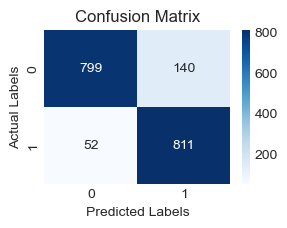

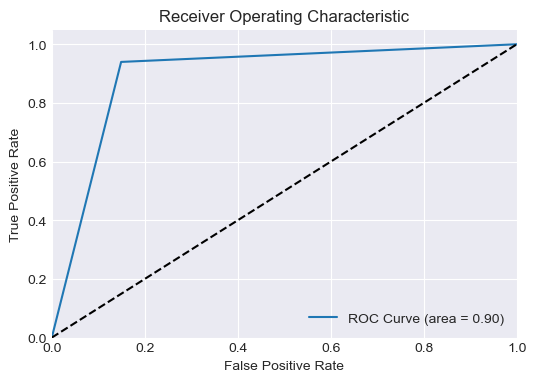

In [124]:
# Predict on the testing set
y_pred = tree_model.predict(X_test)

# Print accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_dtree_train = tree_model.score(X_train, y_train)
acc_dtree_test = tree_model.score(X_test, y_test)

# scores
print('Train Accuracy:', round(acc_dtree_train * 100, 4))
print('Test Accuracy:', round(acc_dtree_test * 100, 4))

# Classification report
print(classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_prob = tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4)) 
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

100% training accuracy is great but testing accuracy of 89.3452% still does not top the Random Forest score.  THe sharp rise in the ROC graph indicates that the model has a very good measure of separability between the positive and negative classes. 



#### Model Evaluation Metrics Table
***Model Added: 10. Decision Tree***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.0693 | 87.8553 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|
| 4 | Baseline with 93% PCA  | 85.8189 | 85.857 | 85 | 87 | 88 | 83 | 87 | 86 | 85.236 | 88.052 | 81.868 | 84.836 |  0.92 |
| 5 | KNN k=5 with 98% PCA k=5 | 79.9601 | 87.944 | 82 | 78 | 78 | 82 | 80 | 80 | 79.372 | 80.856 | 77.462 | 79.106 | 0.89|
| 6 | KNN k=5 with 95% PCA k=5 | 79.9601 | 88.2327 | 81 | 79 | 79 | 81 | 80 | 80 | 79.308 | 80.99 | 77.066 | 78.974 | 0.89|
| 7 | KNN k=5 with 93% PCA k=5 | 79.8269 | 87.9218 | 82 | 78 | 78 | 82 | 80 | 80 | 79.218 | 80.88 | 77.022 | 78.896 | 0.88|
| 8 | KNN k=1 with 98% PCA k=5 | 89.281 | 100.0 | 93 | 86 | 85 | 94 | 89 | 89 | 77.886 | 84.702 | 68.616 | 75.798 | 0.87 |
| 9 | Random Forest estimator=100  | 93.8402 | 100.0 | 95 | 92 | 93 | 95 | 94 | 94 | 92.96 | 92.306 | 94.02 | 93.15 | 0.98 |
| 10 | Decision Tree  | 89.3452 | 100.0 | 94 | 85 | 85 | 94 | 89 | 89 | 86.988 | 84.126 | 91.822 | 87.79 | 0.90|



<br>
<br>

Let's try some hyperparameter tunning.

In [125]:
# Set up the parameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for finding the best parameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_ * 100))


Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 87.87


This hyperparameter tuning gave the best score of 87.87% having entropy for criterion, None for max_depth, 1 min leaf sample, 2 min samples split.   But the best score is still lower than our initial score with decision tree at 89.3452.

Let's plot learning and validation curve for Decision Tree model.

#### Learning Curve for Decision Tree


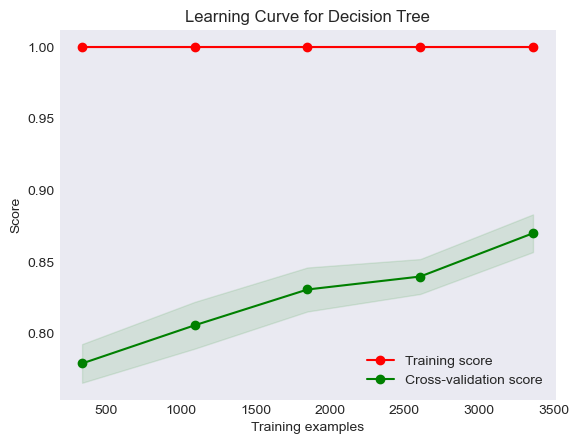

In [126]:
decision_tree = DecisionTreeClassifier(random_state=42)
plot_learning_curve(decision_tree, "Learning Curve for Decision Tree", X_train, y_train, cv=5)
plt.show()


The convergence is a good sign but the wide gap is an issue here.  The training did well here.  Adjusting the max depth gave the best result with None as the hyperparameter tuning proved.  

Let's plot the validation curve for Decision Tree now.


<br>

[back to Table of Contents](#Table-of-Contents)

#### Validation Curve with Decision Tree



Let's plot one using Decisiont Tree since we hyperparameterized it in one of our analysis. 


In [127]:
from sklearn.model_selection import validation_curve

# Range of values for the hyperparameter 'max_depth'
param_range = np.arange(1, 20)

# Calculate accuracy on training and test set using different values of max_depth
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(),
    X,
    y,
    param_name="max_depth",
    param_range=param_range,
    cv=10,  # 10-fold cross-validation
    scoring="accuracy",
    n_jobs=-1
)


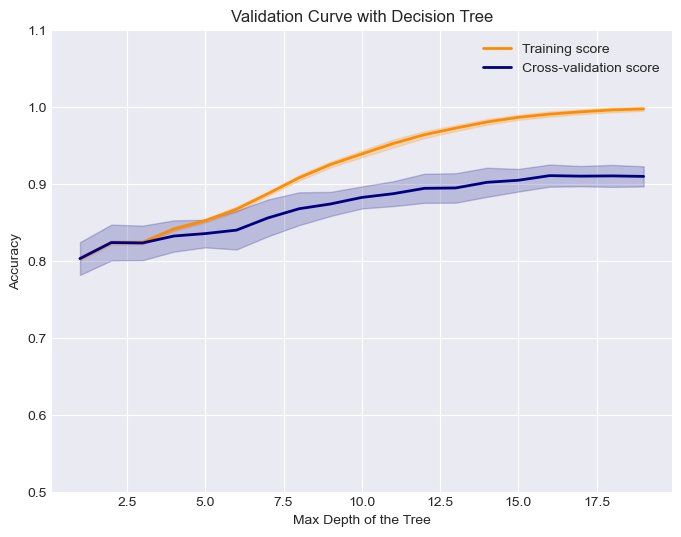

In [128]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth of the Tree")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)  # Extend the y axis for better visualization

# Plot training scores
plt.plot(param_range, train_mean, label="Training score",
         color="darkorange", lw=2)
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="darkorange", alpha=0.2)

# Plot cross-validation scores
plt.plot(param_range, test_mean, label="Cross-validation score",
         color="navy", lw=2)
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="navy", alpha=0.2)

plt.legend(loc="best")
plt.show()


This Decision Tree validation curve plot shows how changes in the max dept hyperparameter affects the model's accuracy both on the training set (orange line) and on the cross-validation set (blue line).

The training score performs better as the maximum depth of the tree increases.  The model becomes more capable of learning complex patterns in the training data, which generally increases accuracy on the training set. This curve keeps increasing with slight platueaing telling us that the modes becomes better fitted to the training data as complexity grows. This is indicative of the 100% accuracy on the training accuracy score we observed when running the Decision Tree model.

For Cross-validtion score line the increasing gap between the lines proves it might be overfitting with higher depths.  The optimal depth of the tree, where the validation accuracy is maximized while avoiding overfitting, appears to be around the range of 10 to 12.5.


<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 20. Decision Tree](#20.-Decision-Tree)

[proceed to next section: 22. Summary](#22.-Summary)

## 21. Gradient Boosting Classifier

Much like the Decision Tree model, the Gradient Boosting Classifier does not need scaling on the training data.  
Let's resplit and reset the train data variables.

In [129]:
X = data.drop('TargetEncoded', axis=1)  
y = data['TargetEncoded']
print('X shape', X.shape)
print('y shape', y.shape)
# Split the data into training and testing sets using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X shape (6006, 104)
y shape (6006,)



Let's fit a Gradient Boosting model and predict the y target values.

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred = gbm.predict(X_test)

Then let's print the accuracy metric scores for trianina and test data as well as the classification, confusion matrix and ROC.

Accuracy: 87.4584
Train Accuracy: 89.7003
Test Accuracy: 87.4584
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       939
           1       0.88      0.86      0.87       863

    accuracy                           0.87      1802
   macro avg       0.87      0.87      0.87      1802
weighted avg       0.87      0.87      0.87      1802

Cross-validation scores: [89.3  87.63 85.73 85.97 88.93]
Mean cross-validation score: 87.512
Precision scores: 89.35
Recall scores: 85.702
F1 scores: 87.482
Confusion Matrix:
 [[833 106]
 [120 743]]


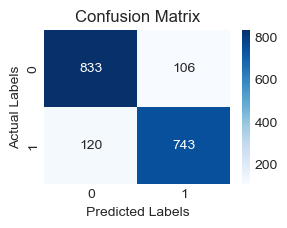

ROC-AUC Score: 0.9385857097550832


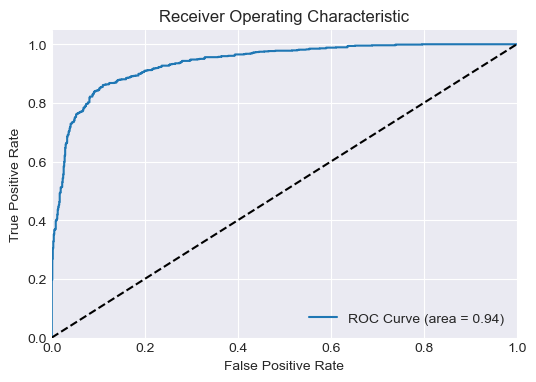

In [131]:

# Basic evaluation metrics
# Print accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 4))

# score the model accuracy scores and store in variables for display later
acc_gbc_train = gbm.score(X_train, y_train)
acc_gbc_test = gbm.score(X_test, y_test)

# scores
print('Train Accuracy:', round(acc_gbc_train * 100, 4))
print('Test Accuracy:', round(acc_gbc_test * 100, 4))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

#Cross Validation
# Perform 5-fold cross-validation
scores = cross_val_score(gbm, X_train, y_train, cv=5, scoring='accuracy').round(4) * 100
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean().round(4))
precision_scores = cross_val_score(gbm, X_train, y_train, cv=5, scoring='precision').round(4) * 100
print("Precision scores:", precision_scores.mean().round(4))
recall_scores = cross_val_score(gbm, X_train, y_train, cv=5, scoring='recall').round(4) * 100
print("Recall scores:", recall_scores.mean().round(4))
f1_scores = cross_val_score(gbm, X_train, y_train, cv=5, scoring='f1').round(4) * 100
print("F1 scores:", f1_scores.mean().round(4))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
print("ROC-AUC Score:", roc_auc_score(y_test, gbm.predict_proba(X_test)[:, 1]))

y_prob = gbm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4)) 
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The 87.458% accuracy is great and the .94 ROC area as well.



#### Model Evaluation Metrics Table
***Model Added: 11. Gradient Boosting Classifier***
| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.8842 | 87.611 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.6178 | 86.5897 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.0693 | 87.8553 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|
| 4 | Baseline with 93% PCA  | 85.8189 | 85.857 | 85 | 87 | 88 | 83 | 87 | 86 | 85.236 | 88.052 | 81.868 | 84.836 |  0.92 |
| 5 | KNN k=5 with 98% PCA k=5 | 79.9601 | 87.944 | 82 | 78 | 78 | 82 | 80 | 80 | 79.372 | 80.856 | 77.462 | 79.106 | 0.89|
| 6 | KNN k=5 with 95% PCA k=5 | 79.9601 | 88.2327 | 81 | 79 | 79 | 81 | 80 | 80 | 79.308 | 80.99 | 77.066 | 78.974 | 0.89|
| 7 | KNN k=5 with 93% PCA k=5 | 79.8269 | 87.9218 | 82 | 78 | 78 | 82 | 80 | 80 | 79.218 | 80.88 | 77.022 | 78.896 | 0.88|
| 8 | KNN k=1 with 98% PCA k=5 | 89.281 | 100.0 | 93 | 86 | 85 | 94 | 89 | 89 | 77.886 | 84.702 | 68.616 | 75.798 | 0.87 |
| 9 | Random Forest estimator=100  | 93.8402 | 100.0 | 95 | 92 | 93 | 95 | 94 | 94 | 92.96 | 92.306 | 94.02 | 93.15 | 0.98 |
| 10 | Decision Tree  | 89.3452 | 100.0 | 94 | 85 | 85 | 94 | 89 | 89 | 86.988 | 84.126 | 91.822 | 87.79 | 0.90|
| 11 | Gradient Boosting Classifier  | 87.4584 | 89.7003 | 87 | 88 | 89 | 86 | 87 | 87 | 87.512 | 89.35 | 85.702 | 87.482 | 0.94


<br>
<br>

Let's do hyperparameter on this. 

In [132]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', verbose=1)
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


The code block above for GBC hyperparameter tunning was taking too long to execute and had to interupt the code mid way.

I used Google Colab to run it and got the results below.

Fitting 5 folds for each of 108 candidates, totalling 540 fits

         Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

         Best cross-validation score: 0.97


Let's move on and do learning and validation curve instead. 

#### Learning Curve for Gradient Boosting Classifier

Reusing the function let's pass in the training data with no scaling or PCA.

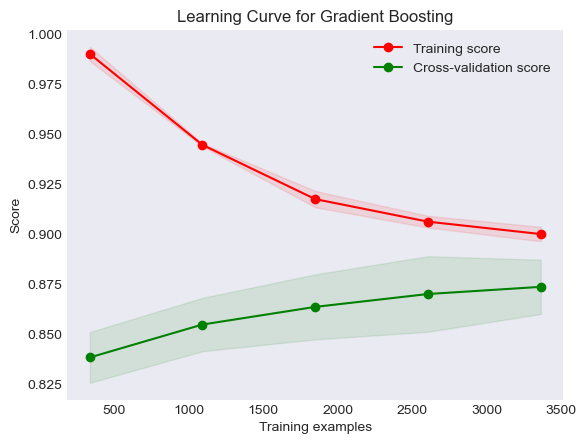

In [133]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
plot_learning_curve(gradient_boosting, "Learning Curve for Gradient Boosting", X_train, y_train, cv=5)
plt.show()

This Gradient Boosting model learning plot is typical and it should get better at generalizing with more data but tends to overfit when trained on smaller datasets. To optimize further, adjust the model's settings to reduce overfitting (such as the hyperparameters).

#### Validation Curve for Gradient Boosting Classifier

Same here with reusing the validation curve plot function and passing in regular training data.

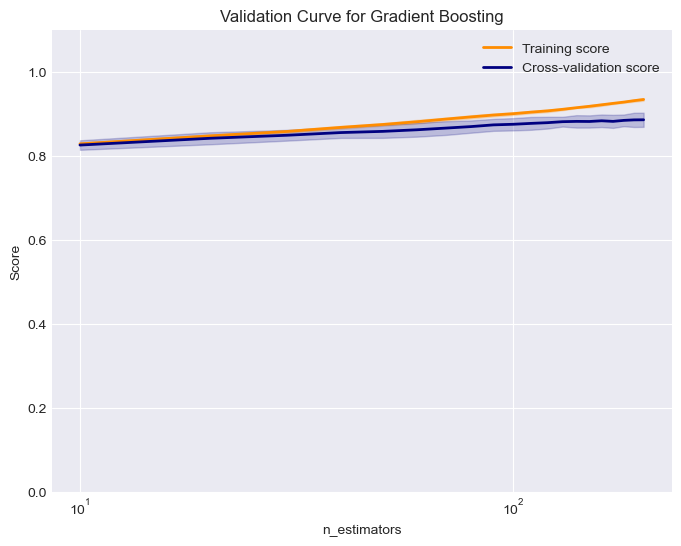

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting model
model_gb = GradientBoostingClassifier(random_state=42)
param_name_gb = 'n_estimators'
param_range_gb = np.arange(10, 201, 10)  # Checking values from 10 to 200

# Plotting the validation curve
plot_validation_curve(model_gb, "Validation Curve for Gradient Boosting", X_train, y_train,
                      param_name=param_name_gb, param_range=param_range_gb, cv=5)


This validation curve on gradient boosting shows that both training and cross-validation scores are stable and very close across the range of estimator values.  No further tuning is needed.


##### End of Gradient Boosting Classifier

<br>

[back to Table of Contents](#Table-of-Contents)

[back to previous section: 21. Gradient Boosting Classifier](#21.-Gradient-Boosting-Classifier)

## 22. Summary


#### Model Evaluation Metrics Table In Accuracy Descending Order

| Number | Model | Accuracy | Training | Precision-0 | Precision-1 | Recall-0 | Recall-1 | F1-0 | F1-1 | Mean | Precision | Recall | F1 | ROC |
|--------|-------|----------|----------|-------------|-------------|-----------|-----------|-------|-------|-------|-----------|--------|------|-----|
| 9 | Random Forest estimator=100  | 93.84 | 100.0 | 95 | 92 | 93 | 95 | 94 | 94 | 92.96 | 92.306 | 94.02 | 93.15 | 0.98 |
| 10 | Decision Tree  | 89.34 | 100.0 | 94 | 85 | 85 | 94 | 89 | 89 | 86.988 | 84.126 | 91.822 | 87.79 | 0.90|
| 8 | KNN k=1 with 98% PCA k=5 | 89.28 | 100.0 | 93 | 86 | 85 | 94 | 89 | 89 | 77.886 | 84.702 | 68.616 | 75.798 | 0.87 |
| 11 | Gradient Boosting Classifier  | 87.45 | 89.70 | 87 | 88 | 89 | 86 | 87 | 87 | 87.512 | 89.35 | 85.702 | 87.482 | 0.94|
| 1 | Baseline - Logistic Regression Model with Robust scaled 25% test data set | 86.88 | 87.61 | 86 | 88 | 89 | 85 | 87 | 86 | 86.39 | 88.142 | 84.376 | 86.218 | 0.93|
| 2 | Baseline with 98% PCA   | 86.61 | 86.58 | 85 | 88 | 89 | 84 | 87 | 87 | 86.124 | 88.006 | 83.936 | 85.916 | 0.92|
| 3 | Baseline with 95% PCA | 86.06 | 87.85 | 87 | 84 | 93 | 72 | 90 | 77 | 87.37 | 87.692 | 70.002 | 77.83 | 0.92|
| 4 | Baseline with 93% PCA  | 85.81 | 85.85 | 85 | 87 | 88 | 83 | 87 | 86 | 85.236 | 88.052 | 81.868 | 84.836 |  0.92 |
| 5 | KNN k=5 with 98% PCA k=5 | 79.96 | 87.94 | 82 | 78 | 78 | 82 | 80 | 80 | 79.372 | 80.856 | 77.462 | 79.106 | 0.89|
| 6 | KNN k=5 with 95% PCA k=5 | 79.96 | 88.23 | 81 | 79 | 79 | 81 | 80 | 80 | 79.308 | 80.99 | 77.066 | 78.974 | 0.89|
| 7 | KNN k=5 with 93% PCA k=5 | 79.82 | 87.92 | 82 | 78 | 78 | 82 | 80 | 80 | 79.218 | 80.88 | 77.022 | 78.896 | 0.88|






















From this process we were able to determine a model that gives the best possible accuracy. 

We processed the data by upsampling the minority class due to the imbalance of the target variable and binning some of the high cardinality categorical features either domain knowledge grouping or frequency grouping. 

We ran the data through a number of models and tweaked each of those models to see how the accuracy varies.  We learned that the sizing of the splitting of the test vs training data makes a difference in the outcome.  PCA reduction also makes a different sometimes not for the better.  We also learned that the amount that the PCA reduces in features also depends on the type of scaling done on the data.   From trying out 3 different scalers, Robust was the best performer for this data compared to Standard and MinMax. 

When we started with the base logistic regression model, we find it to performed well and that adjusting the diffferent PCA components varied in both direction, decreasing more sometimes performs better but there is a diminishing return where it continues to decline in performance.

Moving onto KNN models thoough didn't improve in results until we tried to find the ideal k neighbors value.  Once we found that we received a new high scorer with KNN k=1 at 89.28% accuracy. 

When Random Forest was attempted we found that to be a big jump in performance. Hyperparameter tunning didn't give any better results though.  

Decision Tree came in second in scoring and Gradient Boosting scored below KNN's k=1 best score.

Random Forest's 93.84% accuracy is excellent when it comes to determining the likelyhood of student withdrawal.  As a future project perhaps further tune this particular model.  

As a potential end-user product perhaps this model can be the engine behind a reporting dashboard that universities use to be provided a list of potential at risk students. 
